# Visualizing the z-scored MMIPPs as t-SNE plots

## z-score the results

In [19]:
from pandas import DataFrame, read_csv, to_numeric
from scipy.stats import zscore, shapiro
from json import dump
from os import path
from re import sub

def z_scored(df_path):
    # Compute the z-score for each row and return a z-score DataFrame
    print(df_path)
    baseName = path.basename(df_path).replace(".csv", "")
    df = read_csv(df_path).fillna(0)
    if "Sample" in df_path:
        indexName = "Interval" if "prob" not in df_path else "Sample"
        df = df.set_index(indexName).drop("Name", axis="rows").apply(to_numeric, errors='coerce')
        indexName = df.index.name
        df.index = [i.replace("-ABX", "") for i in df.index]
        indexName = df.index.name = indexName
    elif "ASV" in df_path:
        df.set_index("ASV", inplace=True)
        if "prob" in df_path:
            df = df.drop("Name", axis="rows").apply(to_numeric, errors='coerce')

    # run normality score first to assess the validity of a z-score
    normalTests = [shapiro(row.values) for index, row in df.iterrows()]
    normalcy_test_dic = dict(zip(df.index, normalTests)) 
    # display(normalcy_test_dic)
    with open(f"{baseName}_normalcies.json", 'w') as jsonOut:
        dump(normalcy_test_dic, jsonOut, indent=3)
    z_scores = df.apply(zscore, axis="rows")
    return DataFrame(z_scores, columns=df.columns, index=df.index)


# generate the sample z-Score matrices
from glob import glob
for sample_table in glob("nboutput/Sample*probInteractions.csv"):
    zScore_sample = z_scored(sample_table)
    zScore_sample.to_csv(sample_table.replace("probInteractions", "probInteractions_zScore"))

# zScore_samples = z_scored("SampleIntervalMetaboliteInteractions.csv")
# zScore_ASVs = z_scored("ASVMetaboliteInteractions.csv")

nboutput/Sampleuptake_probInteractions.csv
nboutput/Sampleexcretion_probInteractions.csv
nboutput/Samplegrowth_probInteractions.csv


## defining the color code bins based on methane flux

In [4]:
from pandas import read_excel

data = read_excel("data/Cliff_Sample_Metadata_BGC_NMR.xlsx")
display(data)
data.to_csv("data/Cliff_Sample_Metadata_BGC_NMR.csv")

New_index         Sample_name    Sample  Site Core Depth Restoration  \
0           1   Historic_R2A_A_D1  R2A_A_D1  R2A     A    D1   Reference   
1           2   Historic_R2A_A_D2  R2A_A_D2  R2A     A    D2   Reference   
2           3   Historic_R2A_B_D1  R2A_B_D1  R2A     B    D1   Reference   
3           4   Historic_R2A_B_D2  R2A_B_D2  R2A     B    D2   Reference   
4           5   Historic_R2A_C_D1  R2A_C_D1  R2A     C    D1   Reference   
5           6   Historic_R2A_C_D2  R2A_C_D2  R2A     C    D2   Reference   
6           7   restored_SF2_A_D1  SF2_A_D1   SF2    A    D1    Restored   
7           8   restored_SF2_A_D2  SF2_A_D2   SF2    A    D2    Restored   
8           9   restored_SF2_B_D1  SF2_B_D1   SF2    B    D1    Restored   
9          10   restored_SF2_B_D2  SF2_B_D2   SF2    B    D2    Restored   
10         11   restored_SF2_C_D1  SF2_C_D1   SF2    C    D1    Restored   
11         12   restored_SF2_C_D2  SF2_C_D2   SF2    C    D2    Restored   
12         13  unrestored_R1_A_D1   R1_A_D1    R1    A    D1  Unrestored   
13         14  unrestored_R1_A_D2   R1_A_D2    R1    A    D2  Unrestored   
14         15  unrestored_R1_B_D1   R1_B_D1    R1    B    D1  Unrestored   
15         16  unrestored_R1_B_D2   R1_B_D2    R1    B    D2  Unrestored   
16         17  unrestored_R1_C_D1   R1_C_D1    R1    C    D1  Unrestored   
17         18  unrestored_R1_C_D2   R1_C_D2    R1    C    D2  Unrestored   
18         19  unrestored_R2_A_D1   R2_A_D1    R2    A    D1  Unrestored   
19         20  unrestored_R2_A_D2   R2_A_D2    R2    A    D2  Unrestored   
20         21  unrestored_R2_B_D1   R2_B_D1    R2    B    D1  Unrestored   
21         22  unrestored_R2_B_D2   R2_B_D2    R2    B    D2  Unrestored   
22         23  unrestored_R2_C_D1   R2_C_D1    R2    C    D1  Unrestored   
23         24  unrestored_R2_C_D2   R2_C_D2    R2    C    D2  Unrestored   

          Hydrol       Date        Lat  ...  Succinate  Sucrose  Thymidine  \
0    Tidal marsh 2014-07-11  37.496219  ...       11.4     11.0        0.0   
1    Tidal marsh 2014-07-11  37.496219  ...        2.0      8.8        0.0   
2    Tidal marsh 2014-07-11  37.496044  ...        8.6    287.8        5.3   
3    Tidal marsh 2014-07-11  37.496044  ...        1.0    454.6        0.0   
4    Tidal marsh 2014-07-11  37.496546  ...       11.0   3219.9        0.0   
5    Tidal marsh 2014-07-11  37.496546  ...        2.0     27.7        0.0   
6   Managed pond 2014-07-17  37.497143  ...       46.1     77.4       36.6   
7   Managed pond 2014-07-17  37.497143  ...        NaN      NaN        NaN   
8   Managed pond 2014-07-17  37.497202  ...        NaN      NaN        NaN   
9   Managed pond 2014-07-17  37.497202  ...        NaN      NaN        NaN   
10  Managed pond 2014-07-17  37.497356  ...        NaN      NaN        NaN   
11  Managed pond 2014-07-17  37.497356  ...        NaN      NaN        NaN   
12          Pond 2014-07-11  37.496912  ...        3.7      0.0        0.0   
13          Pond 2014-07-11  37.496912  ...        4.1      3.2        0.0   
14         Pond  2014-07-11  37.496812  ...        8.5      0.0        0.0   
15         Pond  2014-07-11  37.496812  ...        3.5      0.0        0.0   
16          Pond 2014-07-11  37.497168  ...        4.0      0.0        0.0   
17          Pond 2014-07-11  37.497168  ...        3.9     17.8        0.0   
18          Pond 2014-07-11  37.495828  ...        3.2     19.3        0.0   
19          Pond 2014-07-11  37.495828  ...        1.7      4.0        0.0   
20          Pond 2014-07-11  37.496143  ...        0.0      7.6        0.0   
21          Pond 2014-07-11  37.496143  ...        4.2      0.0        0.0   
22          Pond 2014-07-11  37.496500  ...        3.5      0.0        0.0   
23          Pond 2014-07-11  37.496500  ...        4.0      0.0        0.0   

    Trehalose  Trimethylamine  Tryptophan  Tyrosine  Uracil  Uridine  Valine  
0        20.6             0.8         0.0       2.2    10.7      4.0    7

In [21]:
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
from pandas import read_csv
from numpy import array

data = read_csv("data/Cliff_Sample_Metadata_BGC_NMR.csv")
methane = array(data["CH4_umol_m2_d"].to_list()).reshape(-1, 1)
binning = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
methaneBins = binning.fit_transform(methane).reshape(-1)
orderedBins = dict(sorted(Counter(dict(zip(methane.reshape(-1), methaneBins))).items(), key=lambda item: item[1], reverse=True))
display(orderedBins)

reversedOrderedBins = {}
for flux, code in orderedBins.items():
    if code in reversedOrderedBins:
        reversedOrderedBins[code].append(flux)
    else:  reversedOrderedBins[code] = [flux]
    
print()
display(reversedOrderedBins)

# color exchanges
colorMap = {
    3.0: "purple",
    2.0: "blue",
    1.0: "green",
    0.0: "red"
}
legendMap = {f"{min(fluxes)} to {max(fluxes)}": colorMap[code] for code, fluxes in reversedOrderedBins.items()}
print()
display(legendMap)

ch4_to_sample = {} #dict(zip(data["CH4_umol_m2_d"].to_list(), data["Sample"].to_list()))
colorsList = {k: colorMap[v] for k,v in orderedBins.items()} # {ch4_to_sample[k]: colorMap[v] for k,v in orderedBins.items()}
for index, row in data.iterrows():
    ch4_to_sample[row["Sample"]] = colorsList[row["CH4_umol_m2_d"]]
    
print()    
display(ch4_to_sample)
print()
display(colorsList)

{1607.09: 3.0,
 1588.57: 3.0,
 1347.13: 2.0,
 1327.18: 2.0,
 737.32: 1.0,
 490.47: 1.0,
 -24.3: 0.0,
 -1.76: 0.0,
 -7.1: 0.0,
 4.43: 0.0,
 41.45: 0.0,
 10.5: 0.0}

{3.0: [1607.09, 1588.57],
 2.0: [1347.13, 1327.18],
 1.0: [737.32, 490.47],
 0.0: [-24.3, -1.76, -7.1, 4.43, 41.45, 10.5]}

{'1588.57 to 1607.09': 'purple',
 '1327.18 to 1347.13': 'blue',
 '490.47 to 737.32': 'green',
 '-24.3 to 41.45': 'red'}

{'R2A_A_D1': 'red',
 'R2A_A_D2': 'red',
 'R2A_B_D1': 'red',
 'R2A_B_D2': 'red',
 'R2A_C_D1': 'red',
 'R2A_C_D2': 'red',
 'SF2_A_D1': 'red',
 'SF2_A_D2': 'red',
 'SF2_B_D1': 'red',
 'SF2_B_D2': 'red',
 'SF2_C_D1': 'red',
 'SF2_C_D2': 'red',
 'R1_A_D1': 'green',
 'R1_A_D2': 'green',
 'R1_B_D1': 'blue',
 'R1_B_D2': 'blue',
 'R1_C_D1': 'green',
 'R1_C_D2': 'green',
 'R2_A_D1': 'blue',
 'R2_A_D2': 'blue',
 'R2_B_D1': 'purple',
 'R2_B_D2': 'purple',
 'R2_C_D1': 'purple',
 'R2_C_D2': 'purple'}

{1607.09: 'purple',
 1588.57: 'purple',
 1347.13: 'blue',
 1327.18: 'blue',
 737.32: 'green',
 490.47: 'green',
 -24.3: 'red',
 -1.76: 'red',
 -7.1: 'red',
 4.43: 'red',
 41.45: 'red',
 10.5: 'red'}

## producing the t-SNE plots

The Sampleuptake_zScore figure at 18 perplexity is being generated
nboutput/Sampleuptake_probInteractions_zScore_tSNE_18
The Sampleuptake_zScore figure at 13 perplexity is being generated
nboutput/Sampleuptake_probInteractions_zScore_tSNE_13
The Sampleuptake_zScore figure at 8 perplexity is being generated
nboutput/Sampleuptake_probInteractions_zScore_tSNE_8
The Sampleuptake_zScore figure at 3 perplexity is being generated
nboutput/Sampleuptake_probInteractions_zScore_tSNE_3
The Sampleexcretion_zScore figure at 18 perplexity is being generated
nboutput/Sampleexcretion_probInteractions_zScore_tSNE_18
The Sampleexcretion_zScore figure at 13 perplexity is being generated
nboutput/Sampleexcretion_probInteractions_zScore_tSNE_13
The Sampleexcretion_zScore figure at 8 perplexity is being generated
nboutput/Sampleexcretion_probInteractions_zScore_tSNE_8
The Sampleexcretion_zScore figure at 3 perplexity is being generated
nboutput/Sampleexcretion_probInteractions_zScore_tSNE_3
The Samplegrowth

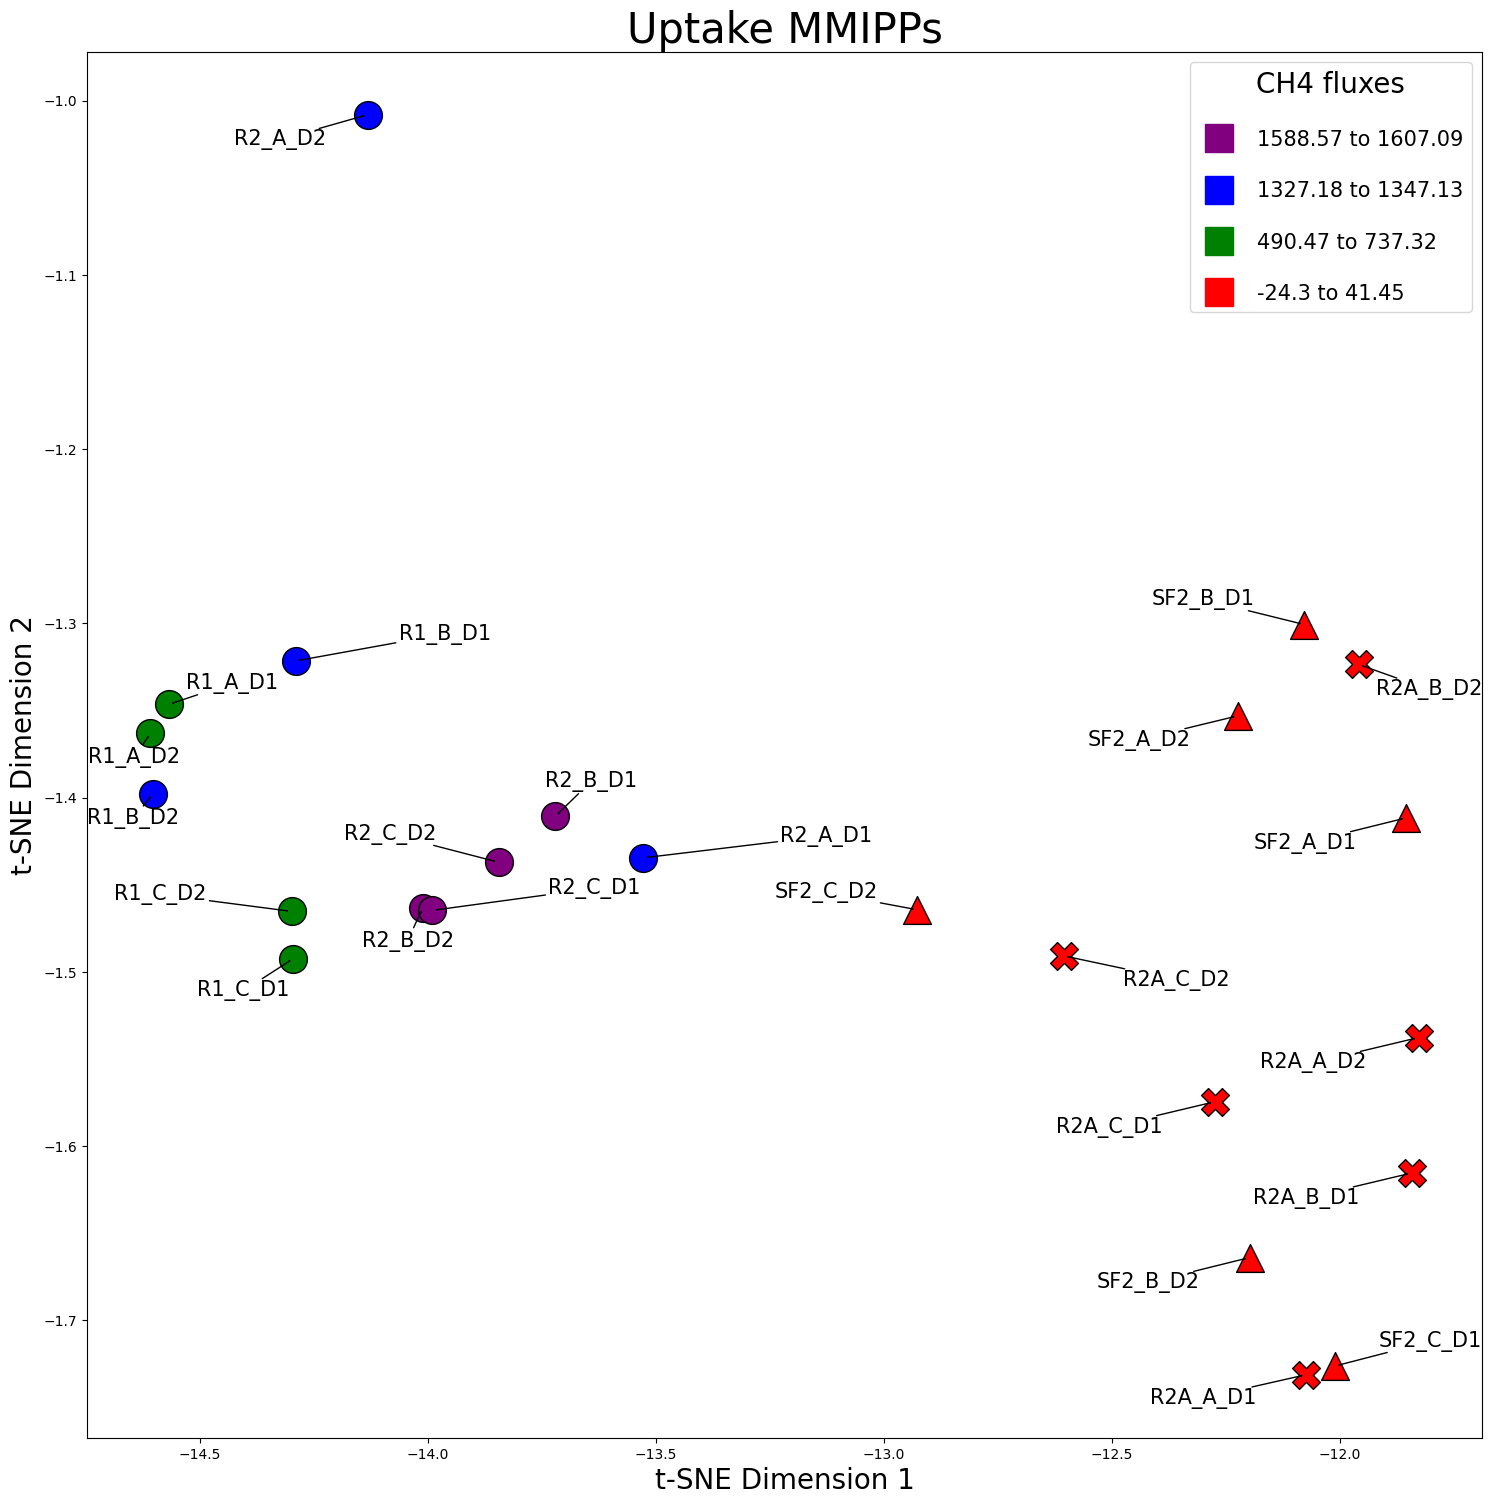

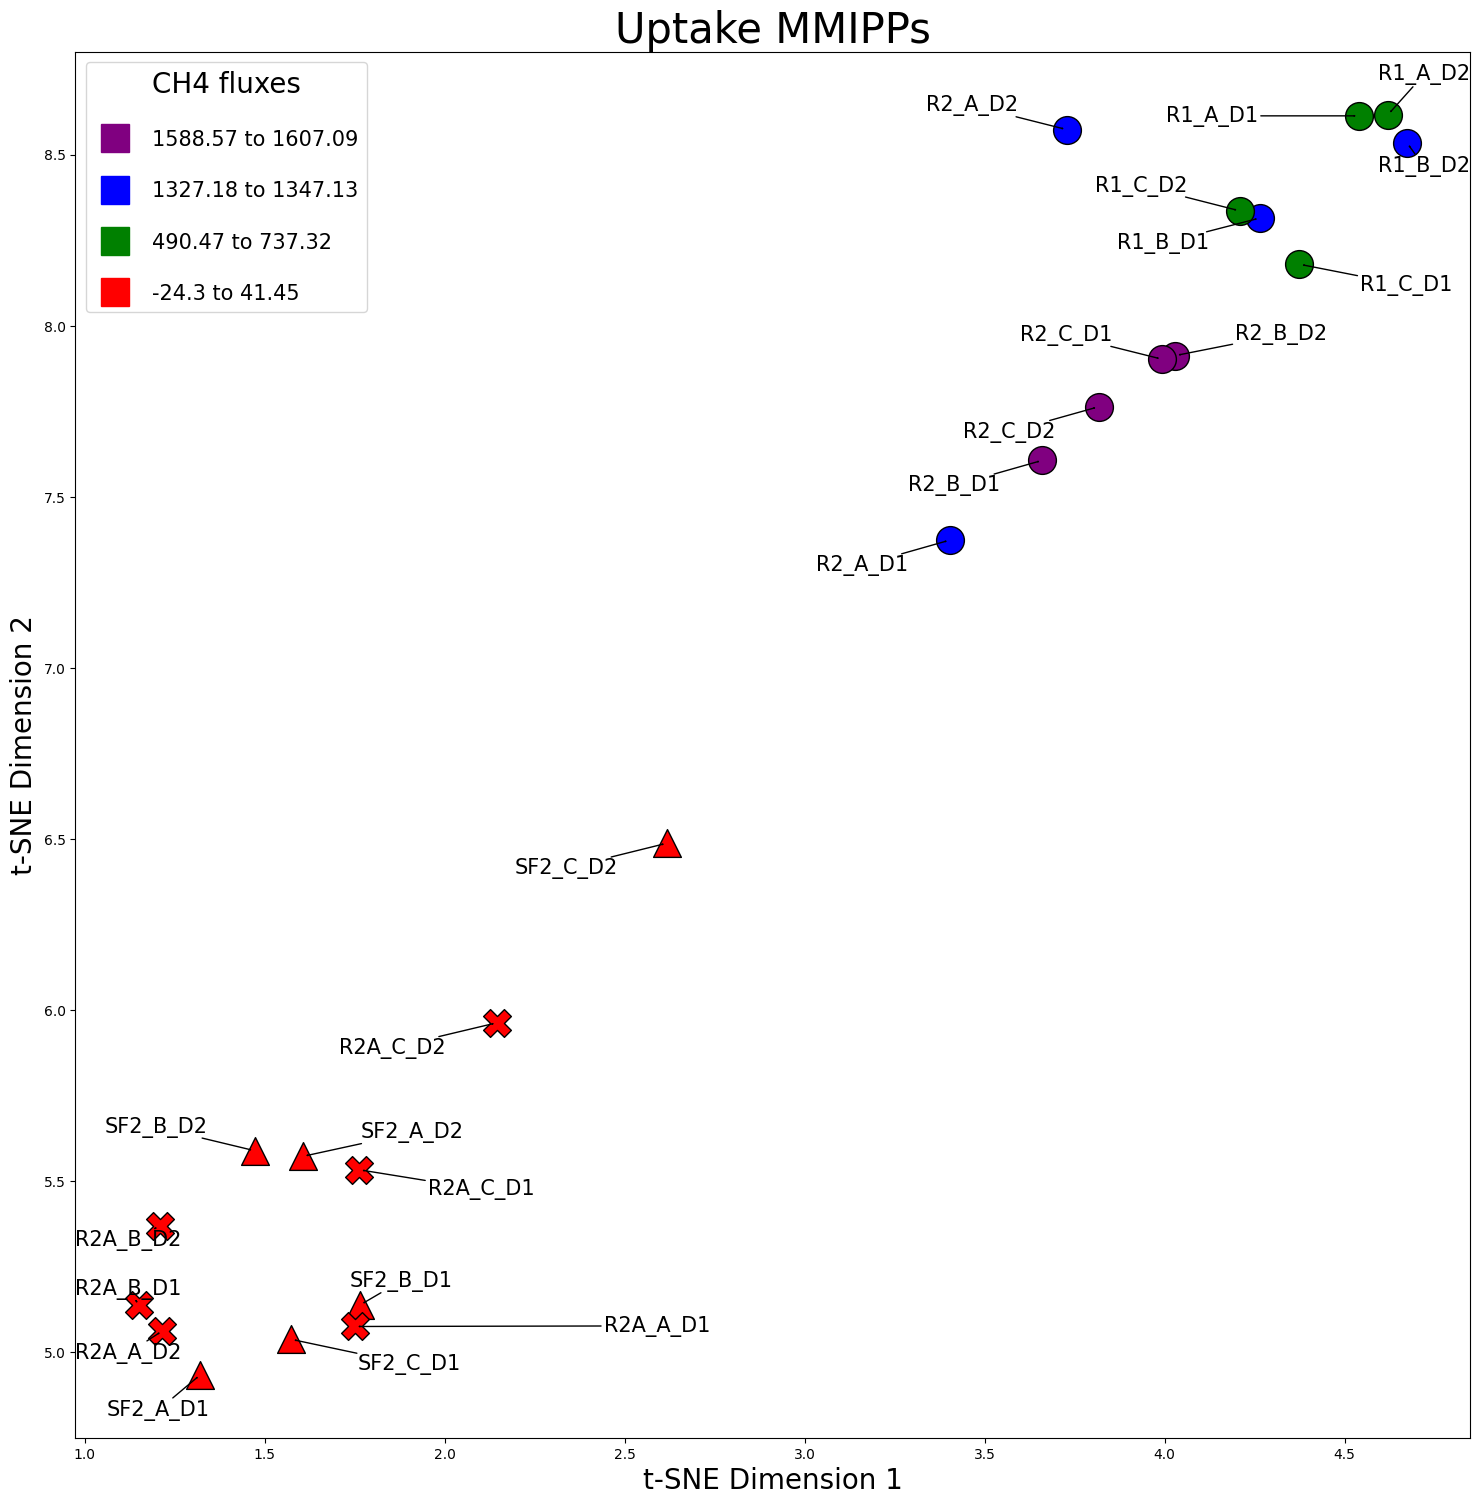

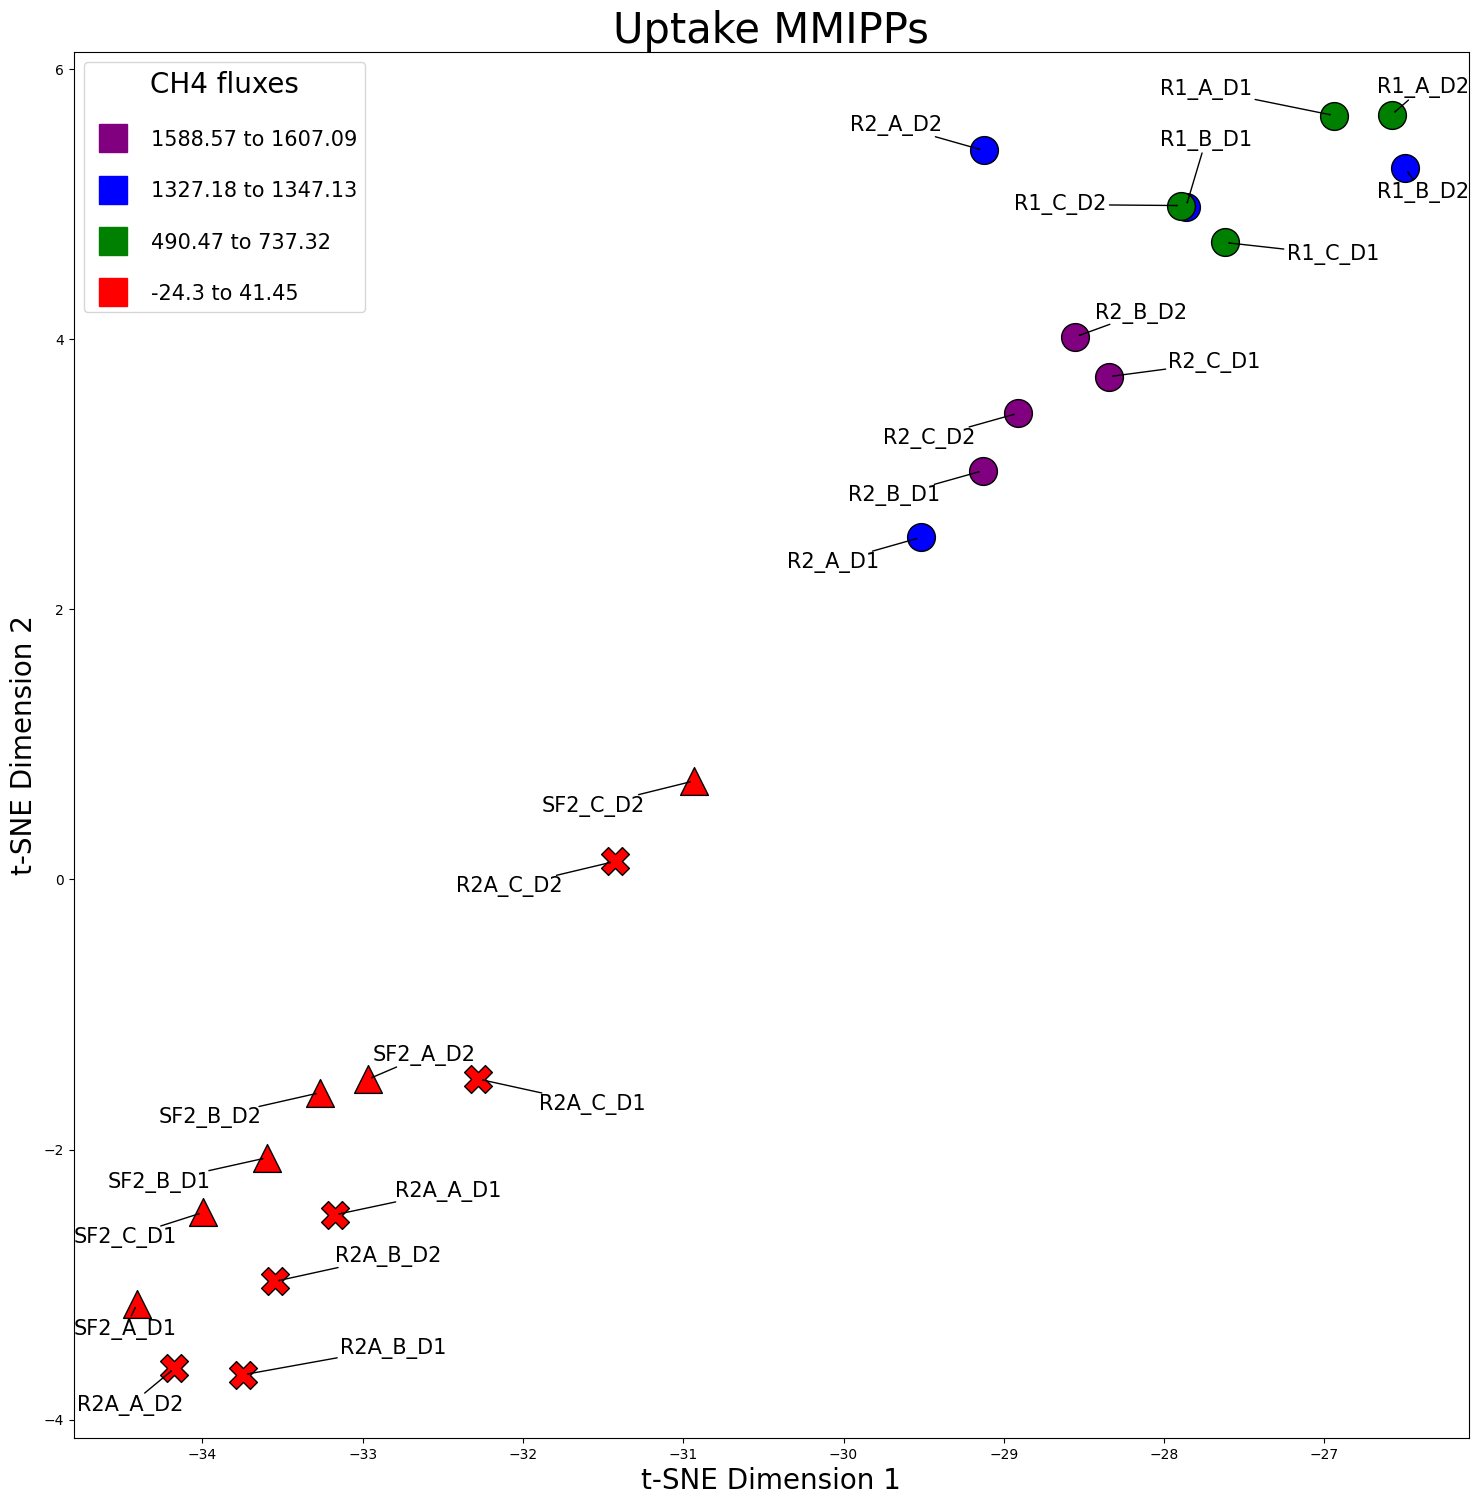

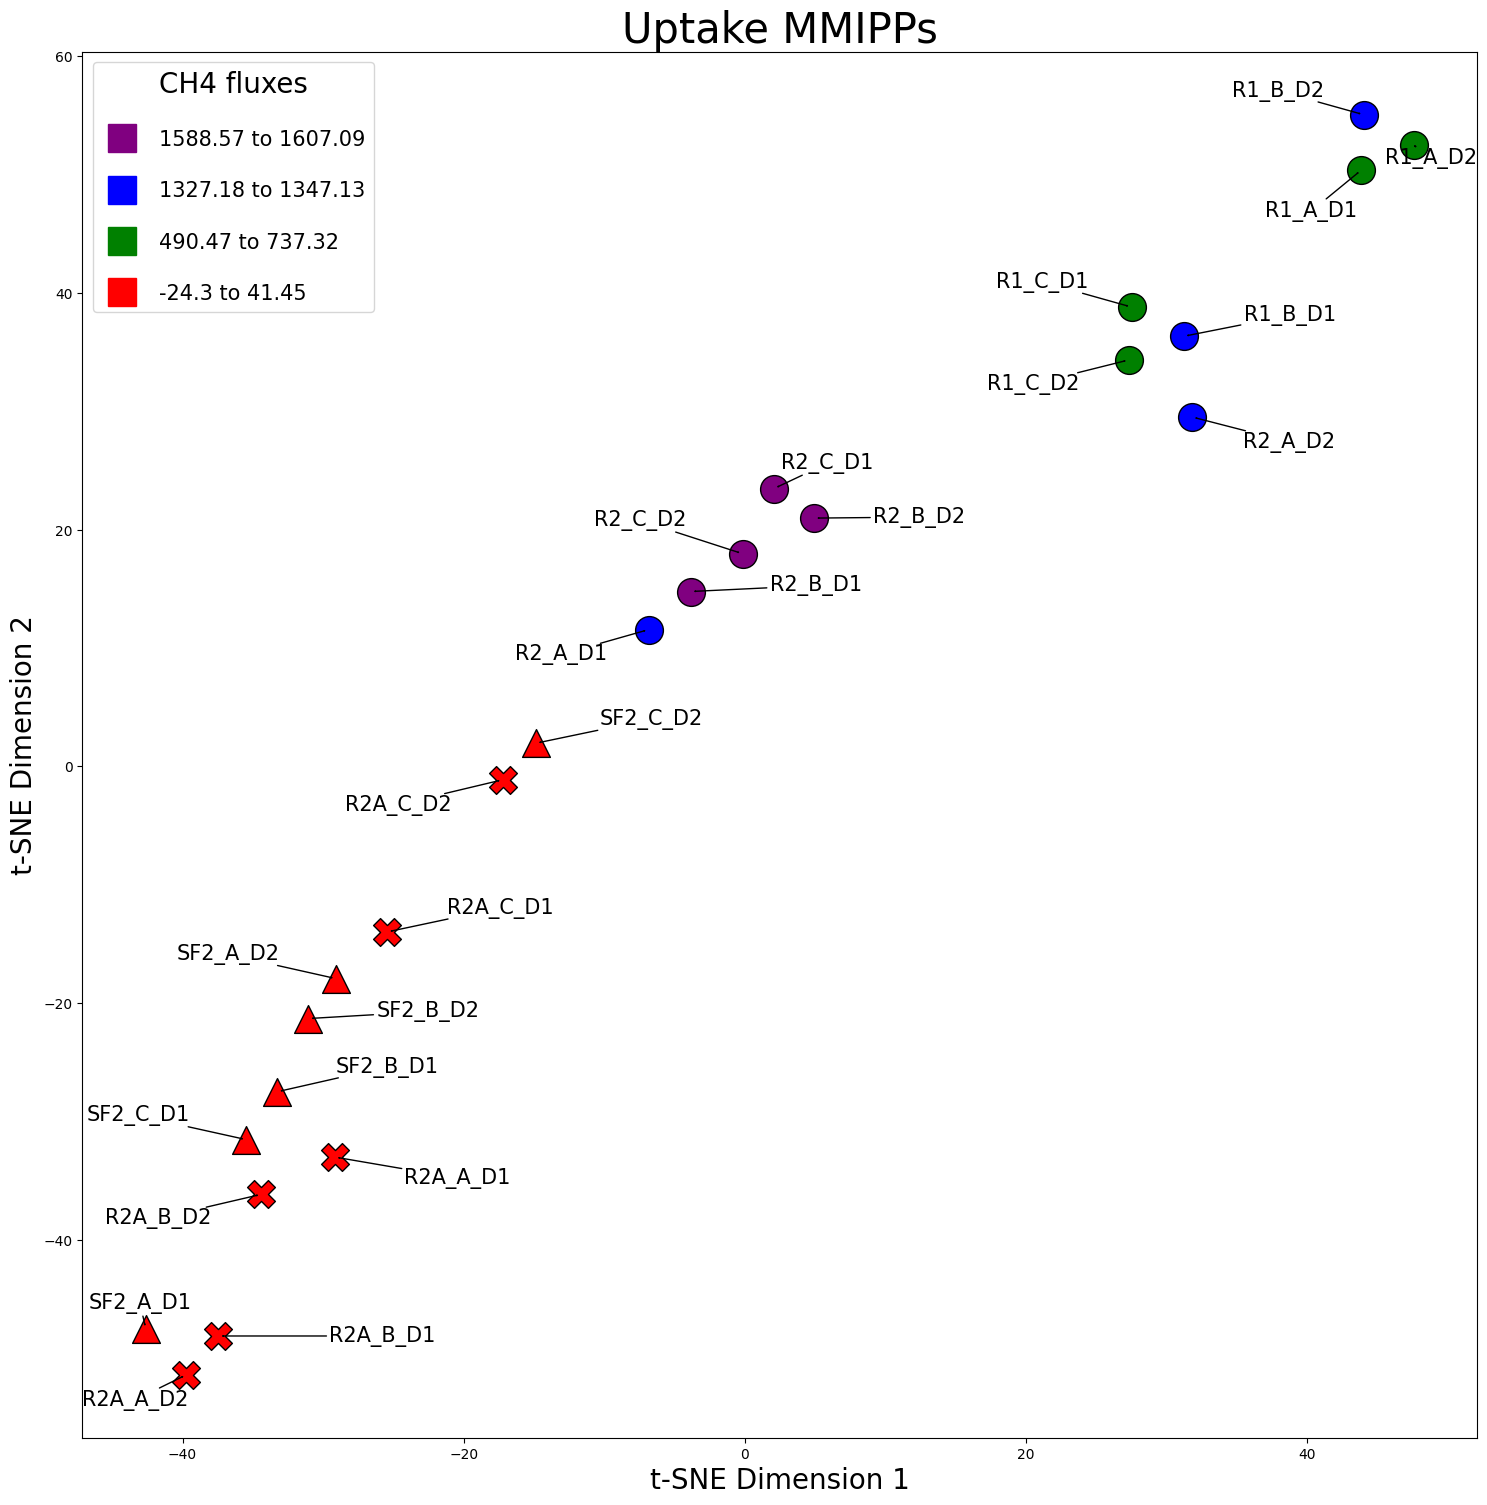

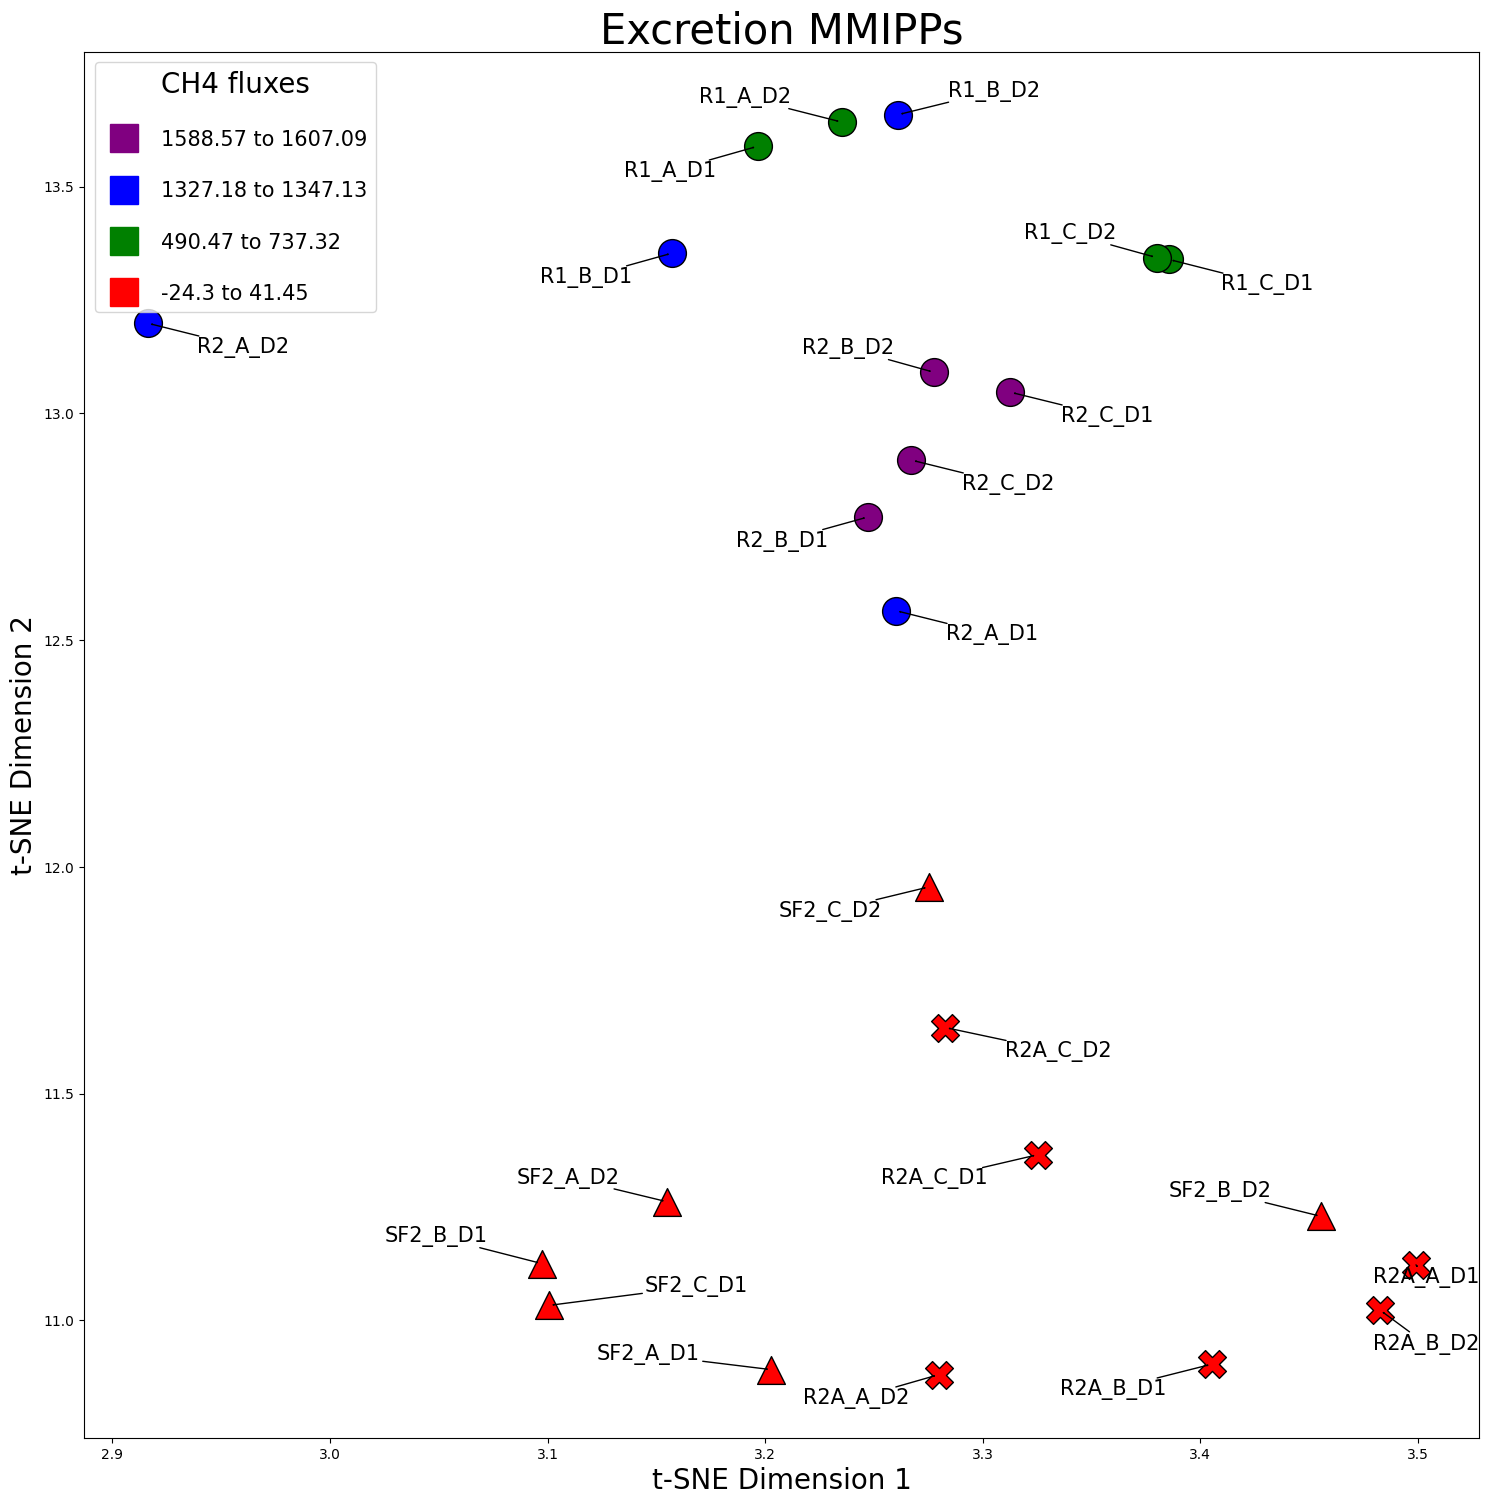

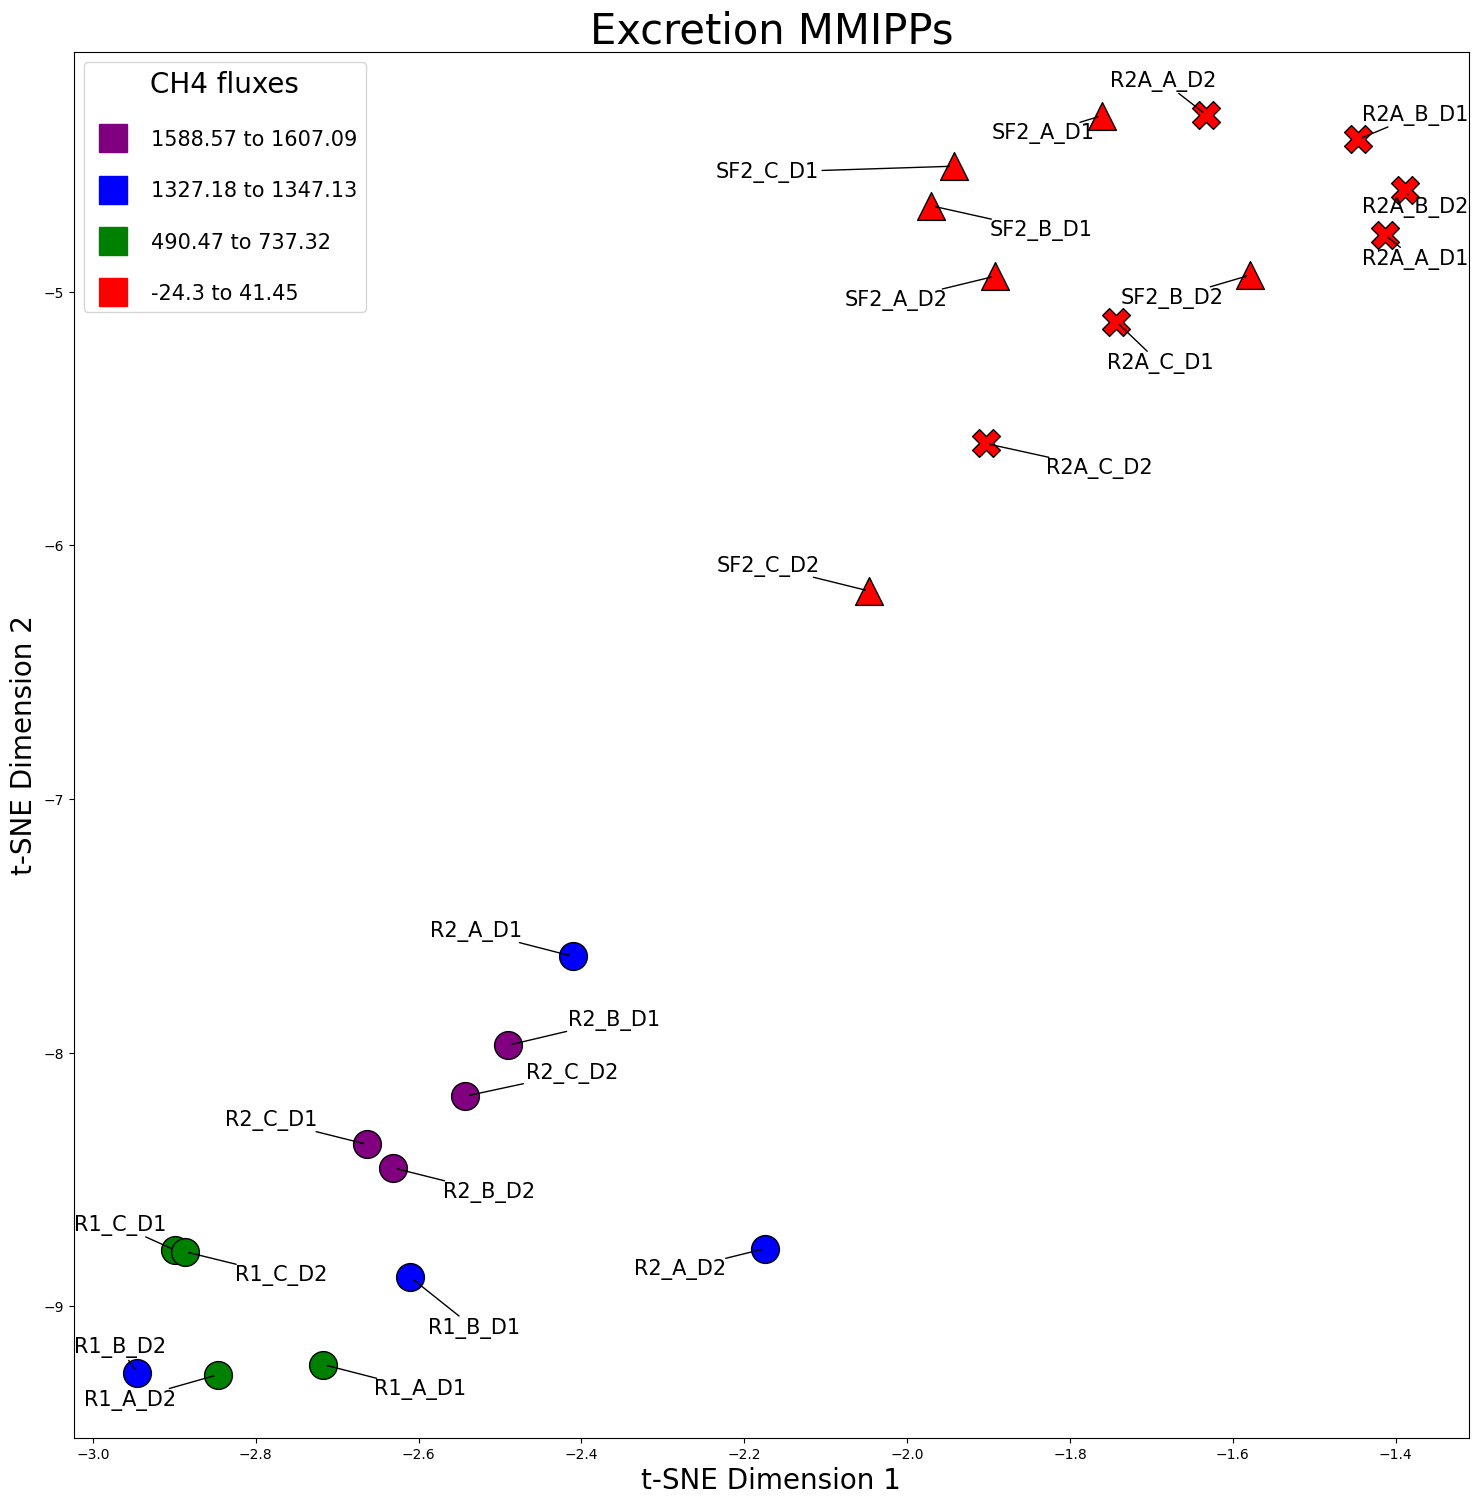

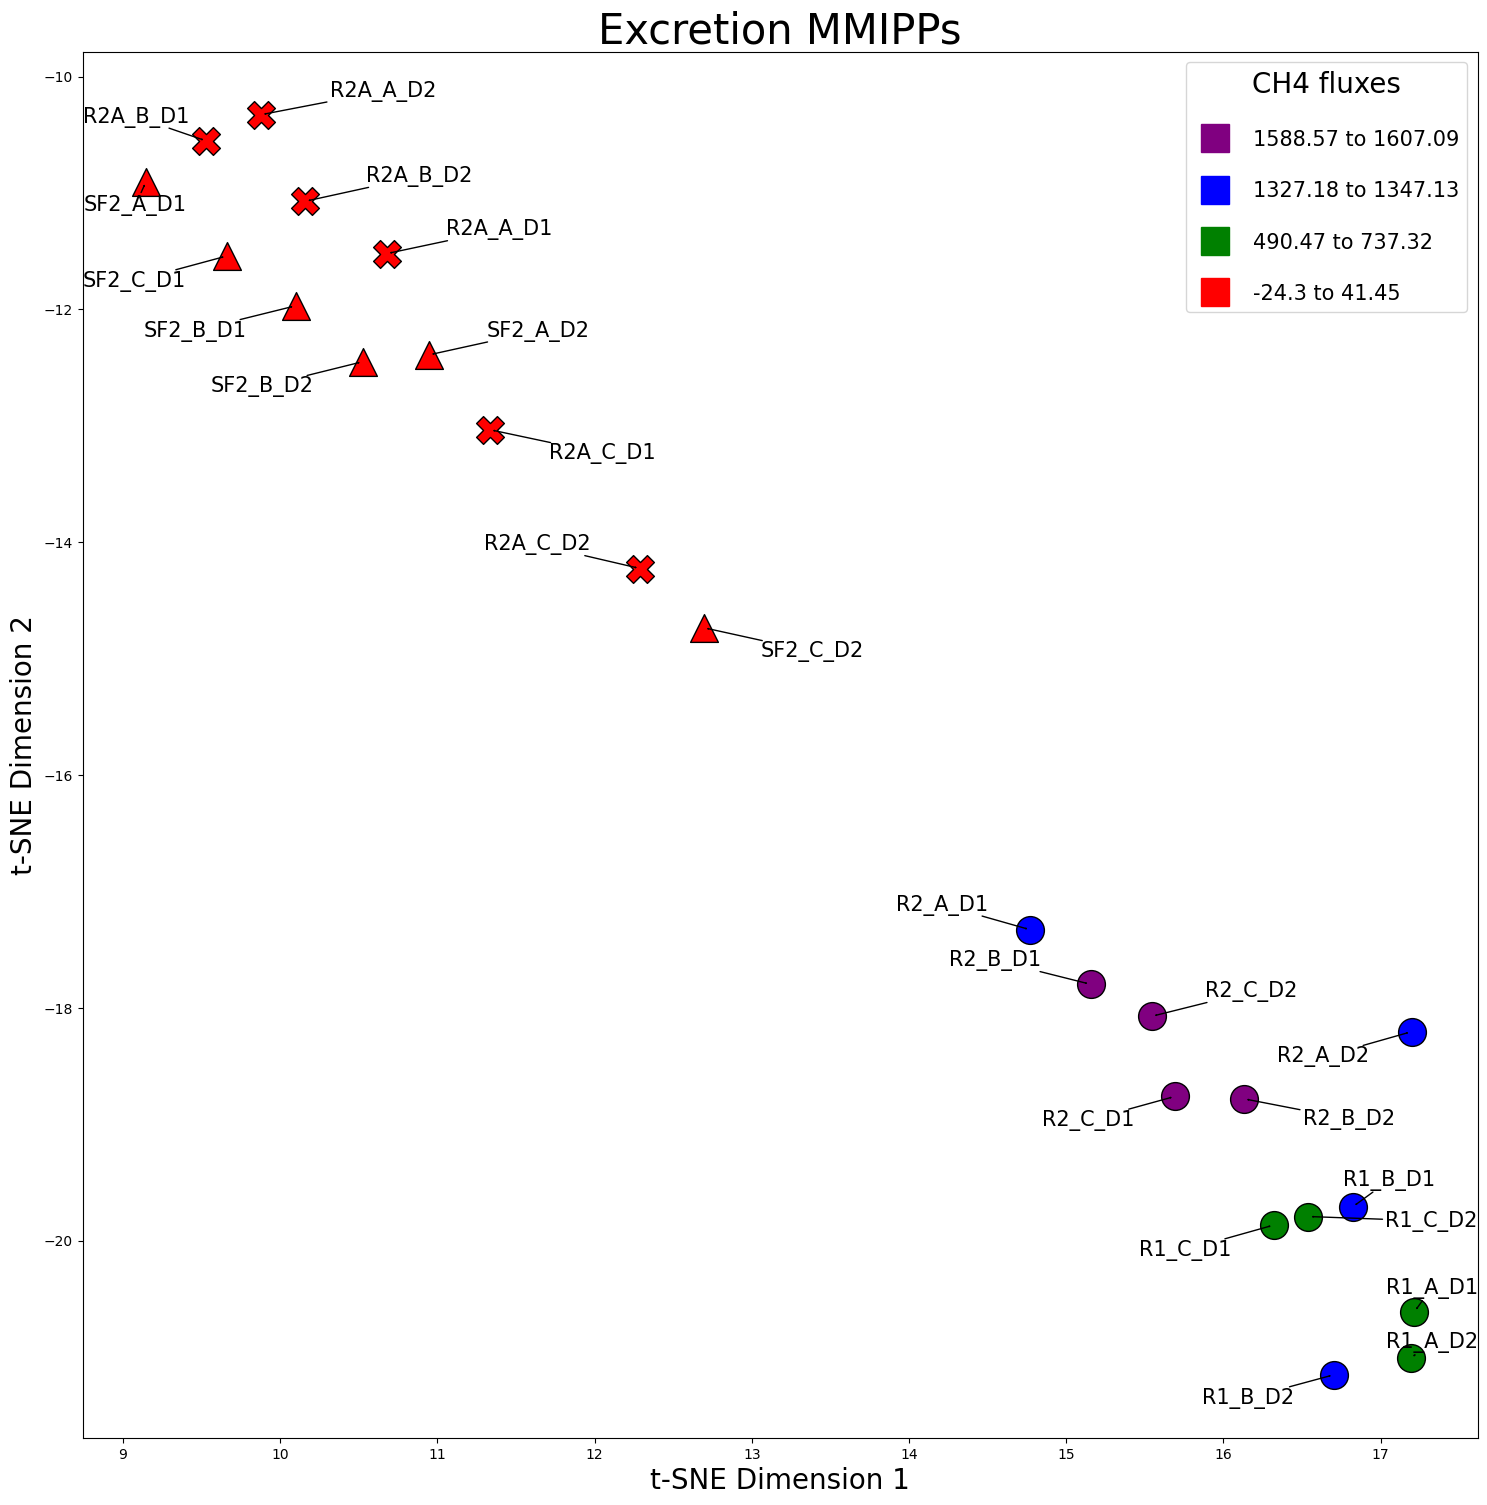

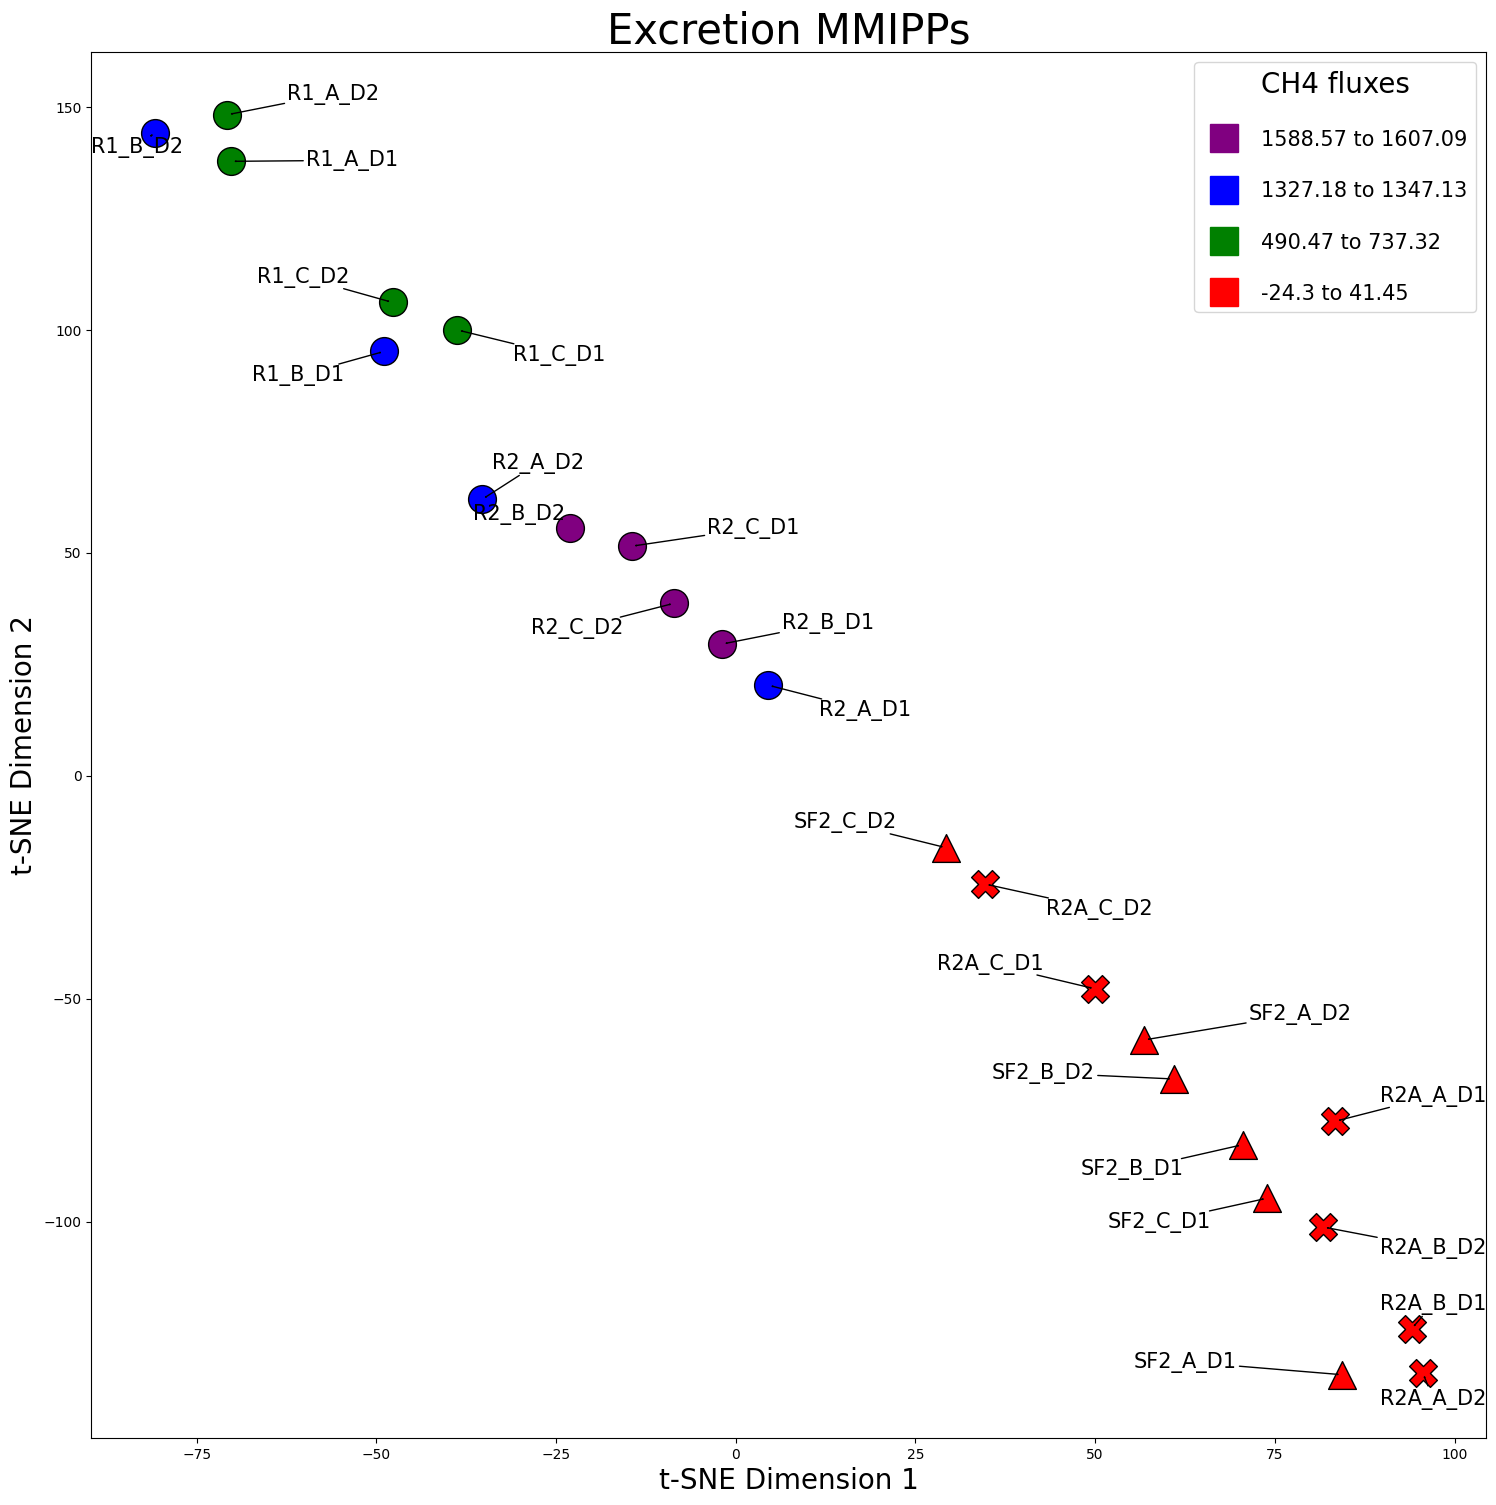

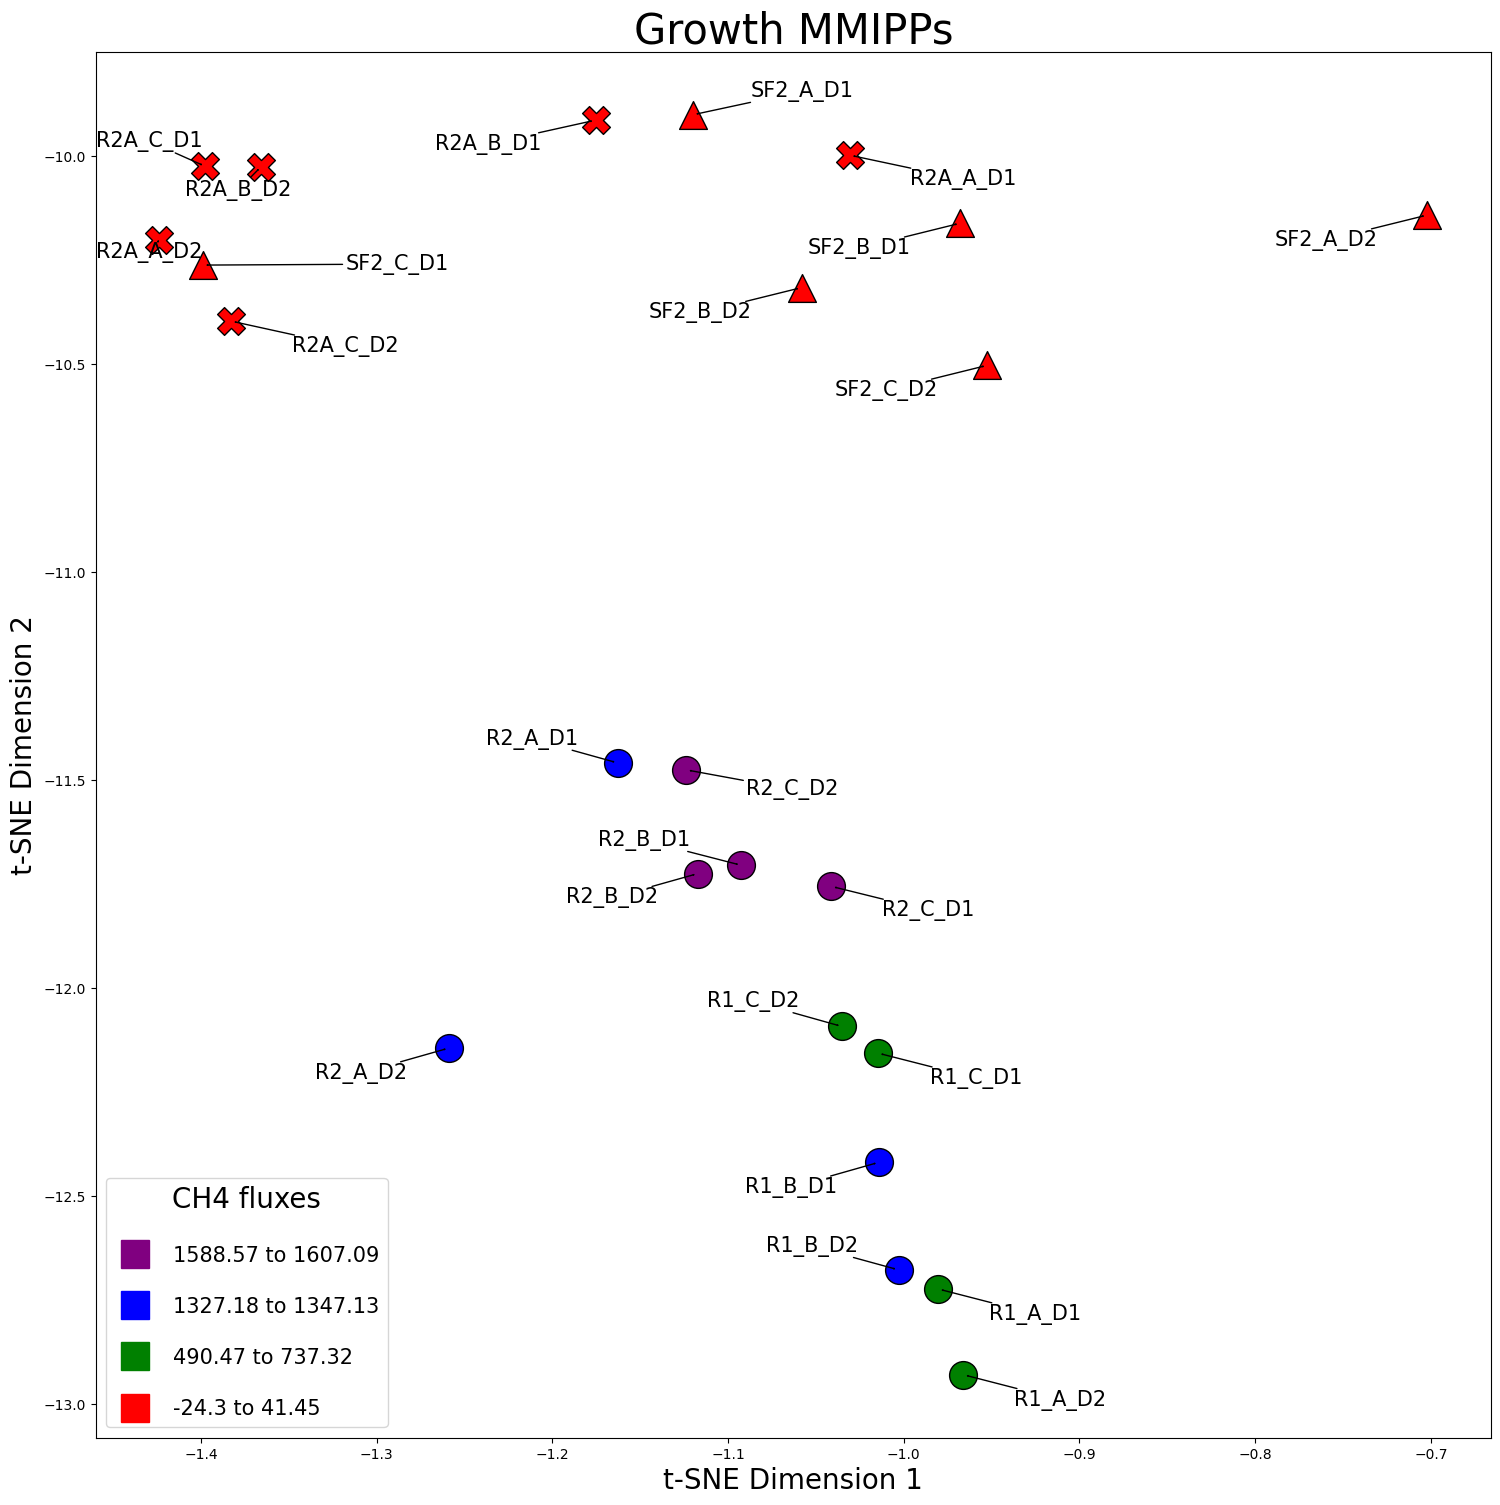

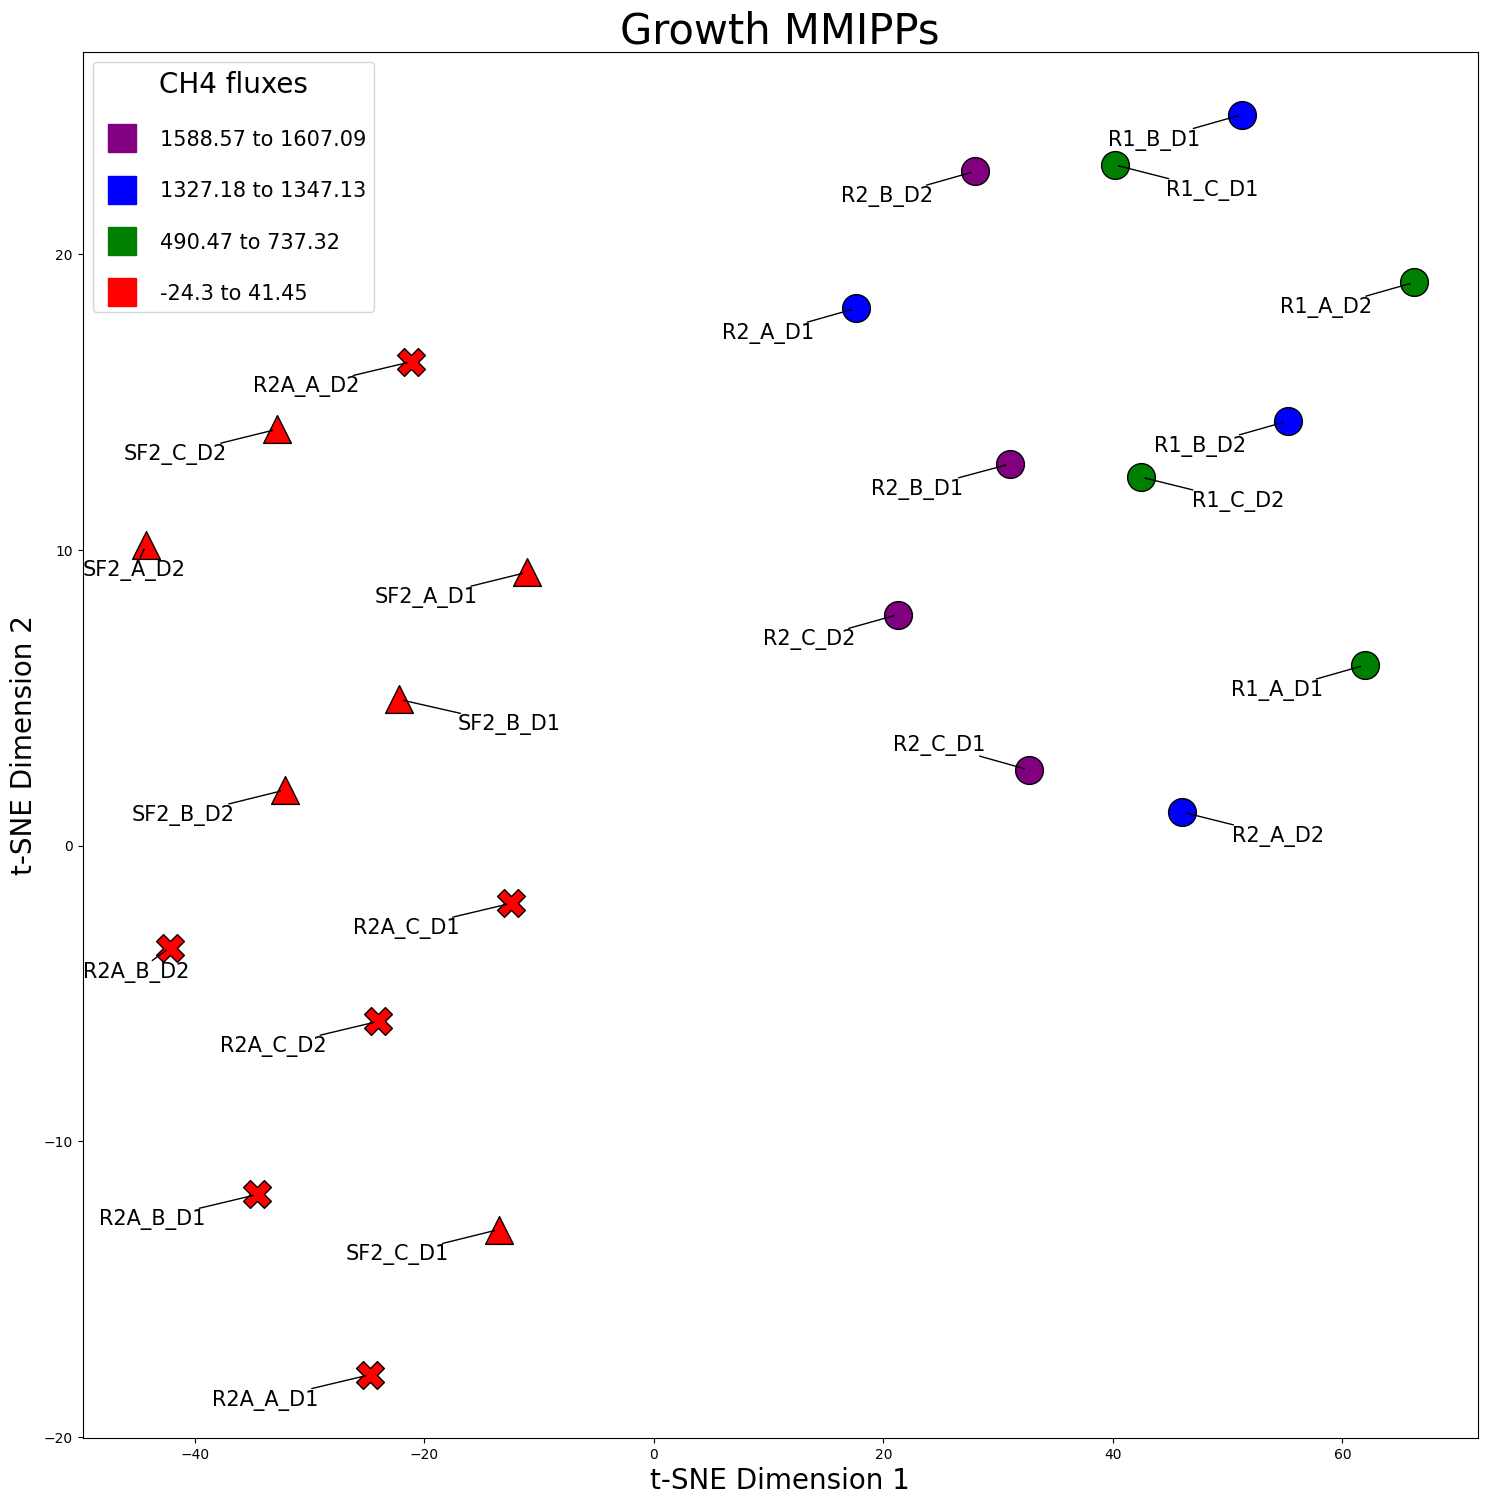

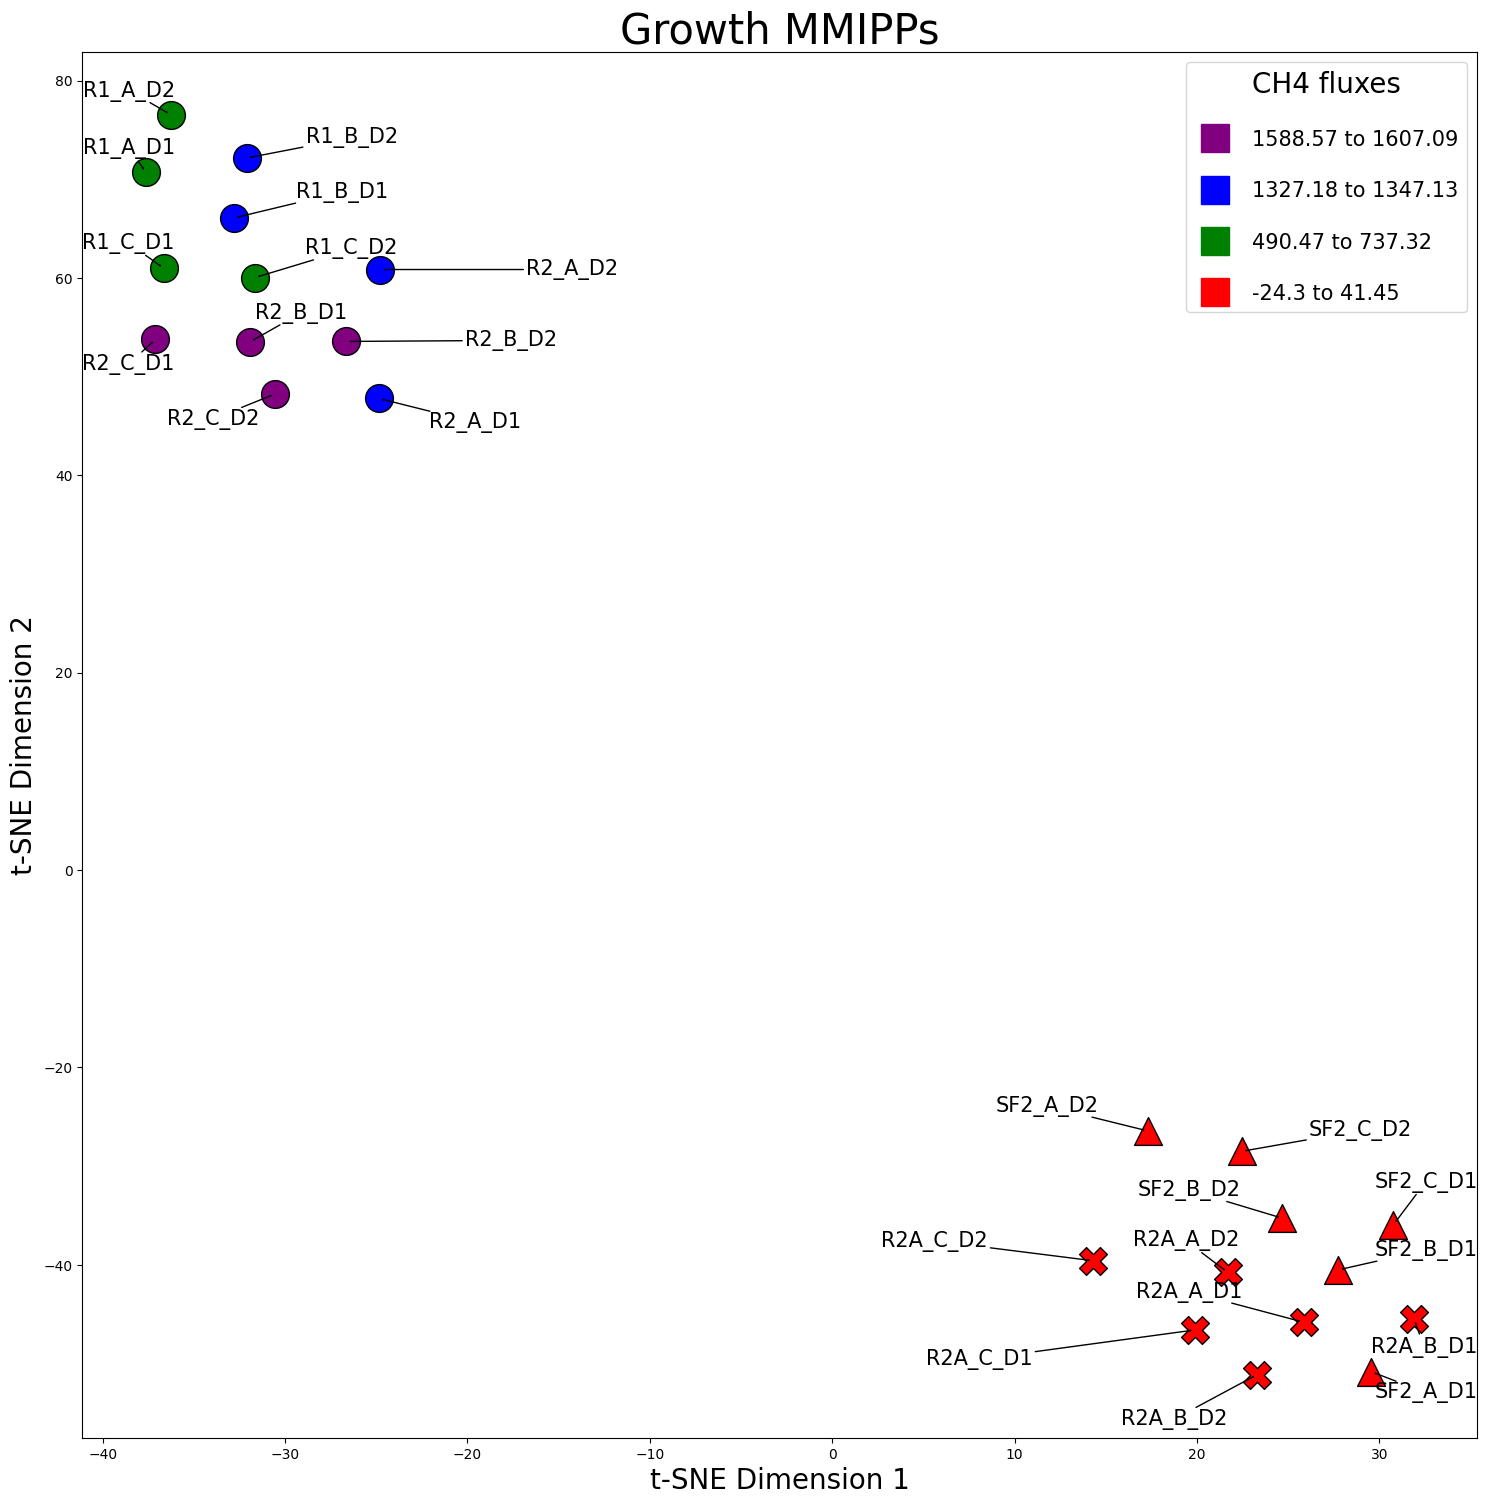

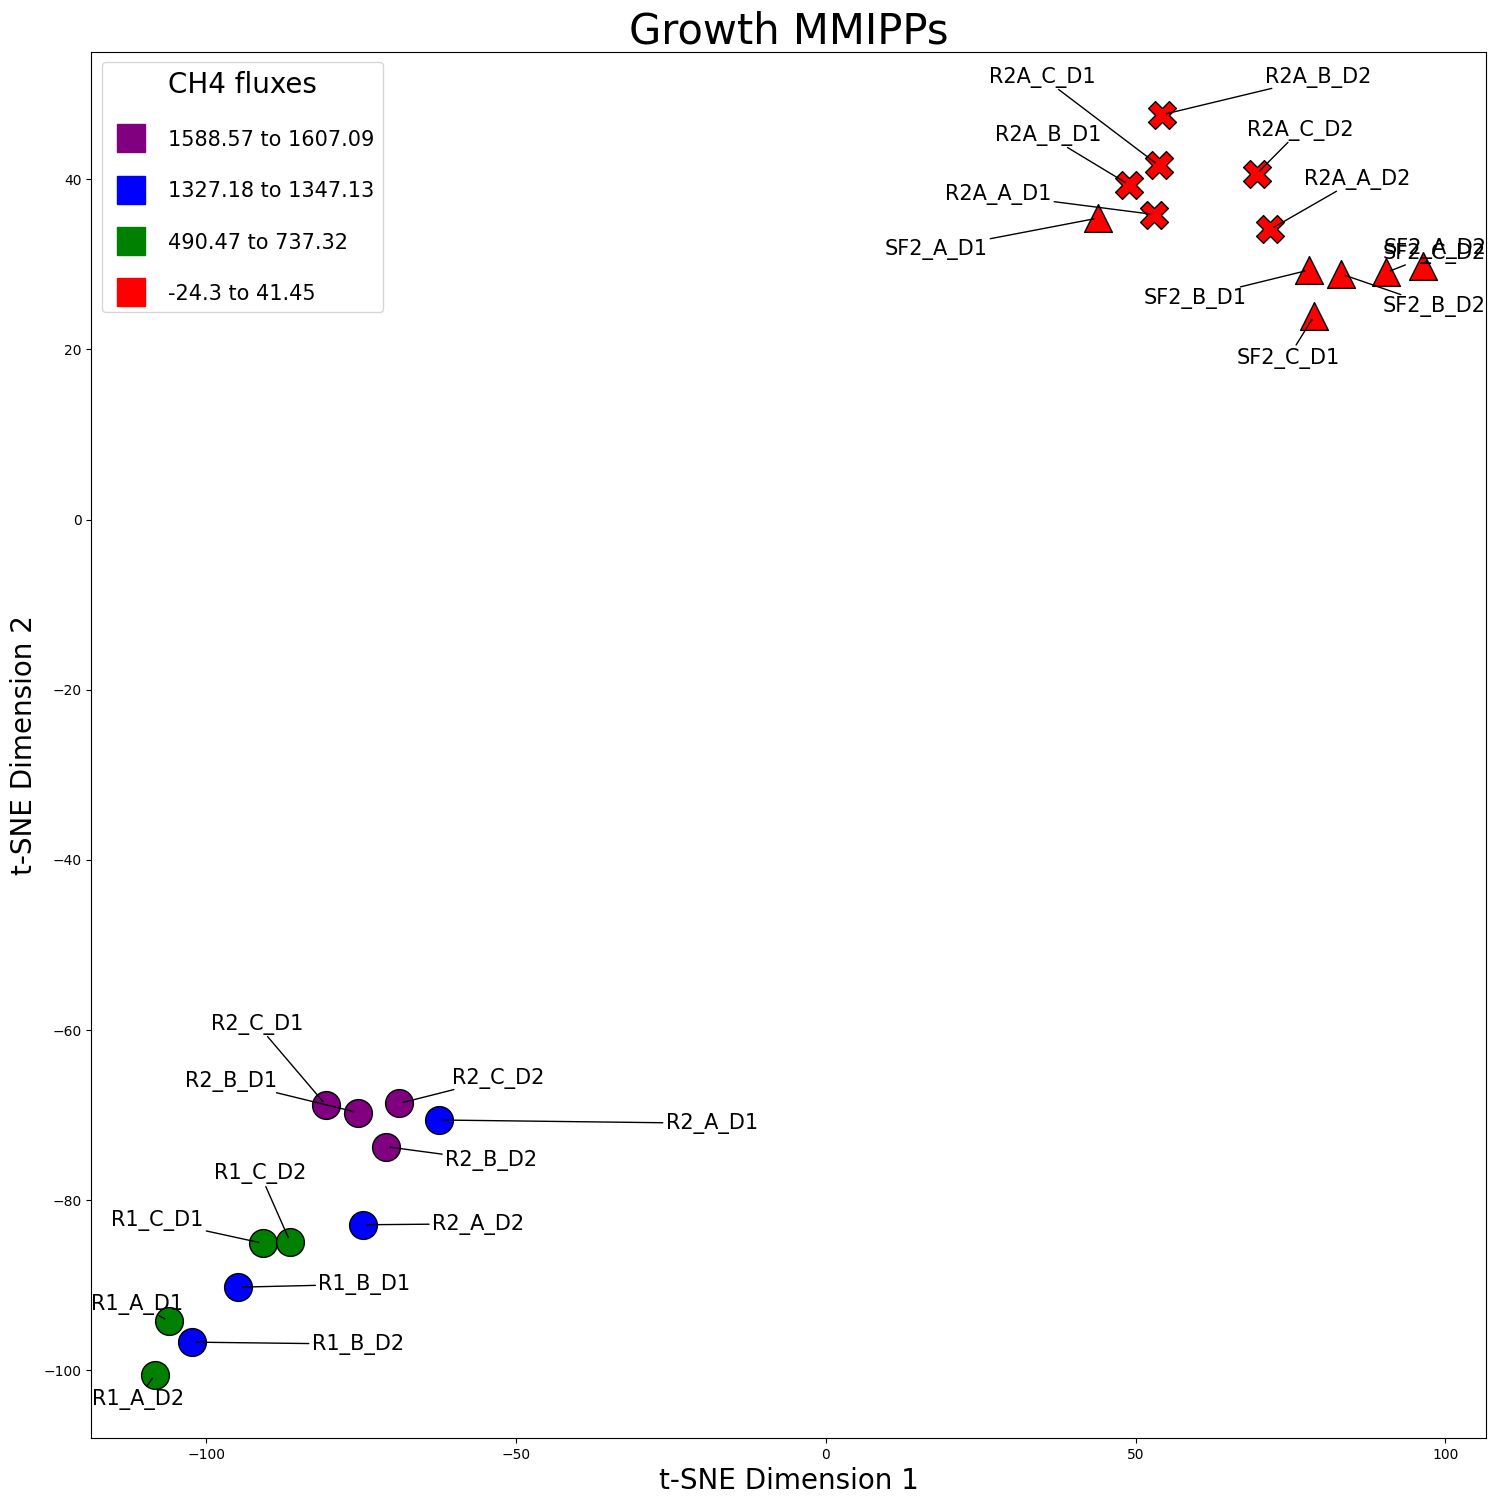

In [22]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot, colors, cm
from pandas import read_csv, Series
from adjustText import adjust_text
from sklearn.manifold import TSNE
from json import load, dump
from glob import glob
from re import sub

# Function to create and plot t-SNE
# Maybe make the above ASV matrix binary: 1 or 0
def create_tsne_plot(data_path, labels=None, title=None, export_name=None, taxonomical_level="order", perplexity=None,
                     titleFont=30, axesFont=20, annotationSize=12, nodeSize=30, legendSize=8, markers=None, nodeColors=None,
                     colorScheme="turbo", colorsHash=None, legendMap=None):
    # load and process the data
    if "_probInteractions" in data_path:   baseName = data_path.replace("_probInteractions", "")
    elif "MetaboliteInteractions" in data_path:  baseName = data_path.replace("MetaboliteInteractions", "")
    elif "zScore" in data_path:   baseName = data_path
    baseName = baseName.replace(".csv", "")
    baseName = baseName.split("/")[-1]
    print(f"The {baseName} figure at {perplexity} perplexity is being generated")

    # define clustering parameters
    s = nodeSize or 10
    if "Fluxes" in data_path:
        indexName = "name"
        perplexity = perplexity or 5
        s = nodeSize or 40
    elif "Sample" in data_path:
        indexName = "Sample"
        perplexity = perplexity or 15
        s = nodeSize or 70
        if "Interval" in data_path:
            indexName = "Interval"
            perplexity = perplexity or 5
            s = nodeSize or 120
    # process the df
    df = read_csv(data_path).set_index(indexName).fillna(0)
    if "Fluxes" in data_path:
        df.drop(["equation", "id"], axis=1, inplace=True)
        # df.drop("Name", axis=0, inplace=True)
        legend_title = f"Taxonomical {taxonomical_level.capitalize()}"
        diet_labels, text_labels, labels = [], [], []
        for asv, diet, day in list([col.split("_") for col in df.columns]):
            diet_labels.append(diet)   ;   text_labels.append(day)
            labels.append(taxonomy[asv][taxonomical_level])
        df.columns = list(map(str, labels))
        df.index = list(map(str, df.index))
        df = df.T
        # display(df)
    elif "Sample" in data_path:
        if "zScore" not in data_path:  df.drop("Name", axis=0, inplace=True)
        legend_title = "CH4 fluxes"
        labels = []
        for i in df.index:
            if "SF" in i:
                labels.append("Restored")
            elif "R2A" in i:
                labels.append("Reference")
            else:
                labels.append("Unrestored")
    
    # define the chart labels and corresponding color codes
    df = df.astype(float)
    chart_labels = Series(df.index if labels is None else labels)
    codes = chart_labels.astype('category').cat.codes

    # create the tSNE mapping
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=5000, learning_rate=50)
    tsne_results = tsne_model.fit_transform(df)
    
    # visualize the tSNE visualization
    title = f"t-SNE of {baseName}" if title is None else title
    pyplot.figure(figsize=(18, 18))
    pyplot.xlabel('t-SNE Dimension 1', fontsize=axesFont)
    pyplot.ylabel('t-SNE Dimension 2', fontsize=axesFont)
    pyplot.title(title, fontsize=titleFont)
    export_name = export_name or f"{baseName}_tSNE"
    # cmap="winter"  ;   all options are here https://matplotlib.org/stable/users/explain/colors/colormaps.html
    xs, ys = tsne_results[:, 0], tsne_results[:, 1]
    if markers is None:
        ## create the scatter elements and legend contents
        scatter = pyplot.scatter(xs, ys, c=chart_labels.astype('category').cat.codes, cmap='brg', alpha=0.5, s=s)
        handles, _ = scatter.legend_elements()
        pyplot.legend(handles=handles, labels=chart_labels.astype('category').cat.categories.tolist(),
                      title=legend_title, prop={'size': legendSize}, title_fontsize=axesFont)
    else:
        ## create the scatter elements
        labelIndex = dict(zip(chart_labels, codes)) if "Sample" in data_path else dict(zip(labels, codes))
        df['tsne-2d-one'], df['tsne-2d-two'] = xs, ys
        codes.index = df.index
        ## define the legend contents
        # if "Sample" in data_path:
        #     nodeColors = nodeColors or {"Restored":"red", "Unrestored":"blue", "Reference": "green"}
        #     for diet, marker in markers.items():
        #         # print(codes, labelIndex)
        #         subset = df[codes == labelIndex[diet]]
        #         scatter = pyplot.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'], marker=marker, s=s, color=nodeColors[diet])
        #     handles = [pyplot.Line2D([0], [0], color=nodeColors[diet], marker=marker, markersize=s/10, label=diet, linestyle="None")
        #                for diet, marker in markers.items()]
        # elif "Fluxes" in data_path:
        if True:
            # norm = colors.Normalize(vmin=codes.min(), vmax=codes.max())
            # colormap = cm.get_cmap(colorScheme, len(labels))
            for i, (index, row) in enumerate(df.iterrows()):
                scatter = pyplot.scatter(row['tsne-2d-one'], row['tsne-2d-two'], s=s, label=labels[i], marker=markers[labels[i]],
                                         color=colorsHash[index], edgecolor="black")
            handles = [pyplot.Line2D([0], [0], color=color, marker="s", markersize=s/20, label=sample, linestyle="None")
                       for sample, color in legendMap.items()]
        pyplot.legend(handles=handles, title=legend_title, prop={'size': legendSize}, title_fontsize=axesFont, labelspacing=1.5)
    ## Add labels to the sample points
    text_labels = df.index if "Sample" in data_path else text_labels 

    # Add labels for each point
    from adjustText import adjust_text
    texts = [pyplot.text(xs[i], ys[i], label, fontsize=annotationSize, ha='center', va='center') for i, label in enumerate(text_labels)]
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), expand=(2.3, 2.3))
    print(export_name)
    pyplot.savefig(export_name, bbox_inches='tight')#, pad_inches=10)

    
# generate the sample plots
for sample_table in glob("nboutput/Sample*probInteractions_zScore.csv"):
    df = read_csv(sample_table)
    for perplexity in list(range(18, 2, -5)):
        baseName = f"{sample_table.replace('.csv', '')}_tSNE_{perplexity}"
        simulation = sample_table.replace("Sample", '').replace("_probInteractions_zScore.csv", '').split("/")[-1]
        create_tsne_plot(sample_table, perplexity=perplexity, title=f"{simulation.capitalize()} MMIPPs", export_name=baseName,
                         titleFont=30, axesFont=20, nodeSize=400, annotationSize=15, legendSize=15,
                         markers={"Restored":'^', "Unrestored":'o', "Reference": 'X'}, colorsHash=ch4_to_sample,
                         legendMap=legendMap
                        )
        
        

# Clustered SMIPPs Heatmaps

nboutput/MAGuptake_probInteractions.csv
uptake
30 MAGs are not defined in the GTDB data
26 ['Proteobacteria' 'Planctomycetota' 'Spirochaetota' None 'Bacteroidota'
 'Verrucomicrobiota' 'Desulfobacterota_F' 'Actinobacteriota'
 'Firmicutes_A' 'Gemmatimonadota' 'Firmicutes_F' 'Caldatribacteriota'
 'Desulfobacterota' 'Marinisomatota' 'Chloroflexota' 'Campylobacterota'
 'Patescibacteria' 'Acidobacteriota' 'Synergistota' 'Thermotogota'
 'Mcinerneyibacteriota' 'Bipolaricaulota' 'SAR324' 'Krumholzibacteriota'
 'Desulfobacterota_D' 'Deinococcota']


/tmp/ipykernel_107461/2535650864.py:38: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = df.sum()
/tmp/ipykernel_107461/2535650864.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_sums = df.sum(axis=1)
/opt/env/python3_modelseed/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


nboutput/MAGexcretion_probInteractions.csv
excretion
30 MAGs are not defined in the GTDB data
26 ['Proteobacteria' 'Planctomycetota' 'Spirochaetota' None 'Bacteroidota'
 'Verrucomicrobiota' 'Desulfobacterota_F' 'Actinobacteriota'
 'Firmicutes_A' 'Gemmatimonadota' 'Firmicutes_F' 'Caldatribacteriota'
 'Desulfobacterota' 'Marinisomatota' 'Chloroflexota' 'Campylobacterota'
 'Patescibacteria' 'Acidobacteriota' 'Synergistota' 'Thermotogota'
 'Mcinerneyibacteriota' 'Bipolaricaulota' 'SAR324' 'Krumholzibacteriota'
 'Desulfobacterota_D' 'Deinococcota']


/tmp/ipykernel_107461/2535650864.py:38: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = df.sum()
/tmp/ipykernel_107461/2535650864.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_sums = df.sum(axis=1)
/opt/env/python3_modelseed/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


nboutput/MAGgrowth_probInteractions.csv
growth
30 MAGs are not defined in the GTDB data
10 ['Bacteroidota' 'Proteobacteria' 'Firmicutes_A' 'Actinobacteriota'
 'Caldatribacteriota' 'Planctomycetota' 'Desulfobacterota'
 'Krumholzibacteriota' 'Gemmatimonadota' 'Spirochaetota']


/tmp/ipykernel_107461/2535650864.py:38: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = df.sum()
/tmp/ipykernel_107461/2535650864.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_sums = df.sum(axis=1)


nboutput/MAGuptake_dataInteractions.csv
uptake_dataInteractions


ValueError: could not convert string to float: '67/6/4/27/29/104'

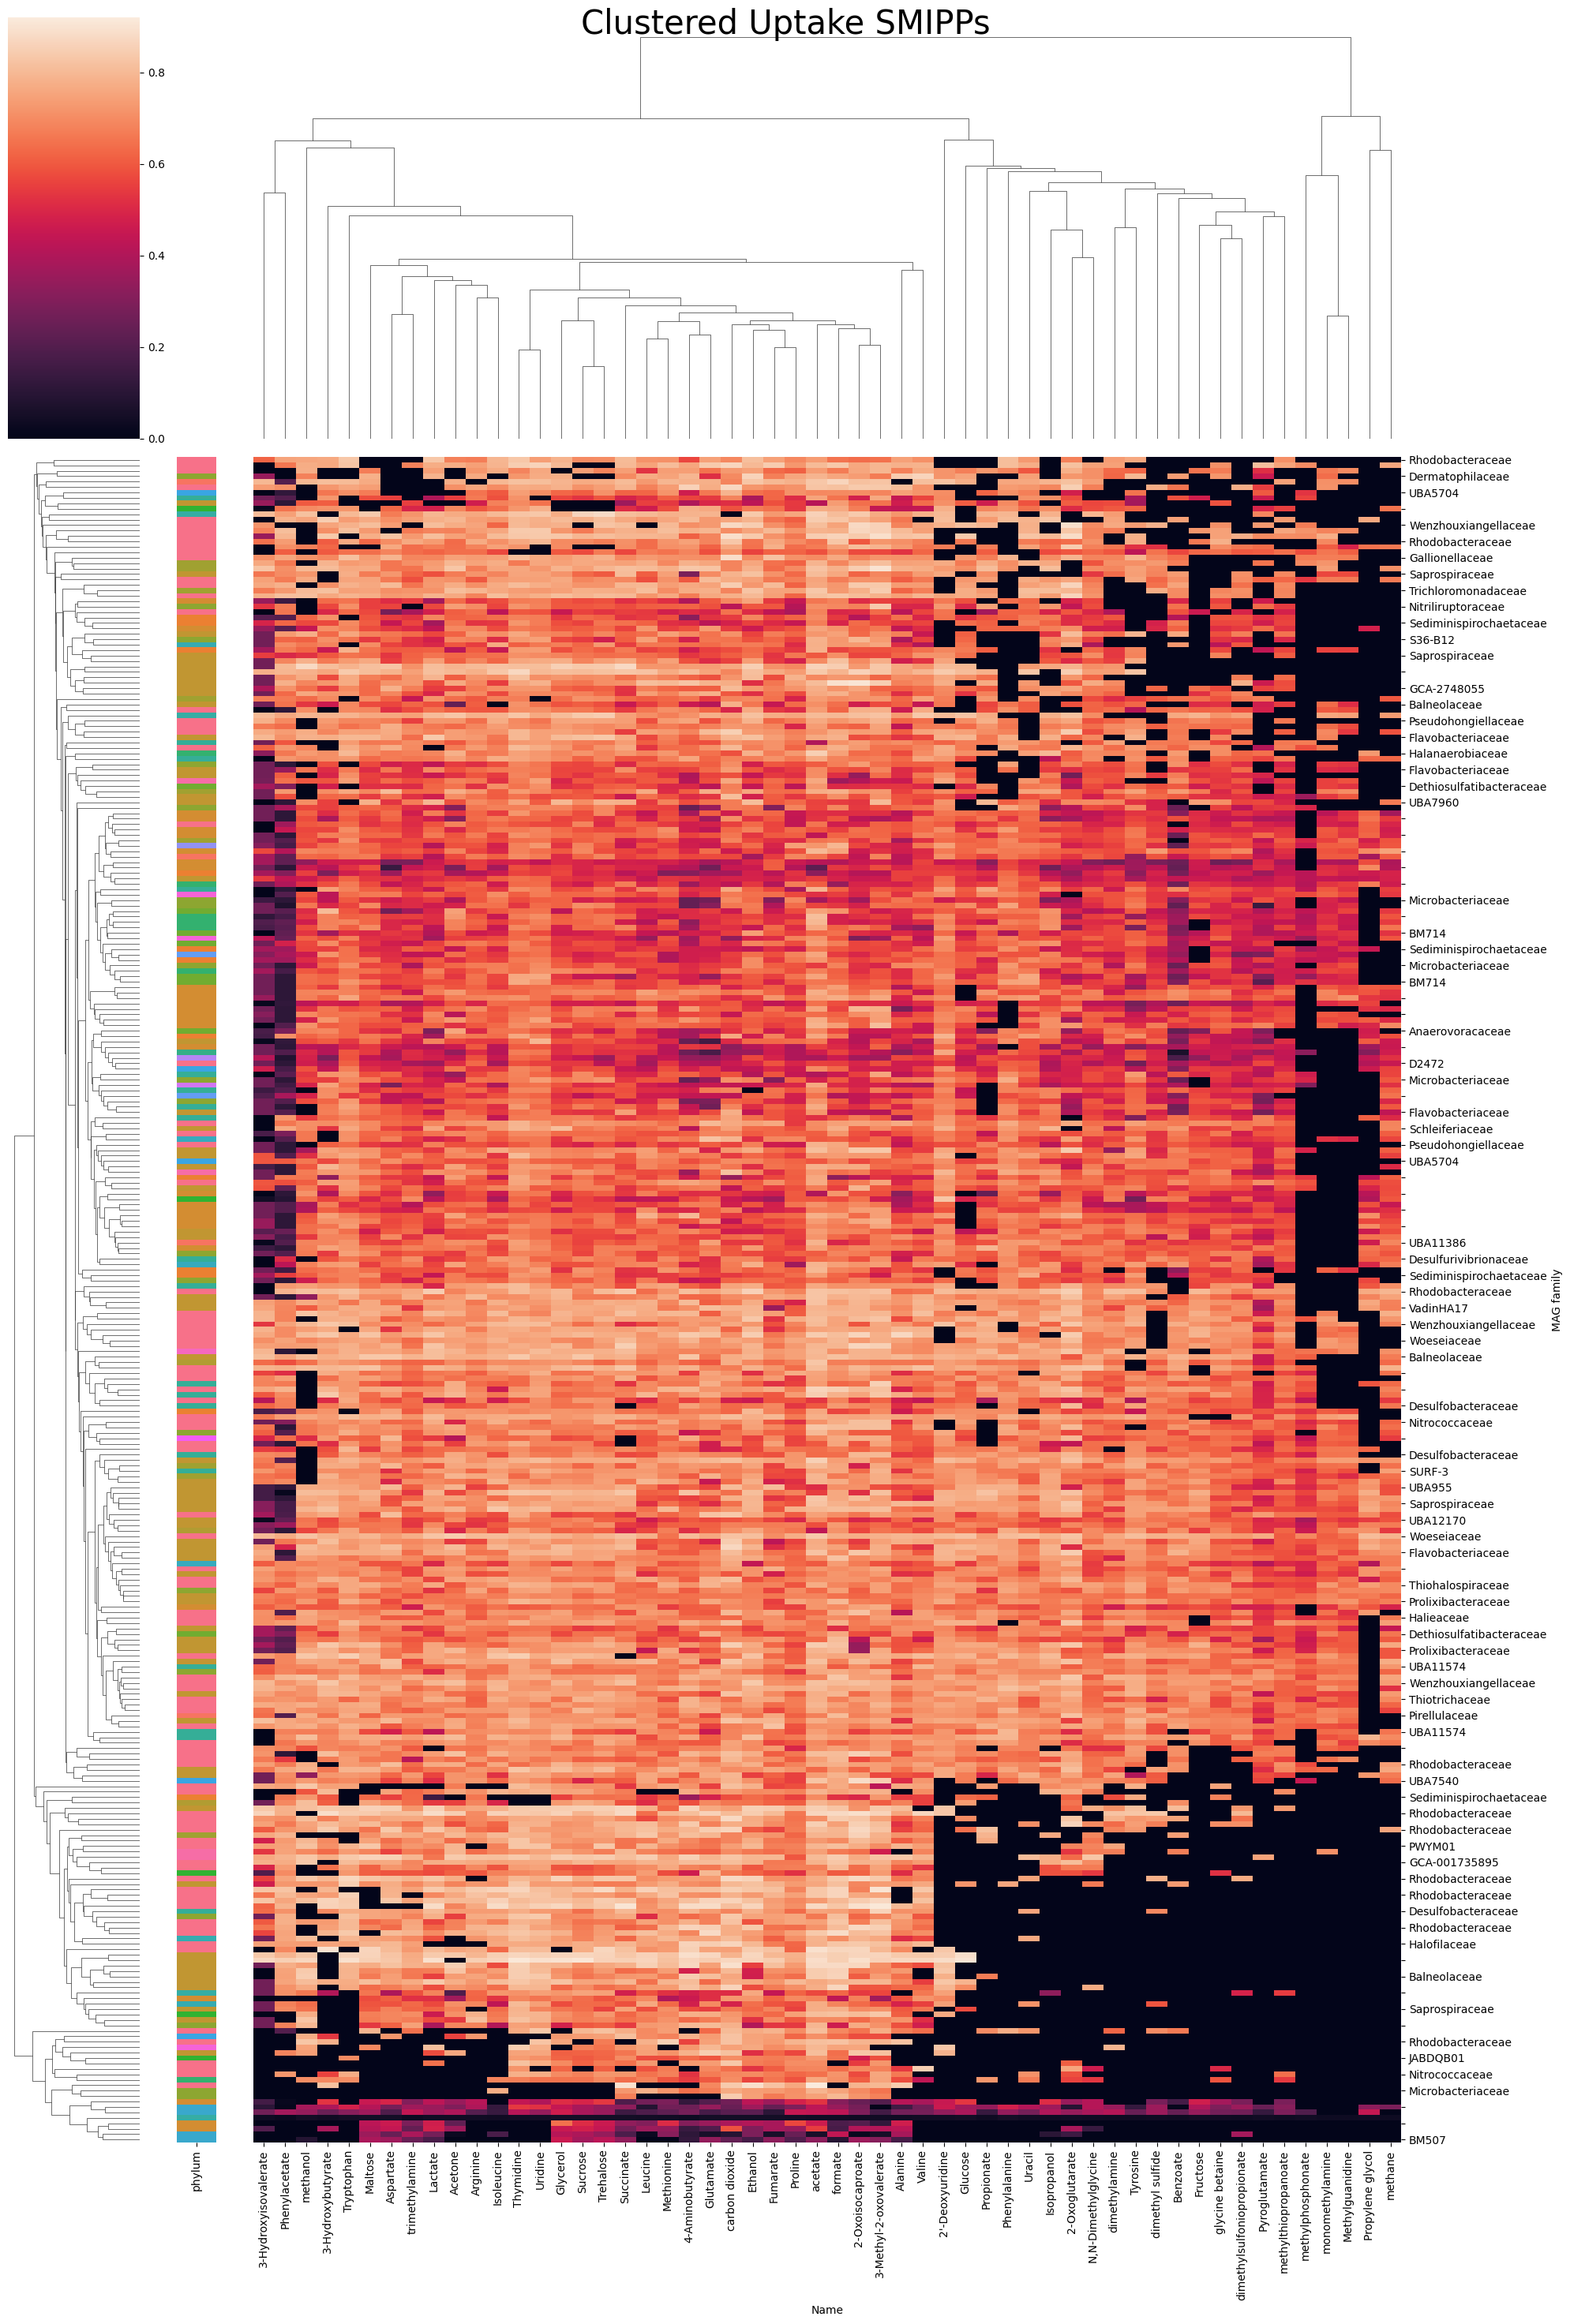

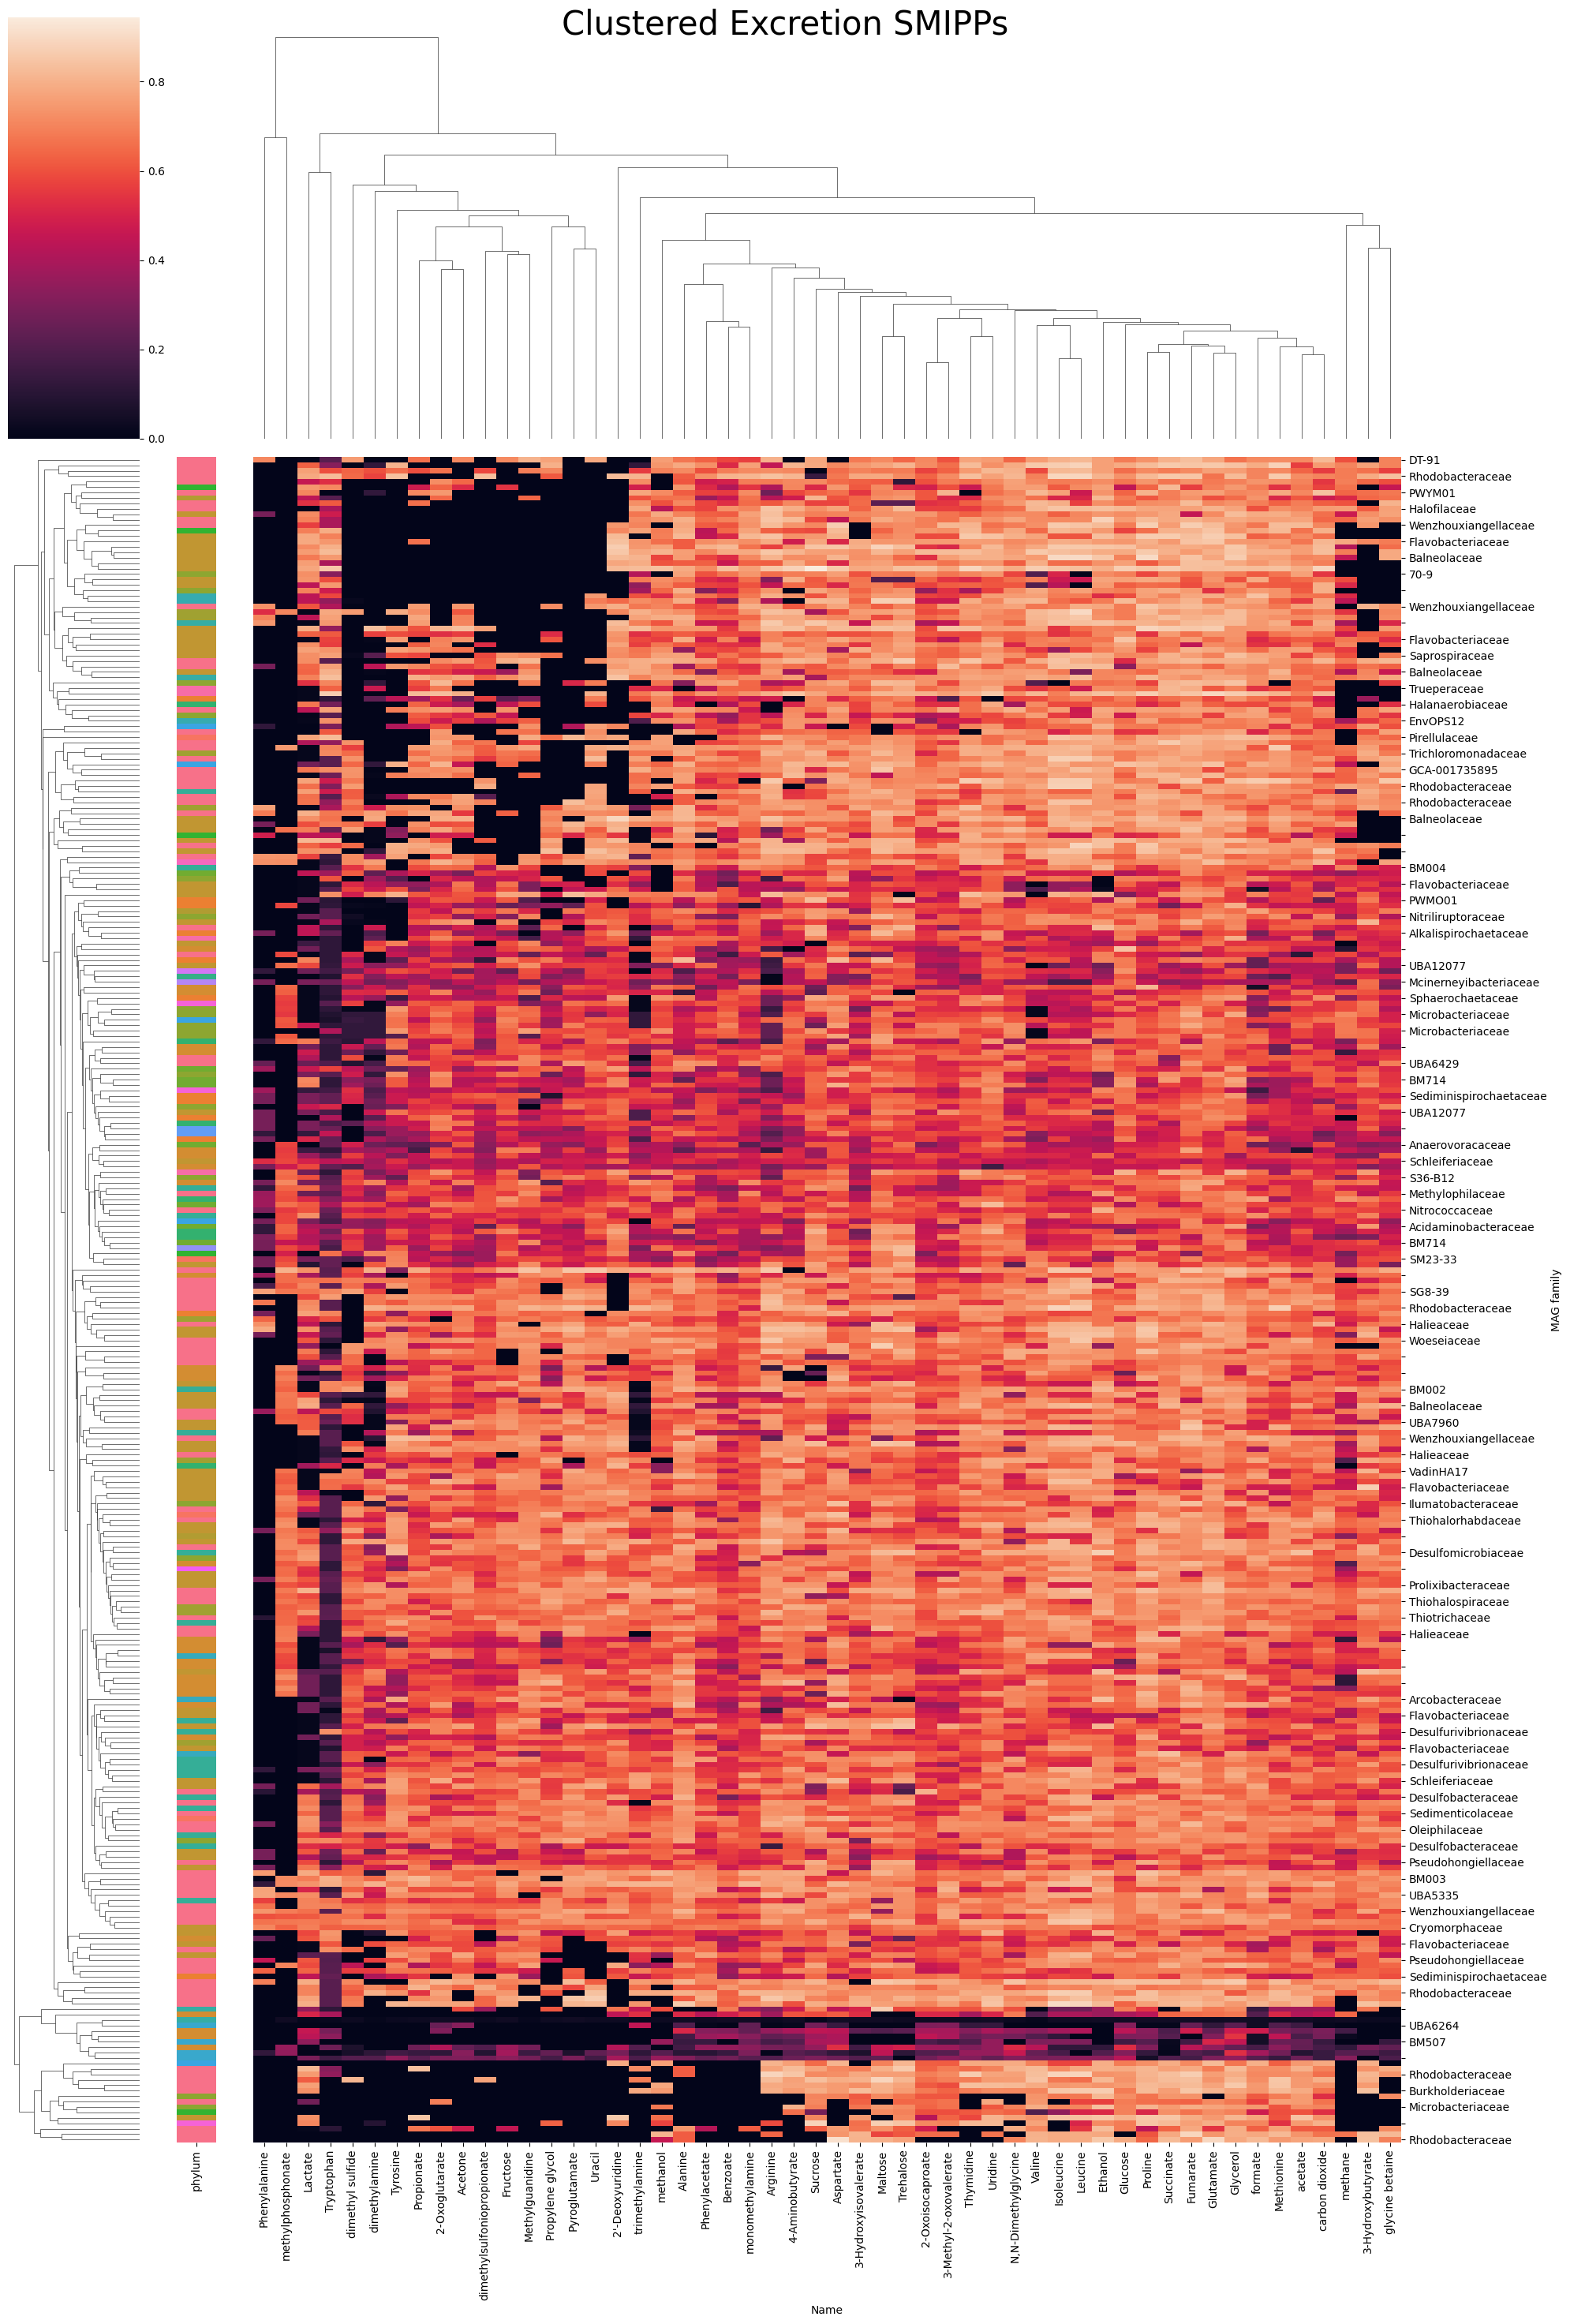

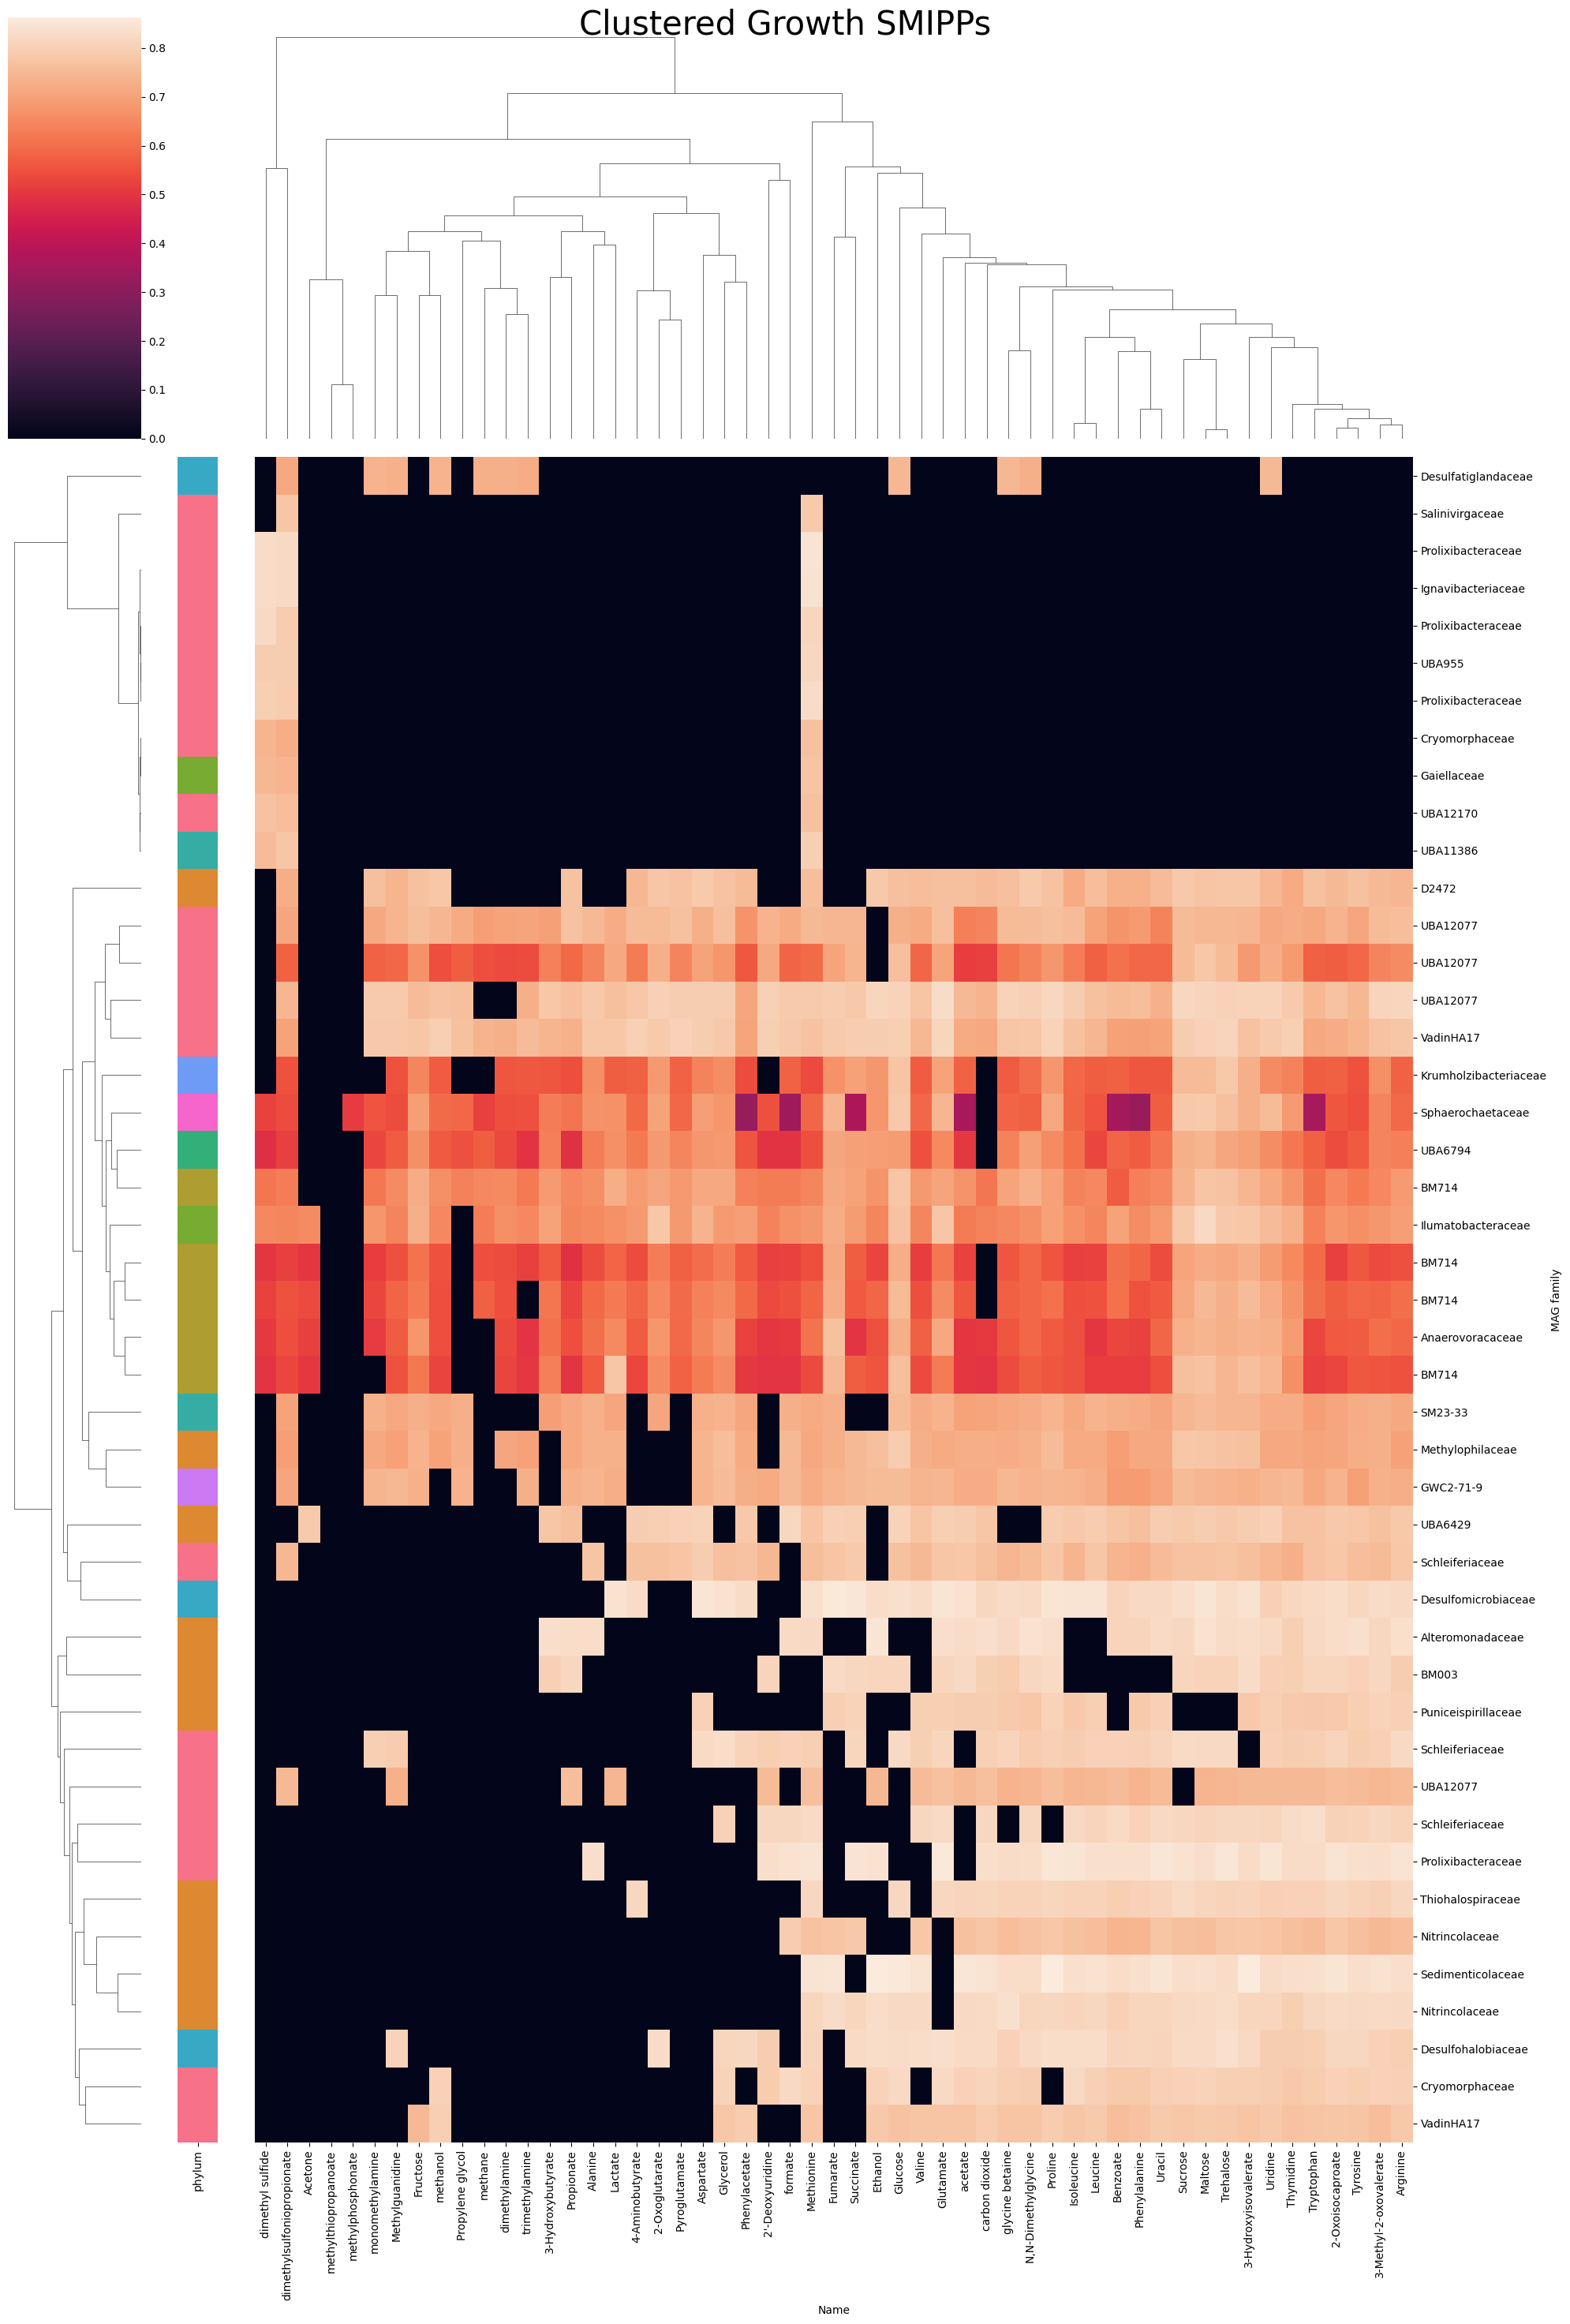

In [36]:
from matplotlib import pyplot
from pandas import read_csv
from numpy import inf, nan
import seaborn as sns
from json import load


def ClusterHeatmap(data_path, taxonomy, taxonomical_order="phylum"):
    baseName = data_path.replace("_probInteractions", "").replace("MAG", '').replace(".csv", '').split("/")[-1]
    print(baseName)
    df = read_csv(data_path).set_index("MAG")
    if "zScore" not in data_path:
        df.columns = df.loc["Name"]
        df.drop("Name", axis=0, inplace=True)
    else:
        df.columns = [ID_name[ID] for ID in df.columns]
    df = df.astype(float)
    df.replace([inf, -inf], nan, inplace=True)
    df.fillna(0, inplace=True)
    yAxisTaxa = "family"
    if "labels" not in df.columns:
        taxa_row = []
        newIndex = []
        for i in df.index:
            if i not in taxonomy:
                # print(f"{i} is not defined in the GTDB data")
                taxa_row.append(None)
                newIndex.append(None)
                continue
            taxa_row.append(taxonomy[i].get(taxonomical_order, "other"))
            newIndex.append(taxonomy[i].get(yAxisTaxa, "other"))
        df[taxonomical_order] = taxa_row
    print(f"{len([x for x in taxa_row if x is None])} MAGs are not defined in the GTDB data")
    df.index = newIndex
    df.index.name = f"MAG {yAxisTaxa}"
    
    # Check for zero-sum columns or rows and adjust
    column_sums = df.sum()
    row_sums = df.sum(axis=1)
    zero_sum_columns = column_sums[column_sums == 0].index.tolist()
    zero_sum_rows = row_sums[row_sums == 0].index.tolist()
    if zero_sum_columns:
        df.drop(zero_sum_columns, axis=1, inplace=True)
    if zero_sum_rows:
        df.drop(zero_sum_rows, axis=0, inplace=True)

    mapping = dict(zip(df.index, "rbg"))
    uniqueTaxa = df[taxonomical_order].unique()
    print(len(uniqueTaxa), uniqueTaxa)
    mapping = dict(zip(uniqueTaxa, sns.husl_palette(len(uniqueTaxa))))
    row_colors = df[taxonomical_order].map(mapping)
    # print(row_colors)
    df.drop(taxonomical_order, axis=1, inplace=True)

    clusterMap = sns.clustermap(df, row_colors=row_colors, figsize=(20, 30), dendrogram_ratio=(.1, .2))
    # clusterMap = sns.clustermap(df, figsize=(20, 20), dendrogram_ratio=(.1, .2))
    clusterMap.figure.subplots_adjust(bottom=0.15, top=0.95)  # Adjust these values as needed to fit labels
    clusterMap.figure.suptitle(f"Clustered {baseName.capitalize()} SMIPPs", fontsize=30)
    clusterMap.figure.tight_layout()
    # pyplot.setp(clusterMap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    clusterMap.figure.savefig(f"{baseName}_heatmap.png")


# parse the taxonomy
with open("datacache/mag_to_name.json", 'r') as jsonIn:
    mag_to_name = load(jsonIn)

# print(mag_to_name)
taxonomy_df = read_csv("data/Saltern_phylogeny.csv")
taxonomy_raw = dict(zip(taxonomy_df["User Genome"].to_list(), taxonomy_df["Classification"].to_list()))
taxonomy = {}
for k,v in taxonomy_raw.items():
    phylogeny = v.split(";")
    phylogeny = [phyla.split("__")[1] for phyla in phylogeny]
    taxonomy[mag_to_name[k+".RAST"]+".pg.G.D"] = dict(zip(["kingdom", "phylum", "class", "order", "family", "genus", "species"], phylogeny))

# print(taxonomy.keys())
# generate the ASV plots
from glob import glob
for smmippTable in glob("nboutput/MAG*Interactions.csv"):
    print(smmippTable)
    ClusterHeatmap(smmippTable, taxonomy, taxonomical_order="phylum")

# Correlating the MMIPPs with metabolomics data

# Correlate the MMIPPs to the metabolomics

nboutput/Sampleuptake_probInteractions.csv
2'-Deoxyuridine 2'-Deoxyuridine
2-Oxoglutarate 2-Oxoglutarate
2-Oxoisocaproate 2-Oxoisocaproate
3-Hydroxybutyrate 3-Hydroxybutyrate
3-Hydroxyisovalerate 3-Hydroxyisovalerate
3-Methyl-2-oxovalerate 3-Methyl-2-oxovalerate
4-Aminobutyrate 4-Aminobutyrate
acetate Acetate
Acetone Acetone
Alanine Alanine
Arginine Arginine
Aspartate Aspartate
Benzoate Benzoate
glycine betaine Betaine
dimethylamine Dimethylamine
Ethanol Ethanol
formate Formate
Fructose Fructose
Fumarate Fumarate
Glucose Glucose
Glutamate Glutamate


/tmp/ipykernel_103930/3225523434.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure(figsize=(10, 8))  # Set the size of the figure


Glycerol Glycerol
Isobutyrate Isobutyrate
The Isobutyrate computed fluxes are all 0
Isoleucine Isoleucine
Isopropanol Isopropanol
Isovalerate Isovalerate
The Isovalerate computed fluxes are all 0
Lactate Lactate
Leucine Leucine
Maltose Maltose
methanol Methanol
Methionine Methionine
monomethylamine Methylamine
Methylguanidine Methylguanidine
N,N-Dimethylglycine N,N-Dimethylglycine
Phenylacetate Phenylacetate
Phenylalanine Phenylalanine
Proline Proline
Propionate Propionate
Propylene glycol Propylene glycol
Pyroglutamate Pyroglutamate
Succinate Succinate
Sucrose Sucrose
Thymidine Thymidine
Trehalose Trehalose
trimethylamine Trimethylamine
Tryptophan Tryptophan
Tyrosine Tyrosine
Uracil Uracil
Uridine Uridine
Valine Valine
nboutput/Sampleexcretion_probInteractions.csv
2'-Deoxyuridine 2'-Deoxyuridine
2-Oxoglutarate 2-Oxoglutarate
2-Oxoisocaproate 2-Oxoisocaproate
3-Hydroxybutyrate 3-Hydroxybutyrate
3-Hydroxyisovalerate 3-Hydroxyisovalerate
3-Methyl-2-oxovalerate 3-Methyl-2-oxovalerate
4-Am

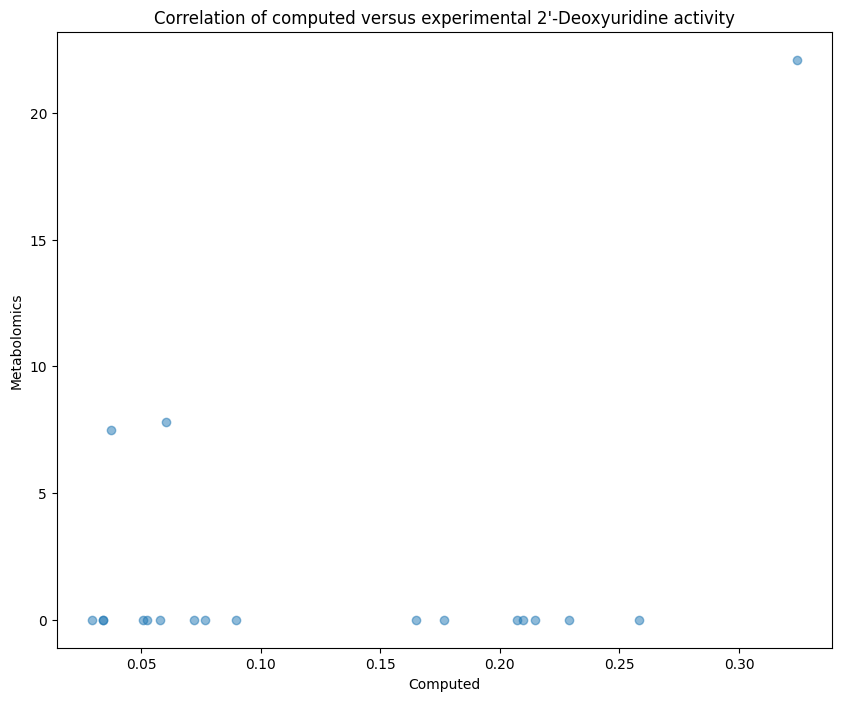

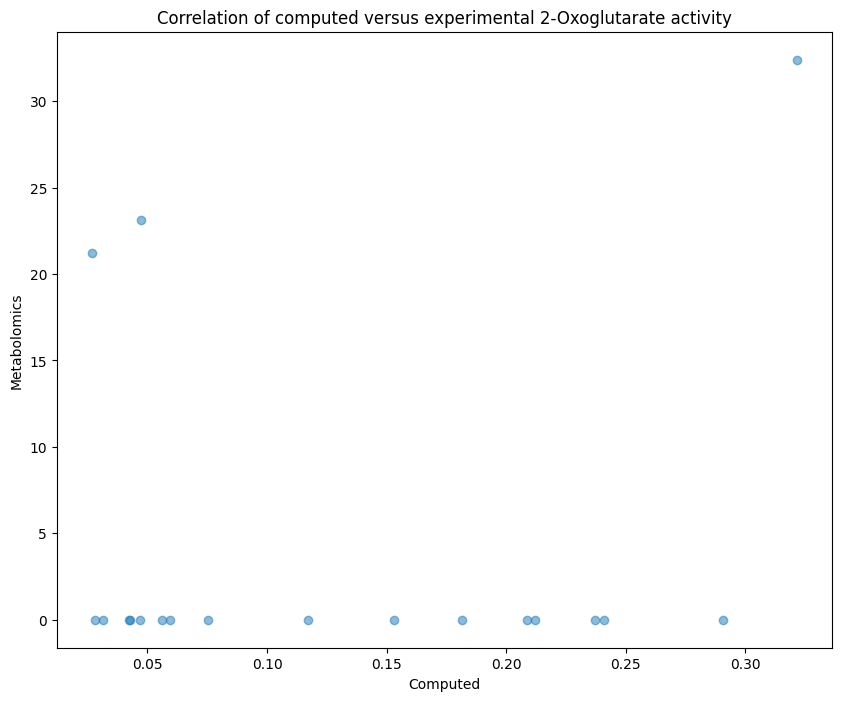

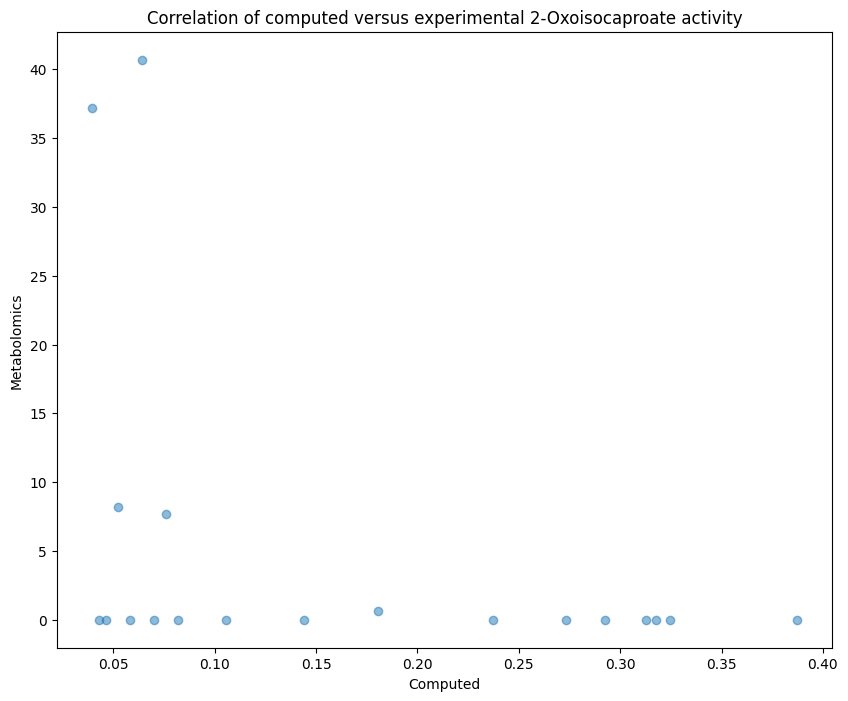

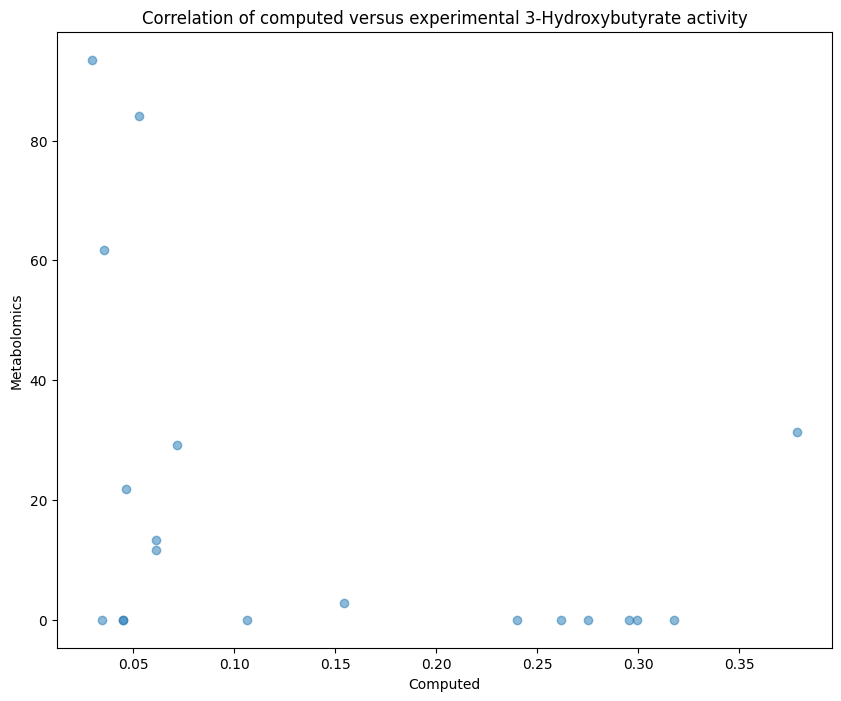

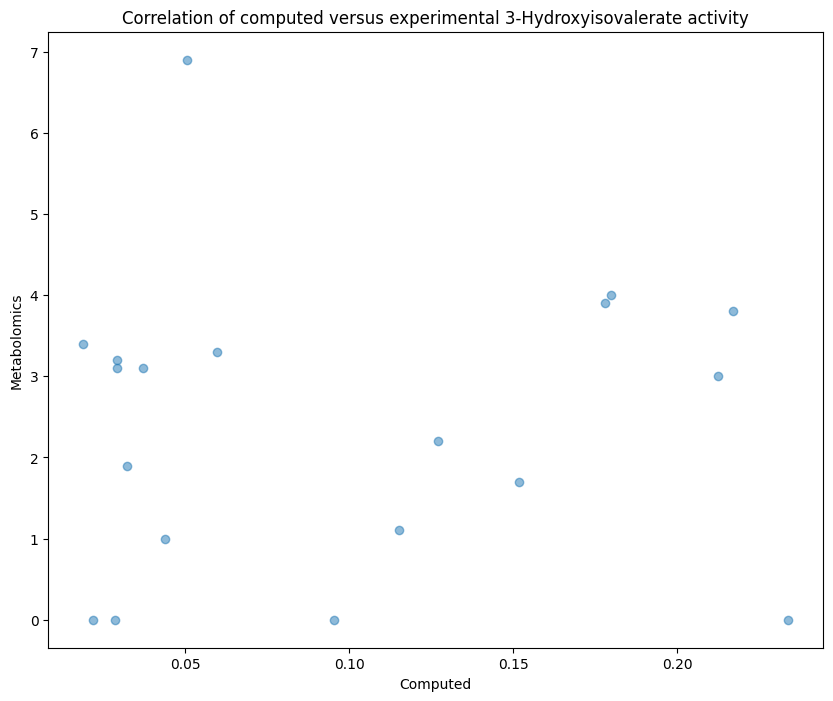

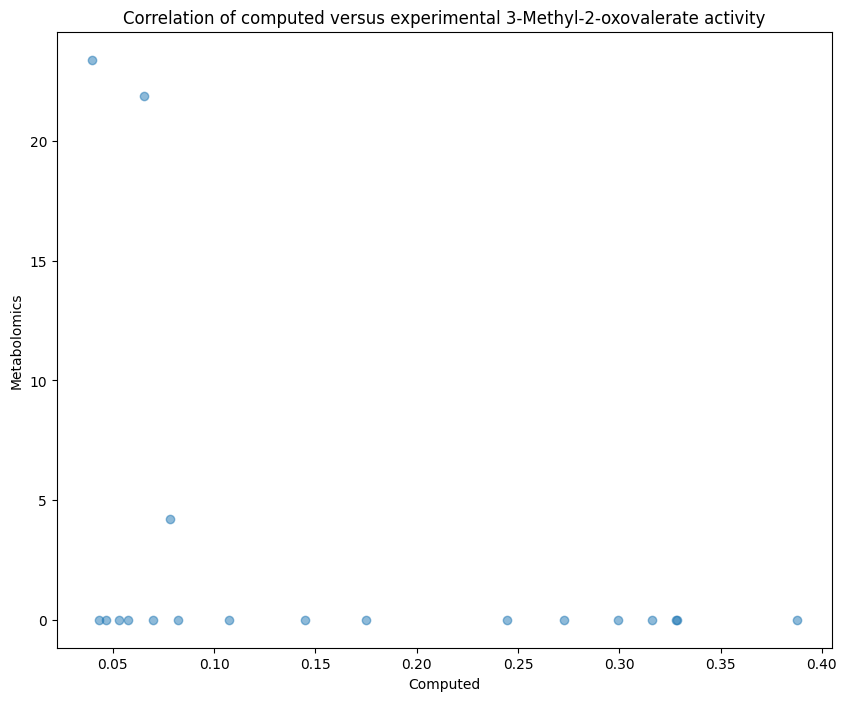

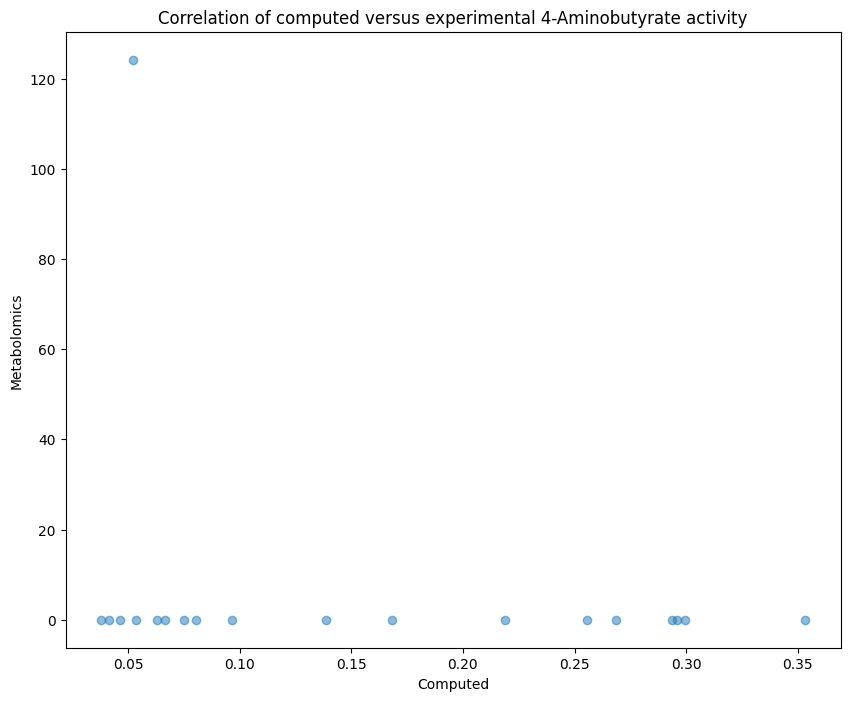

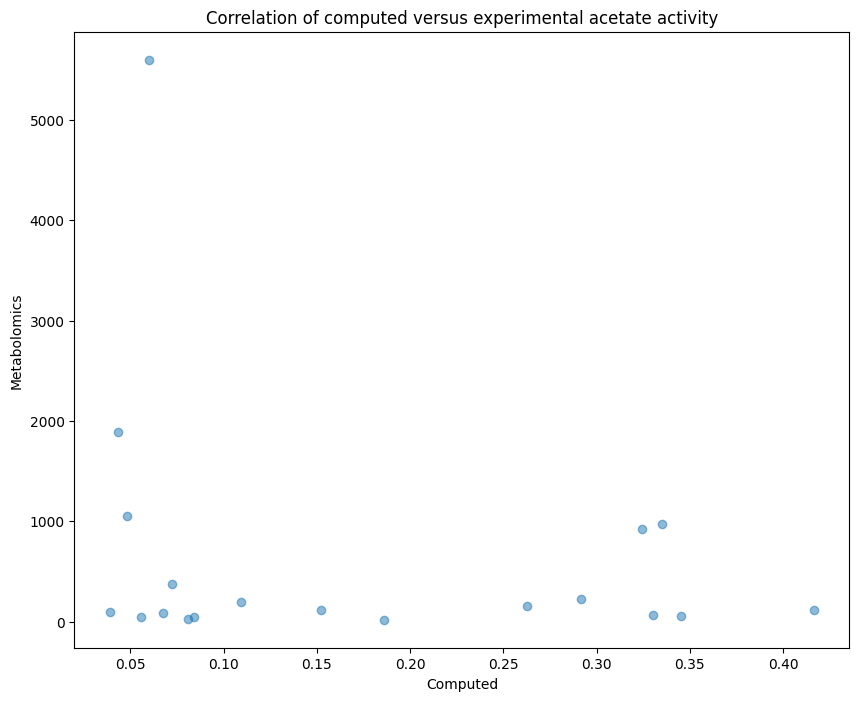

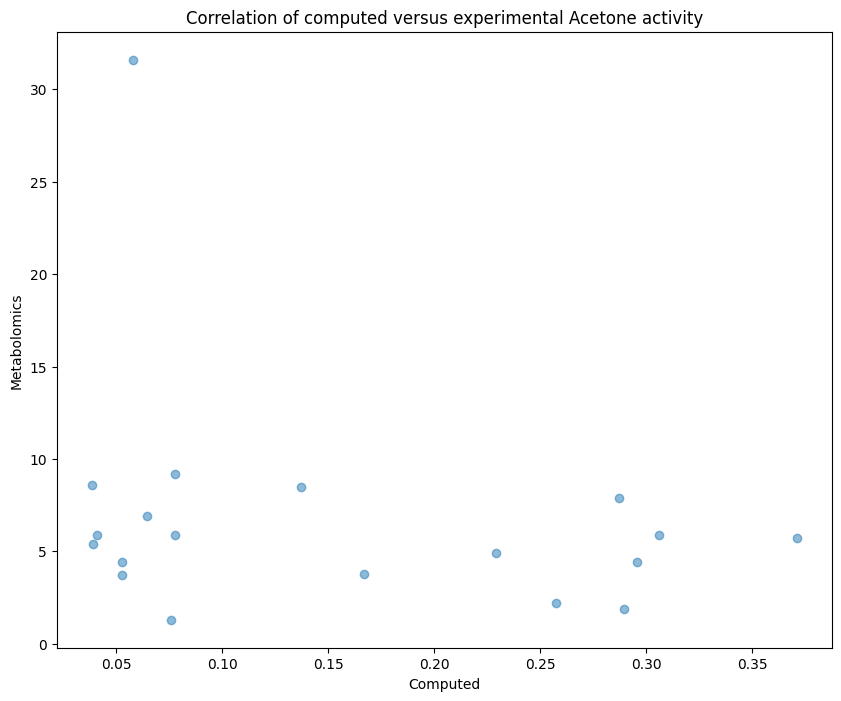

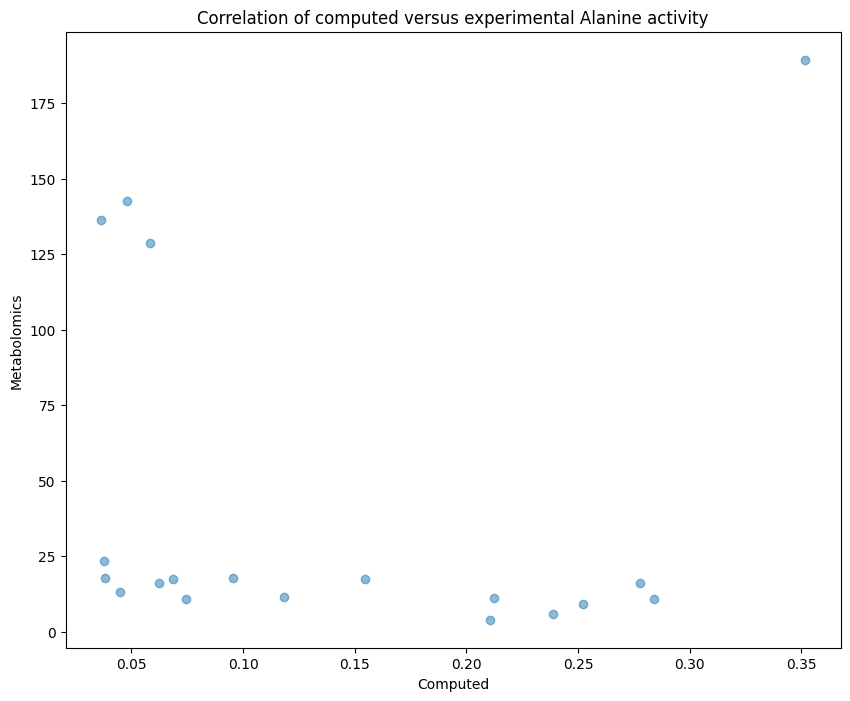

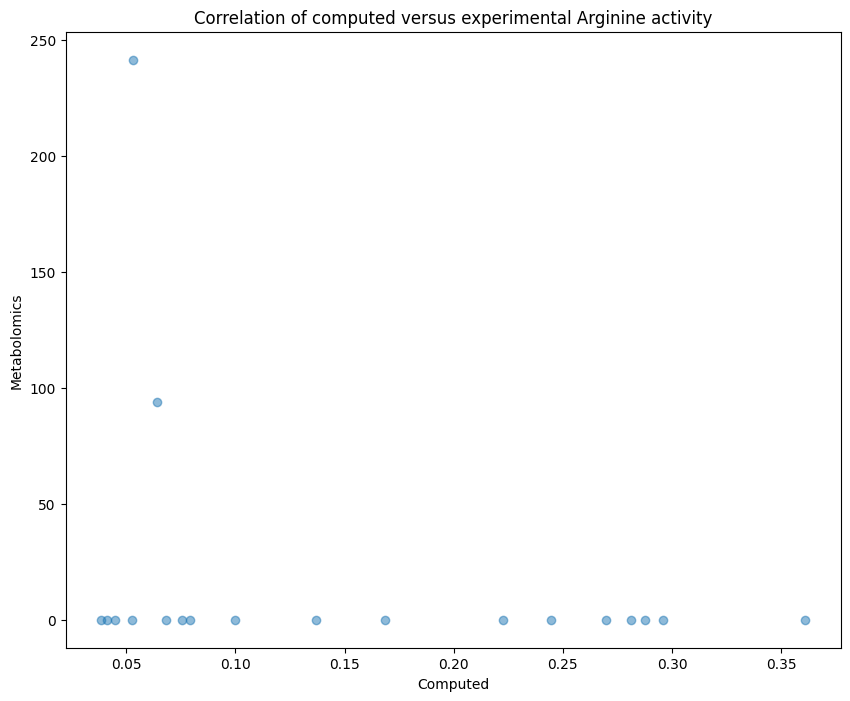

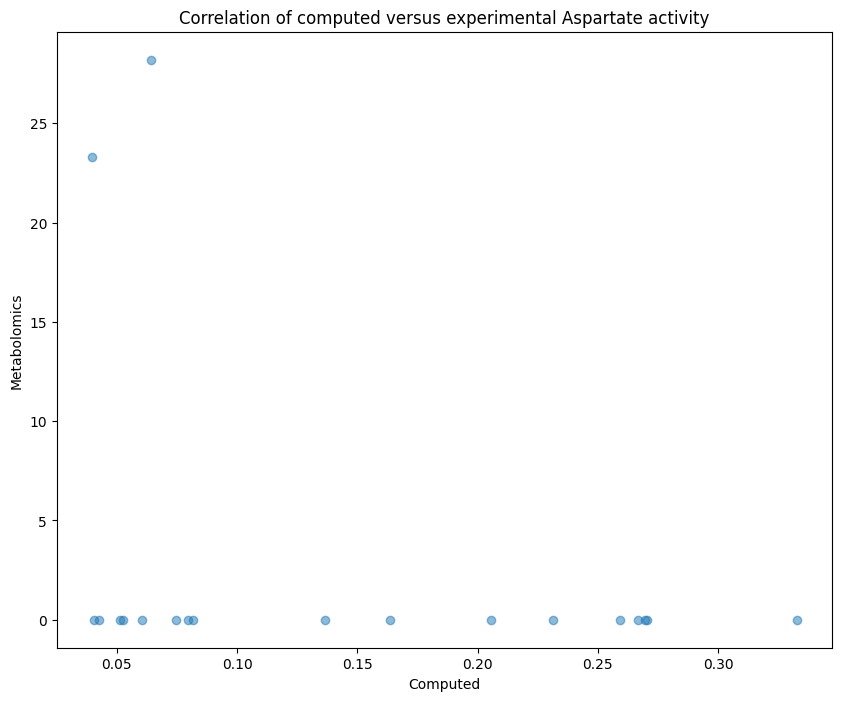

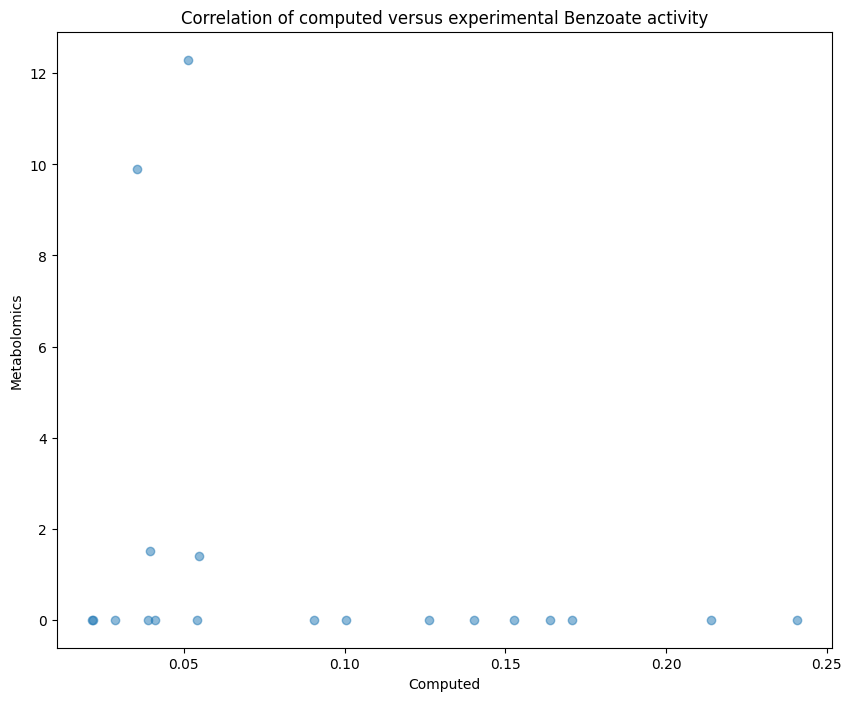

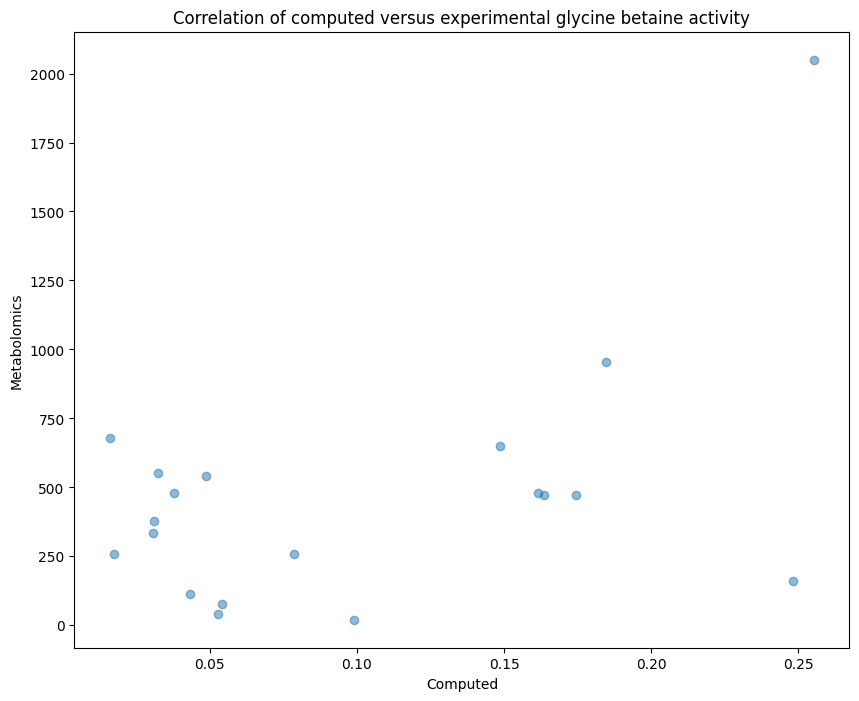

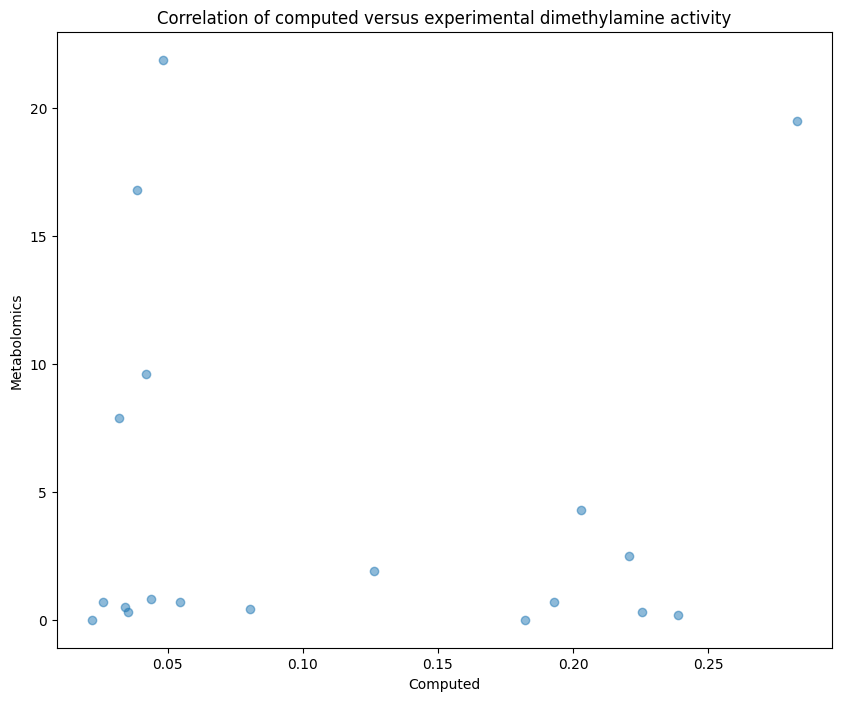

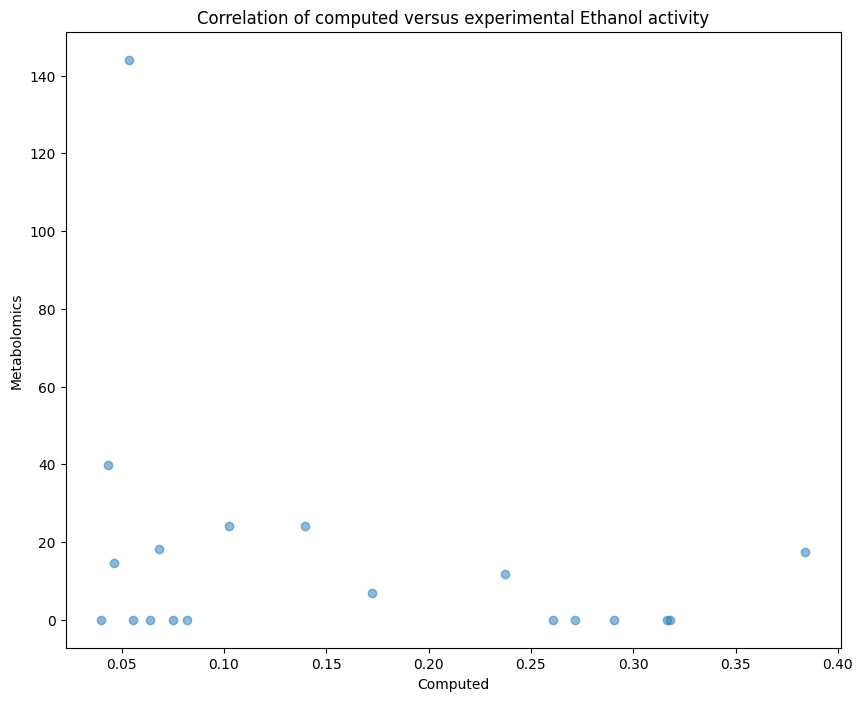

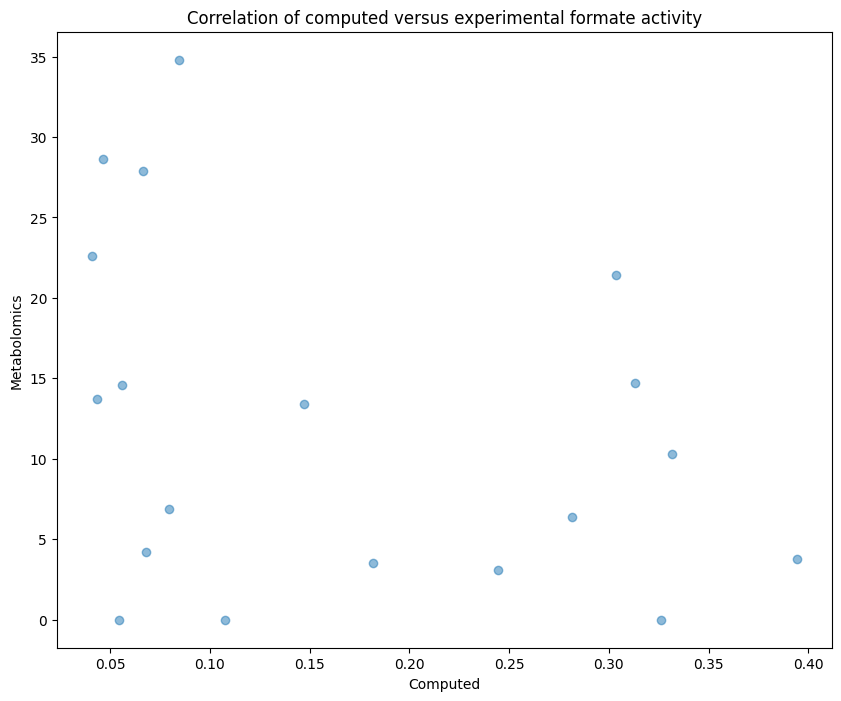

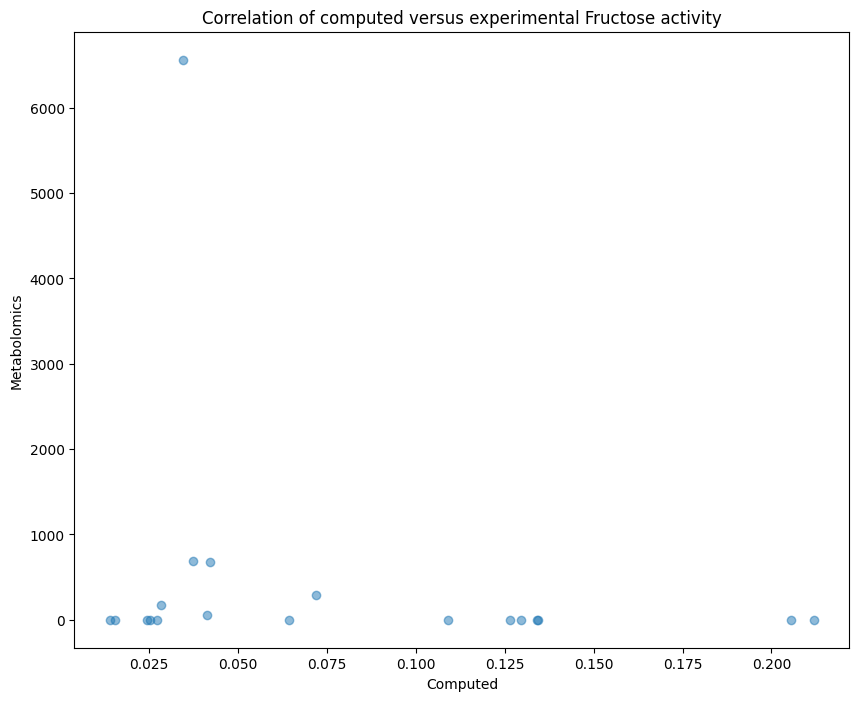

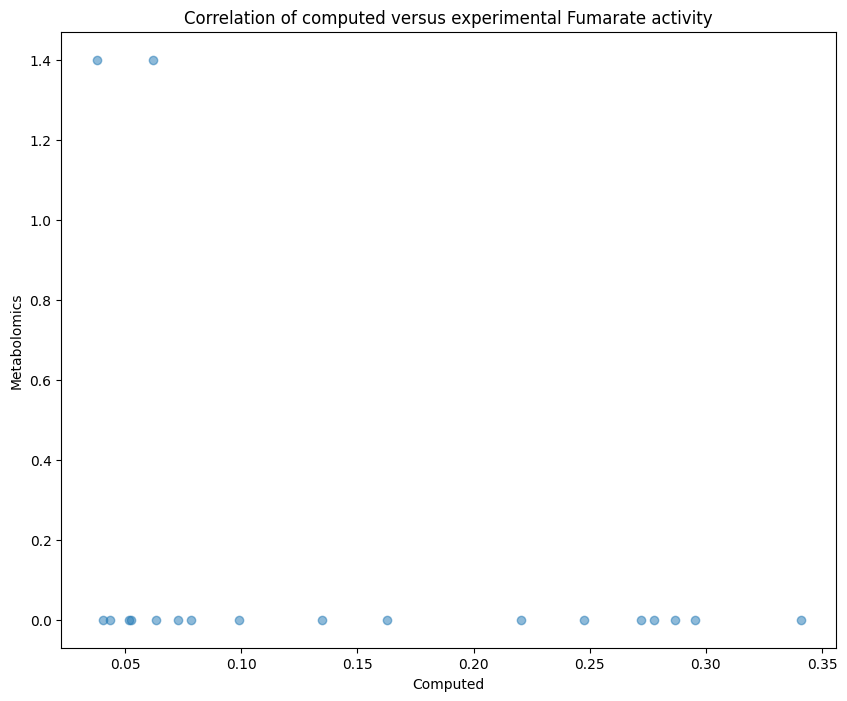

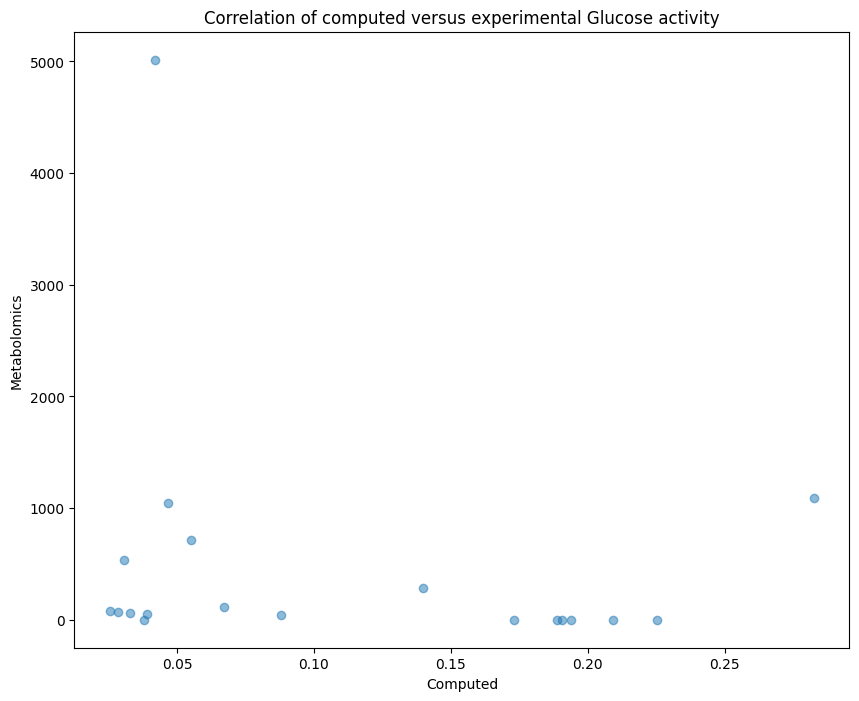

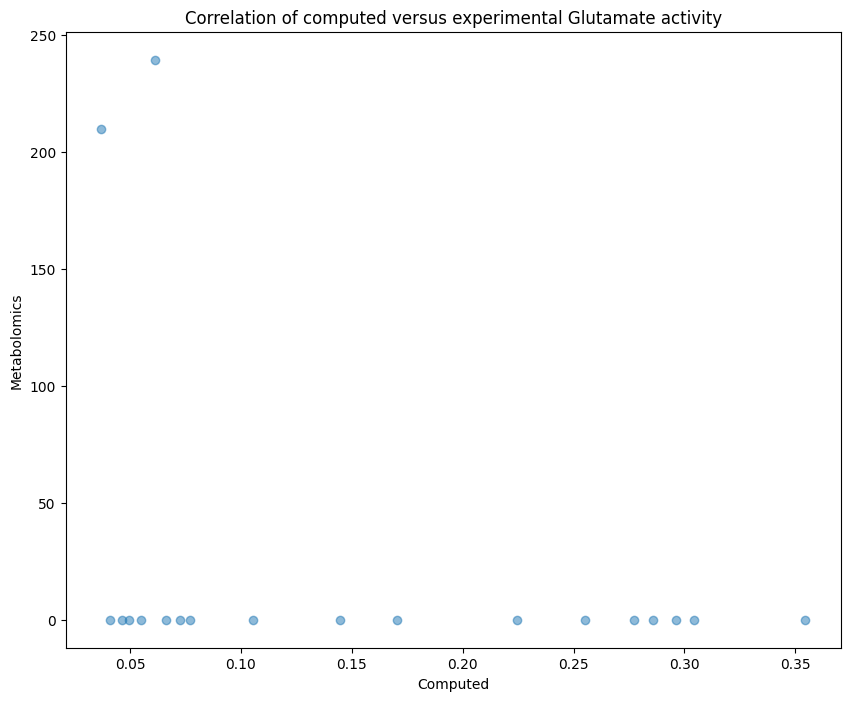

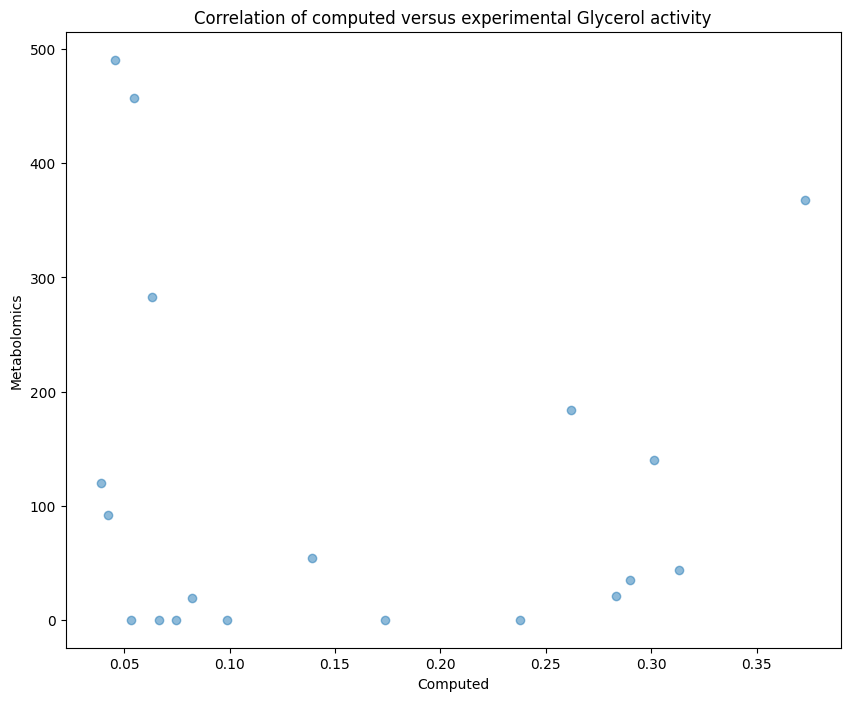

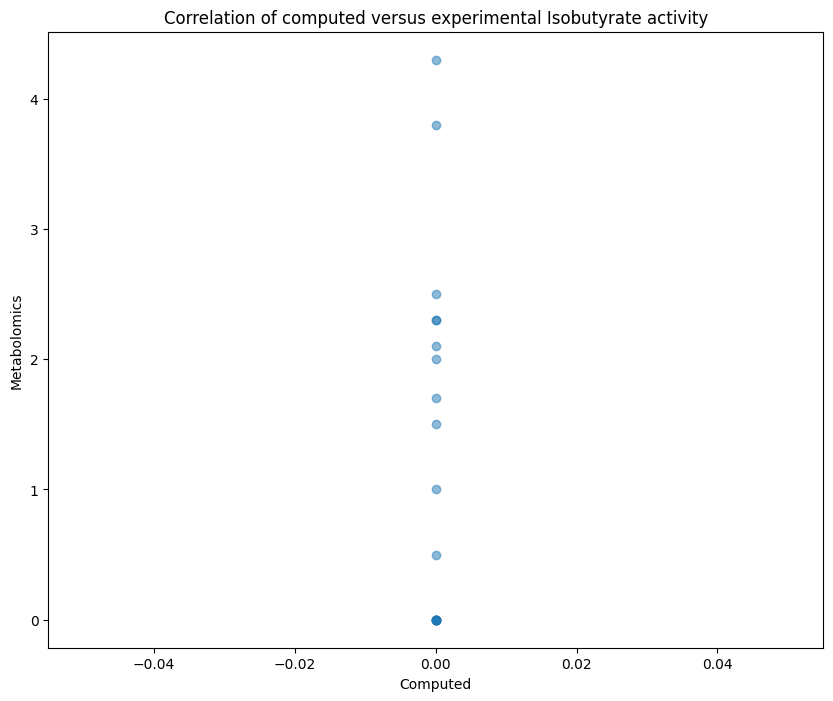

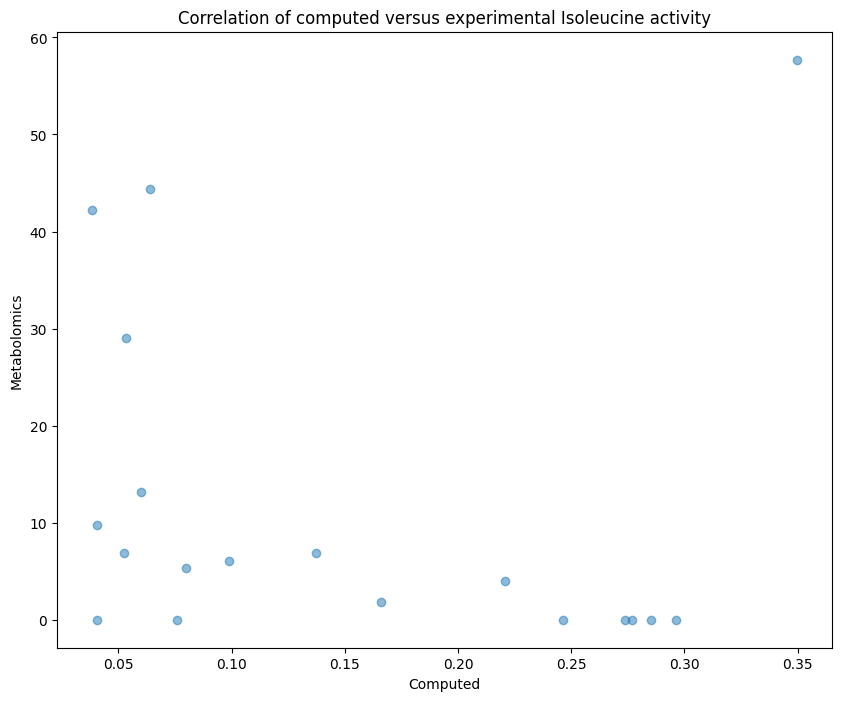

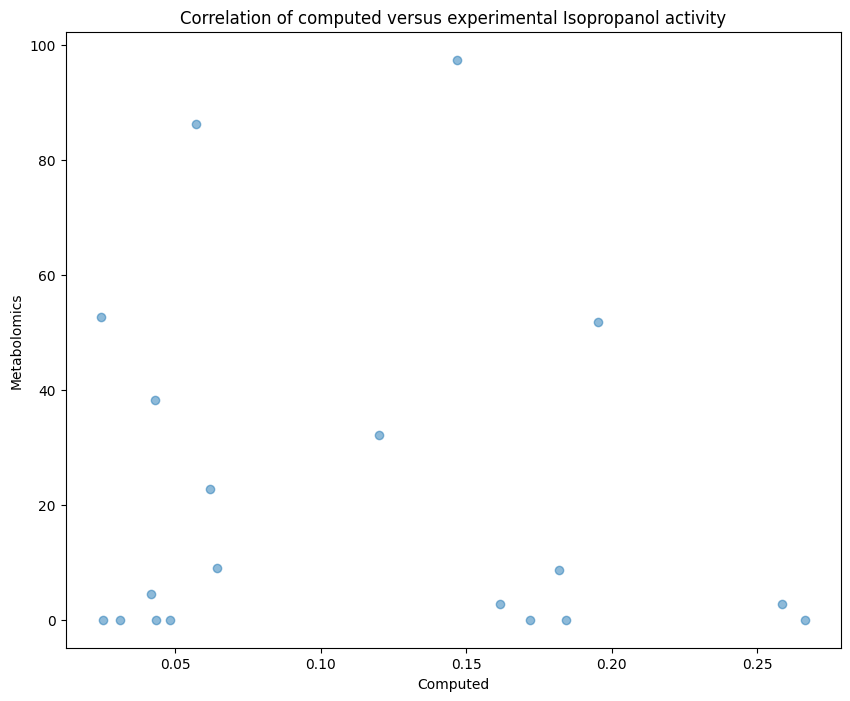

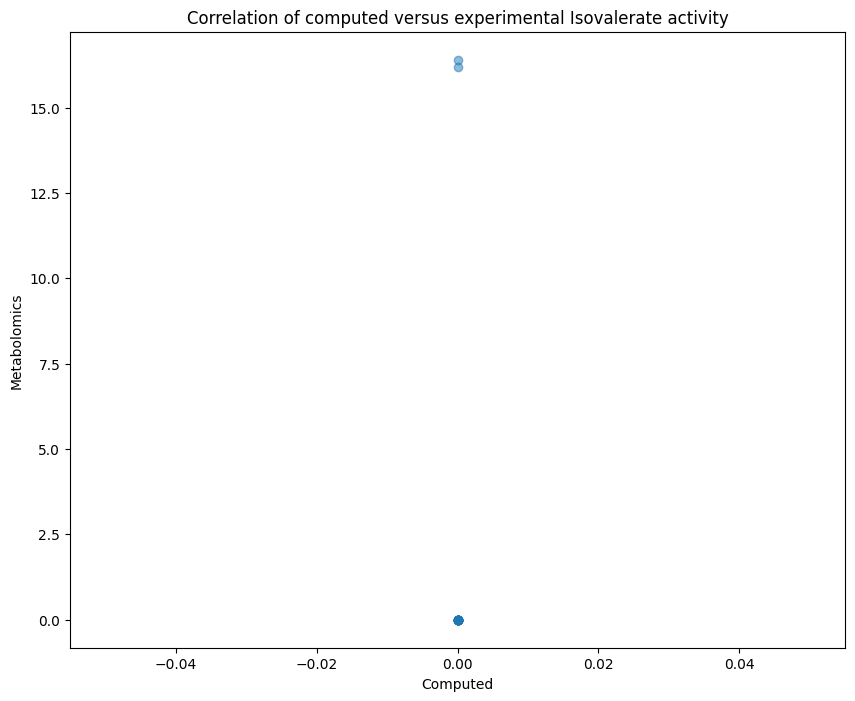

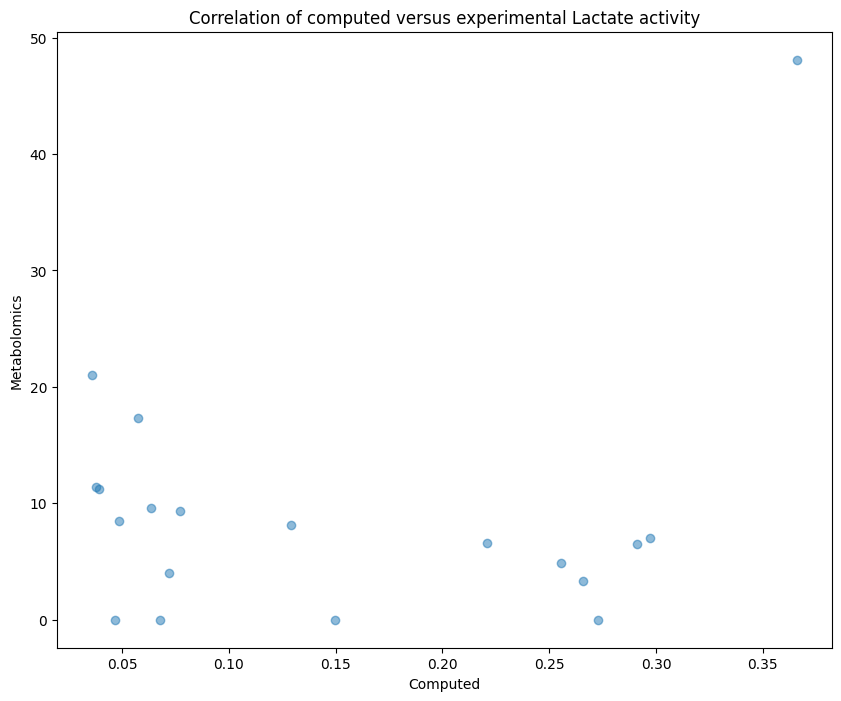

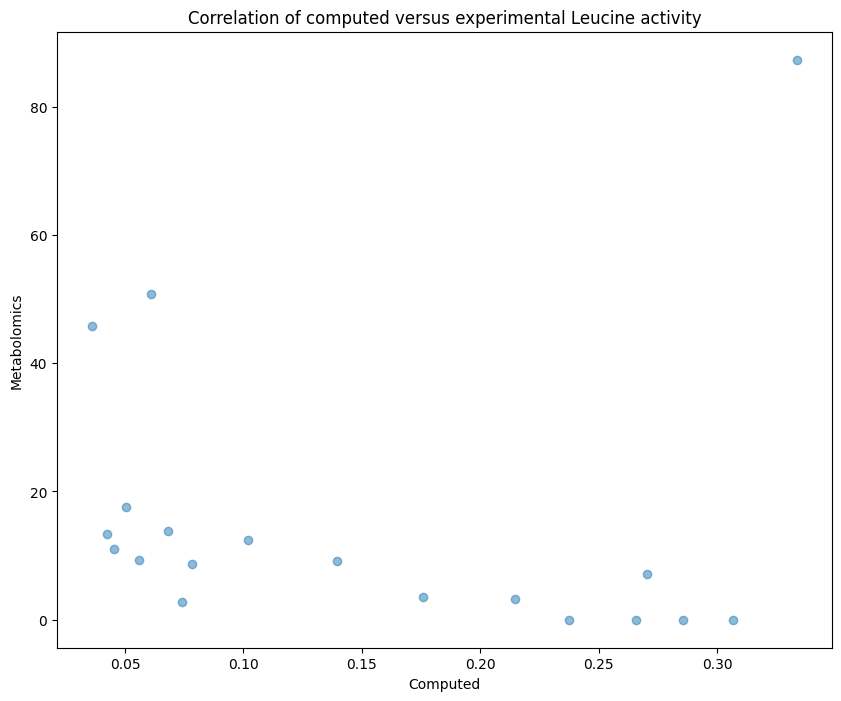

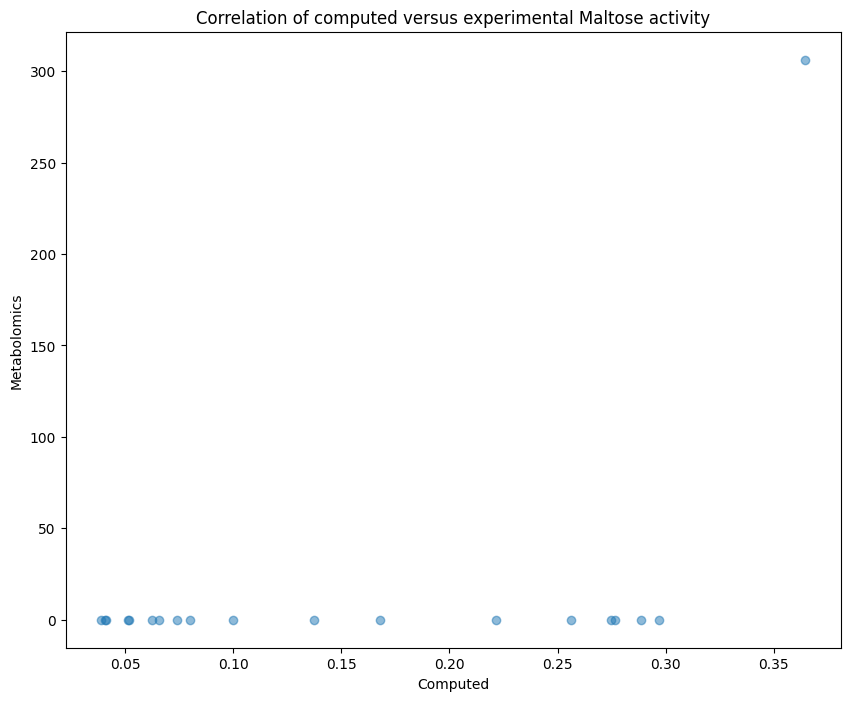

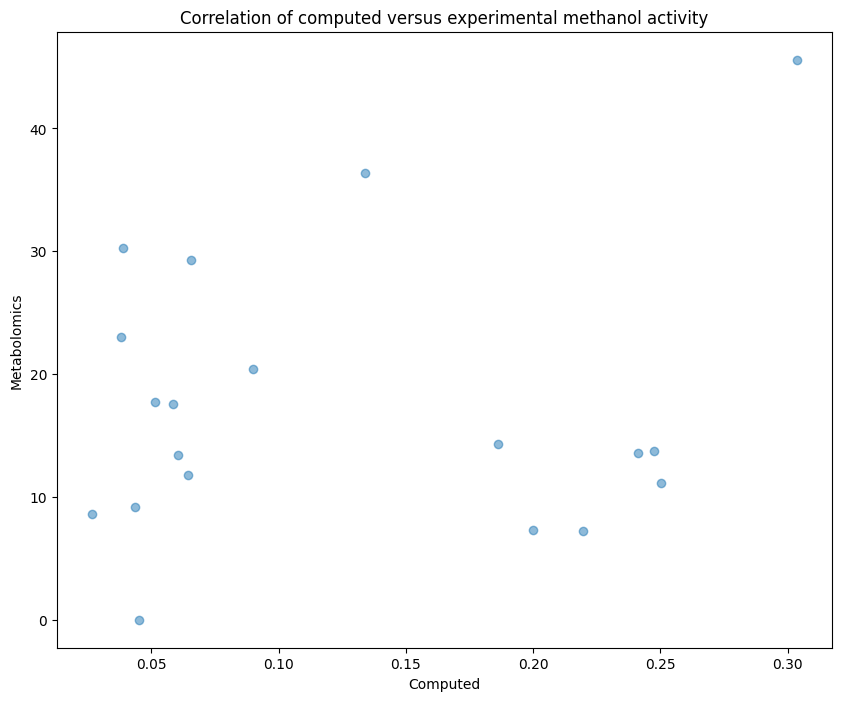

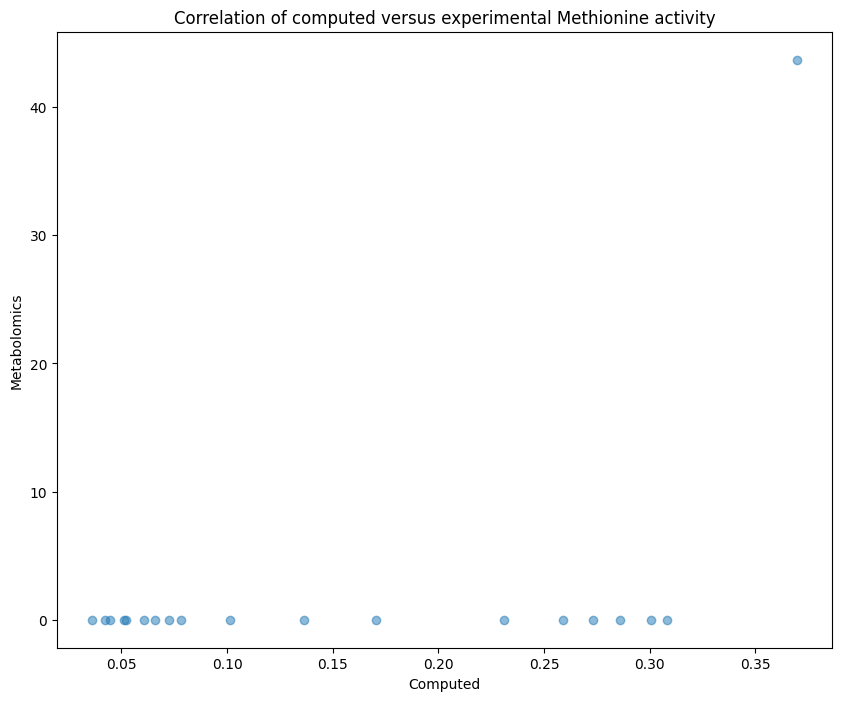

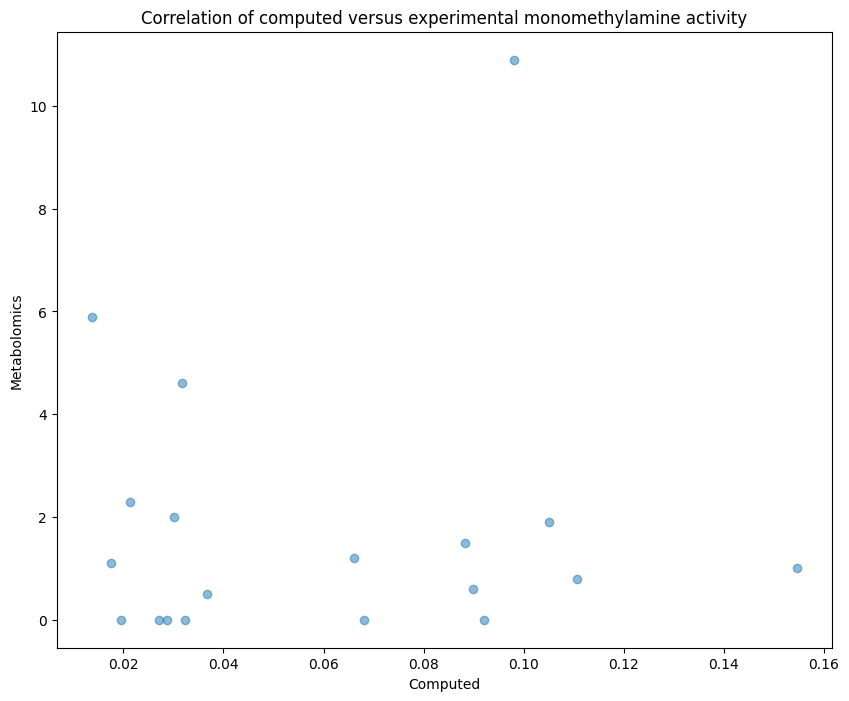

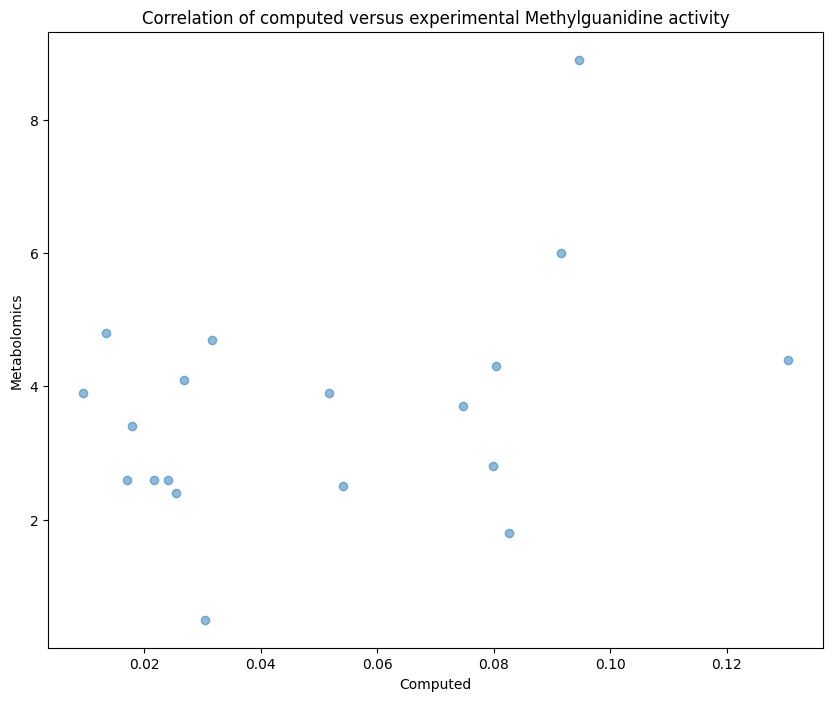

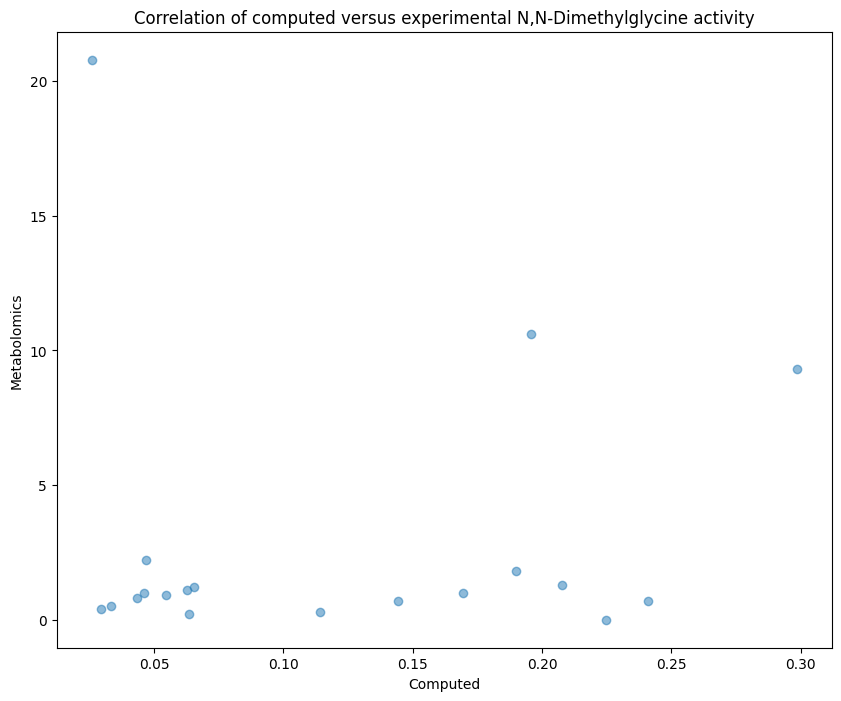

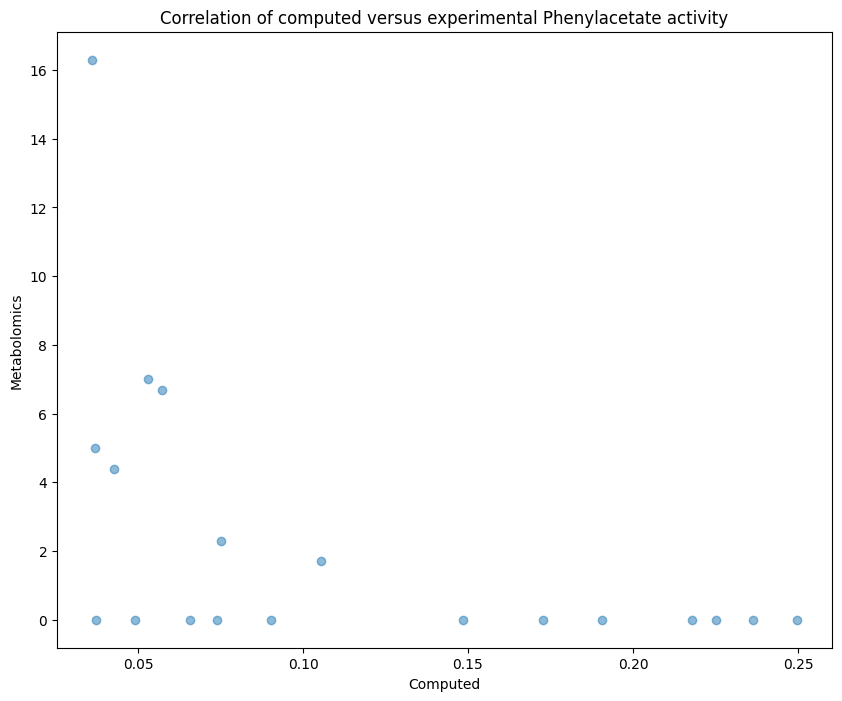

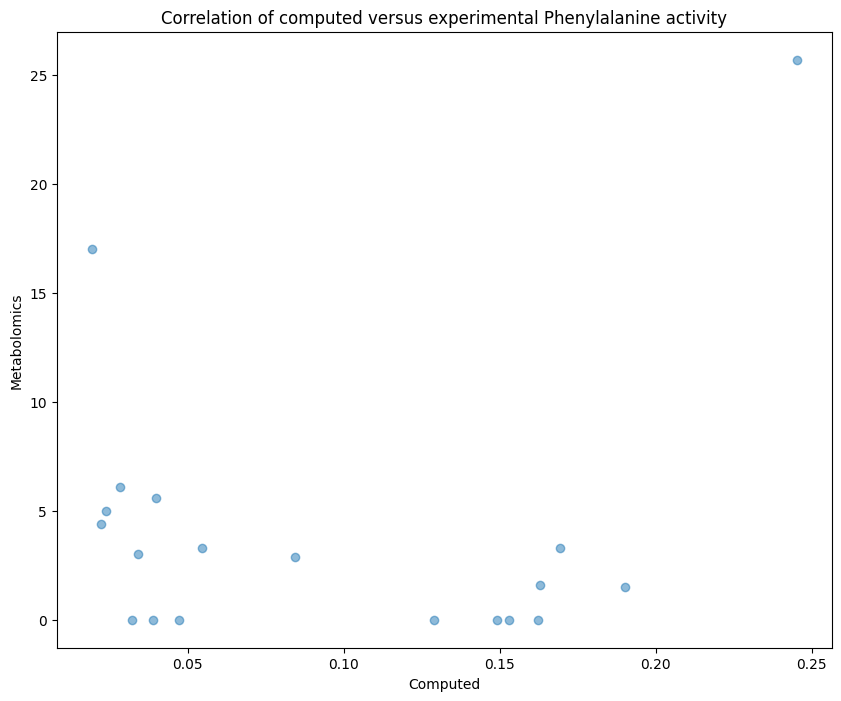

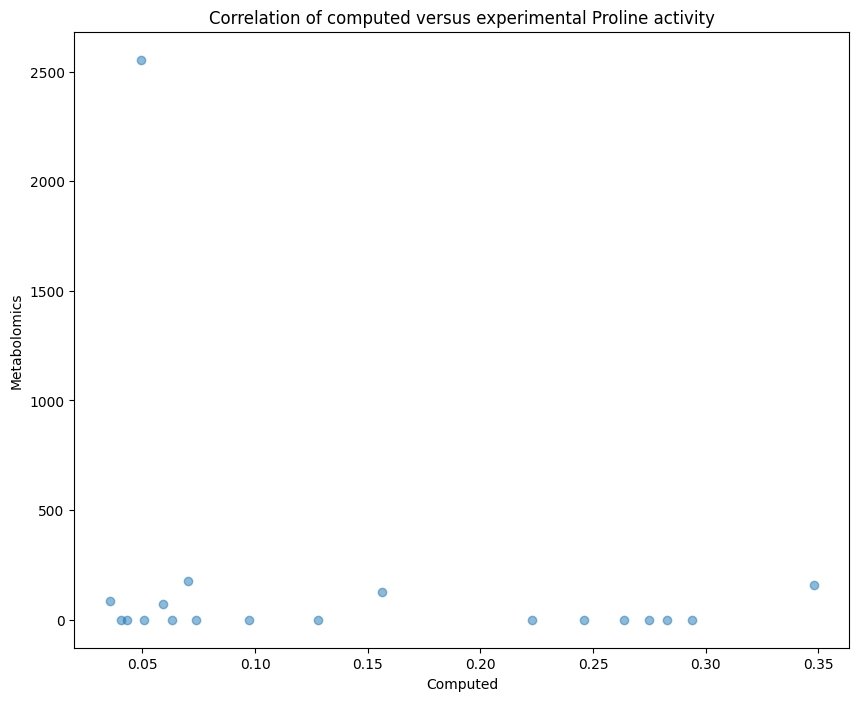

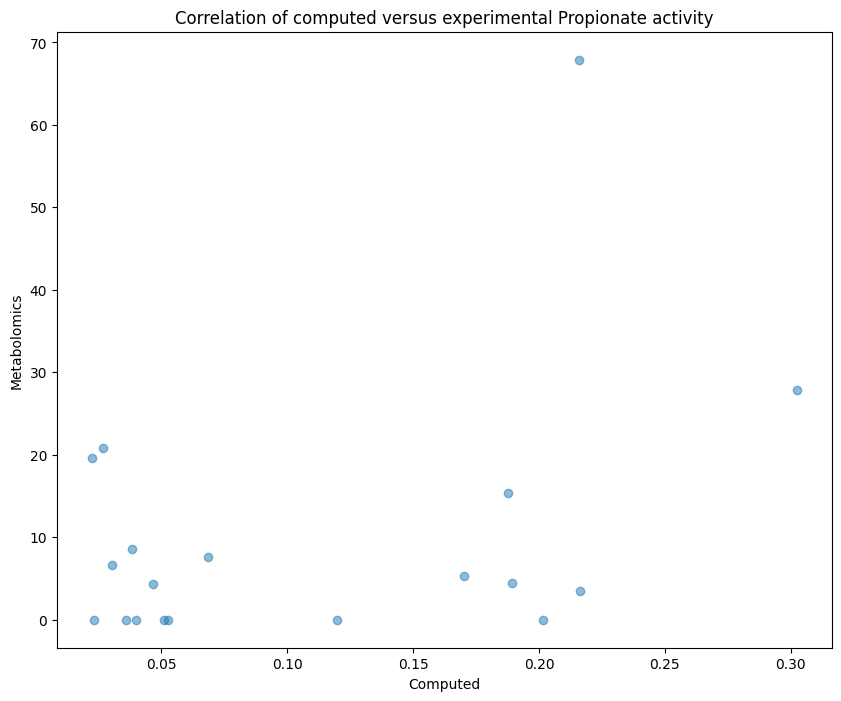

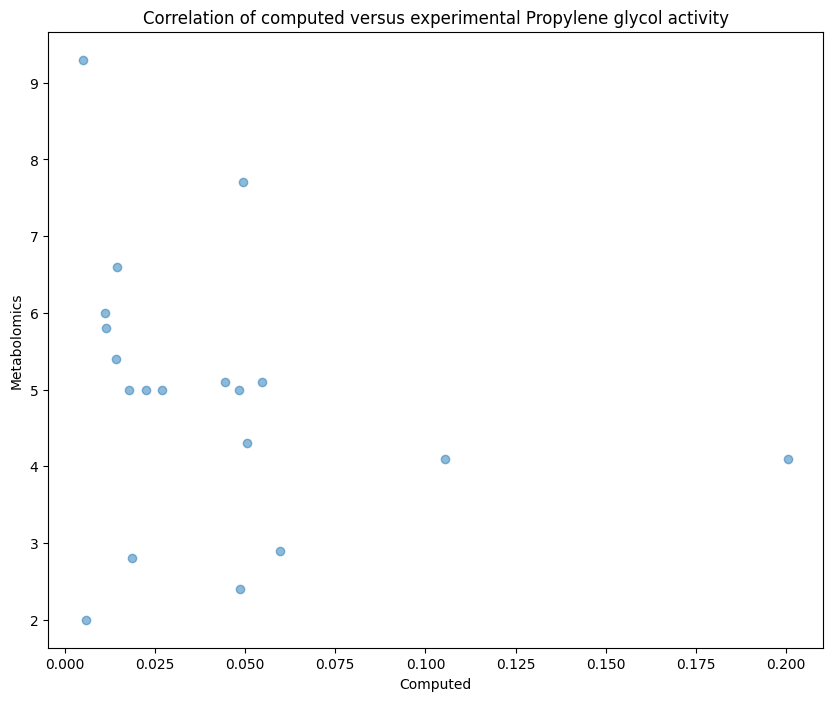

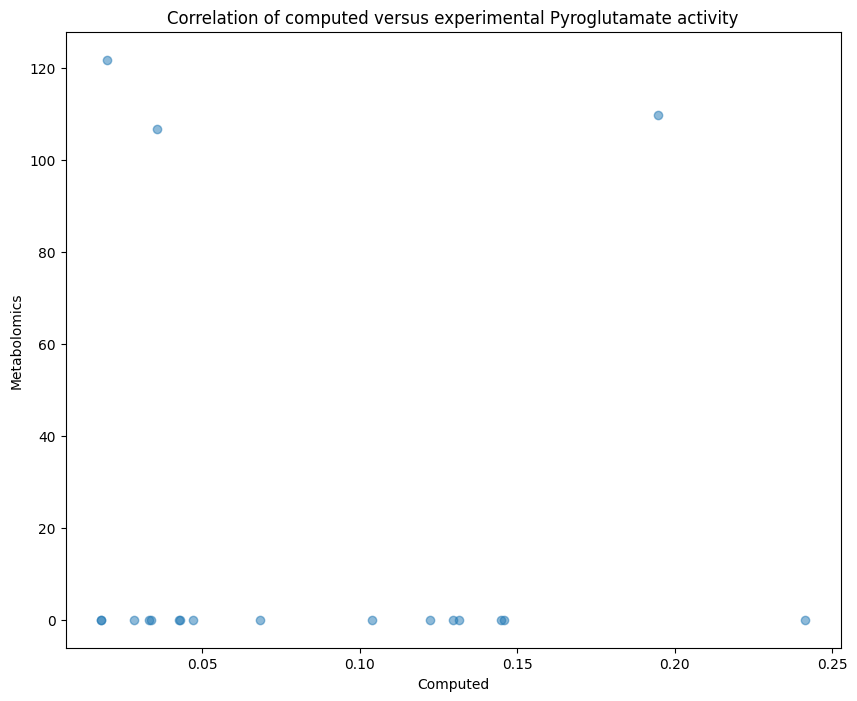

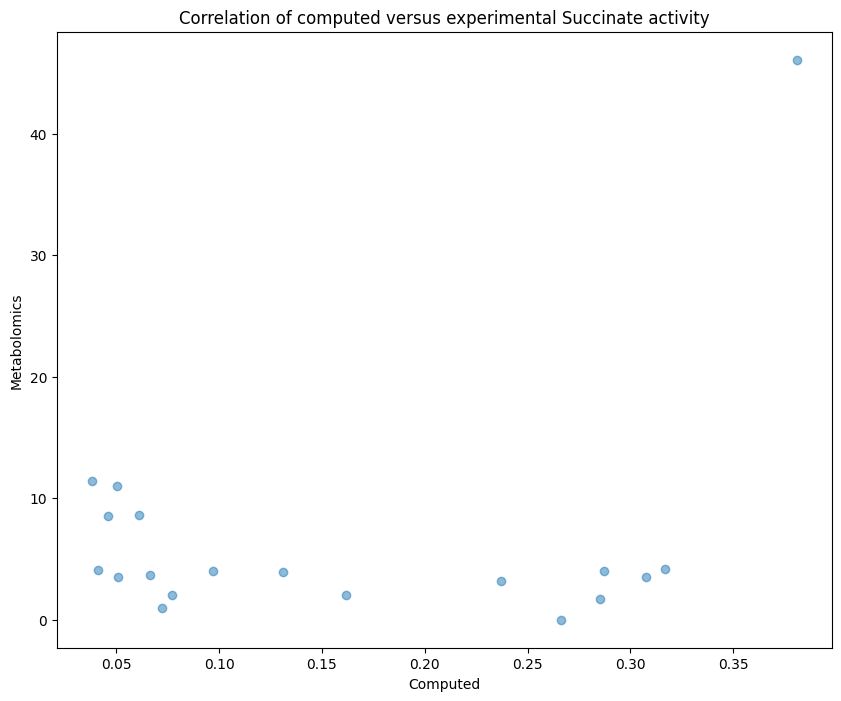

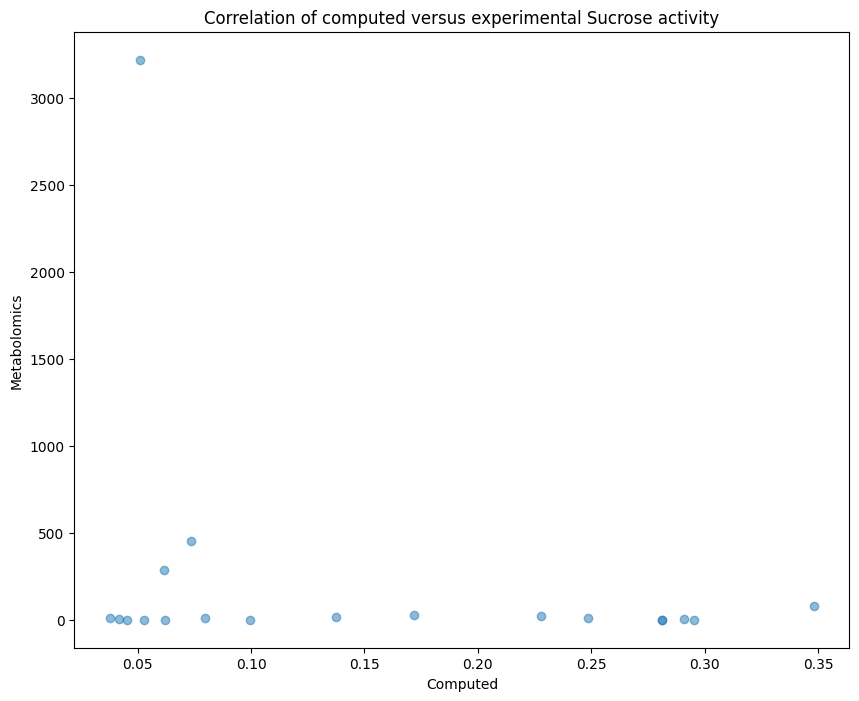

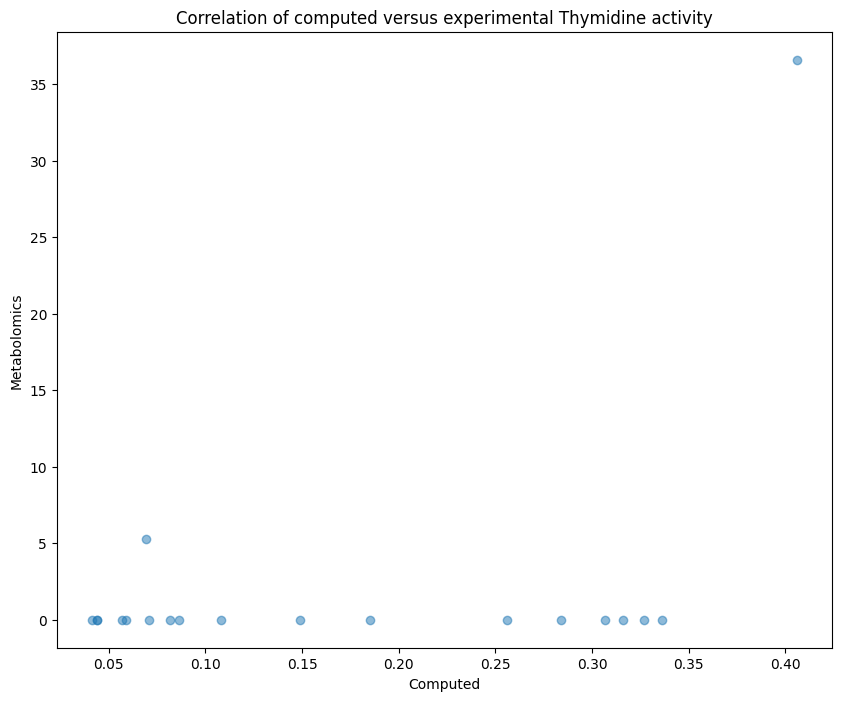

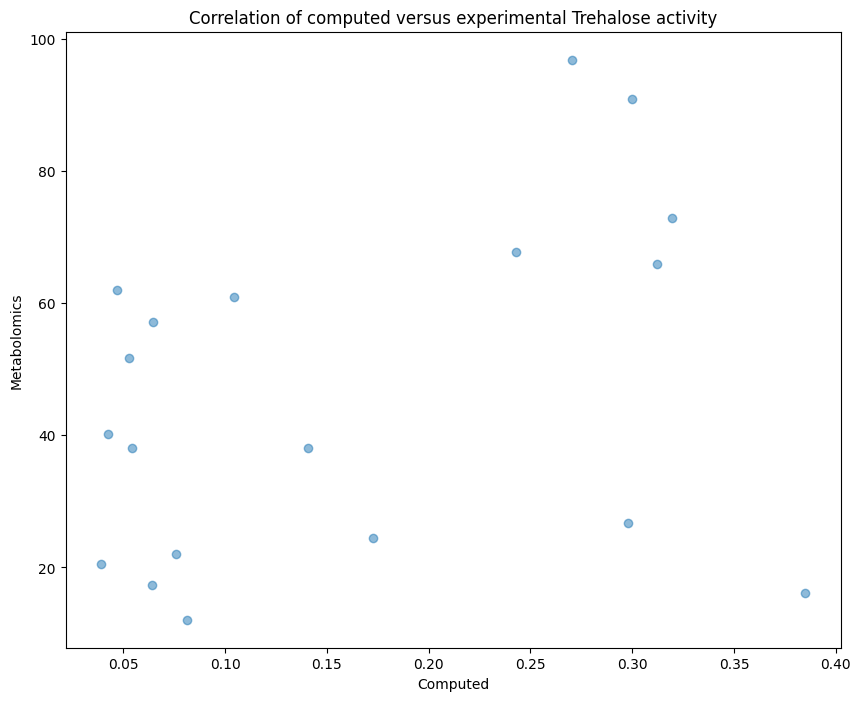

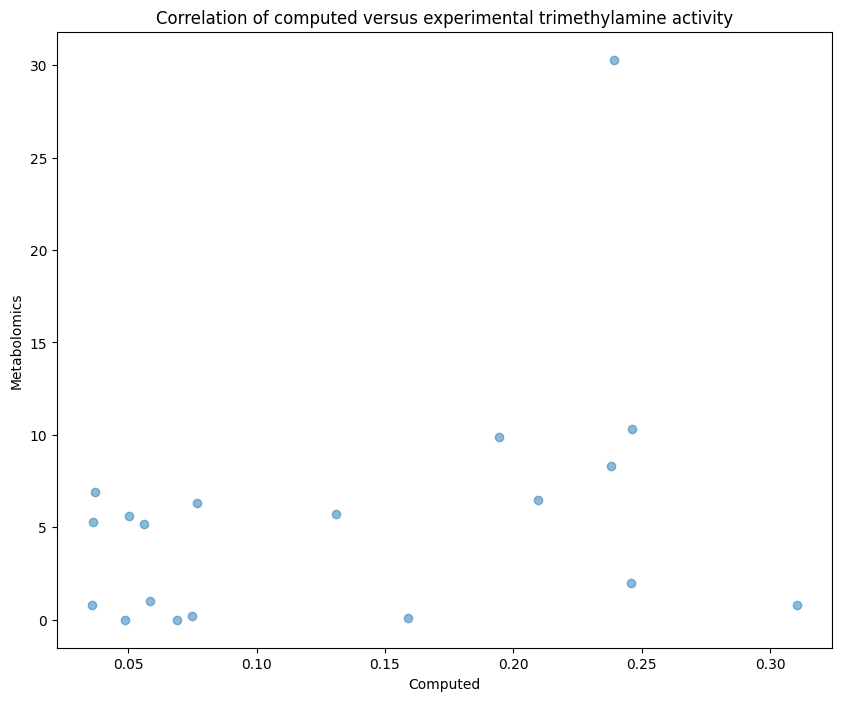

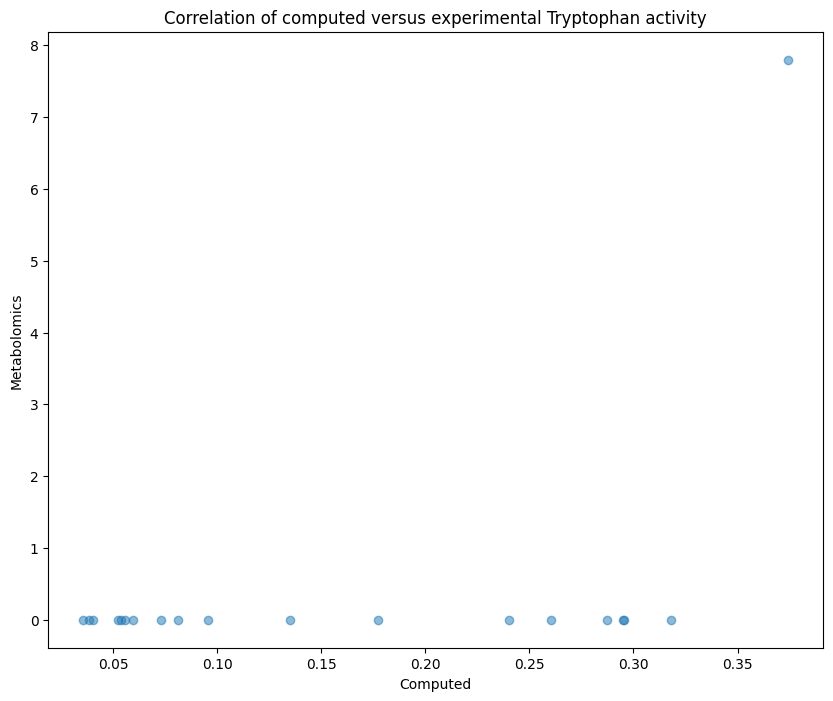

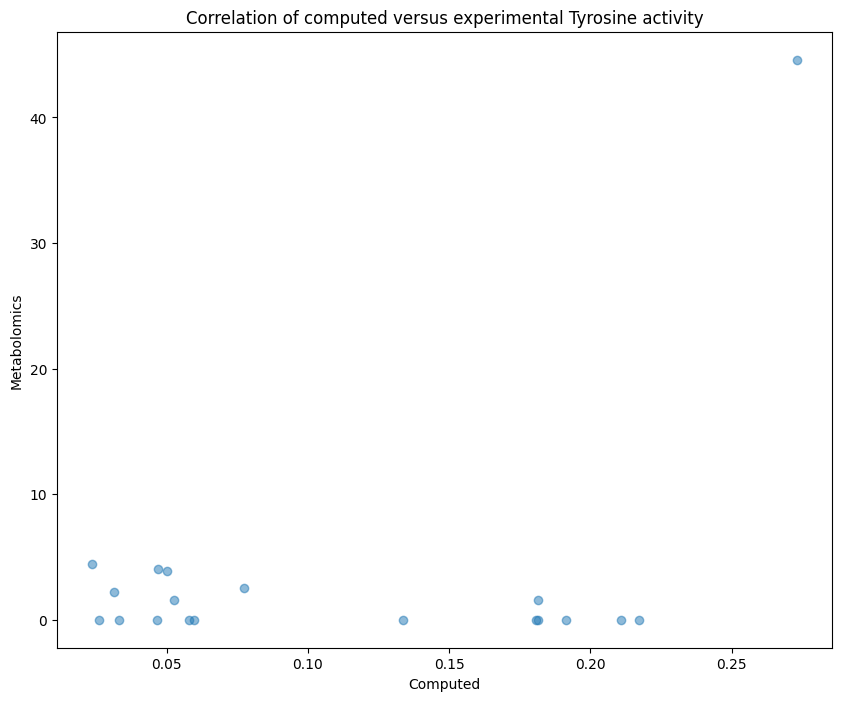

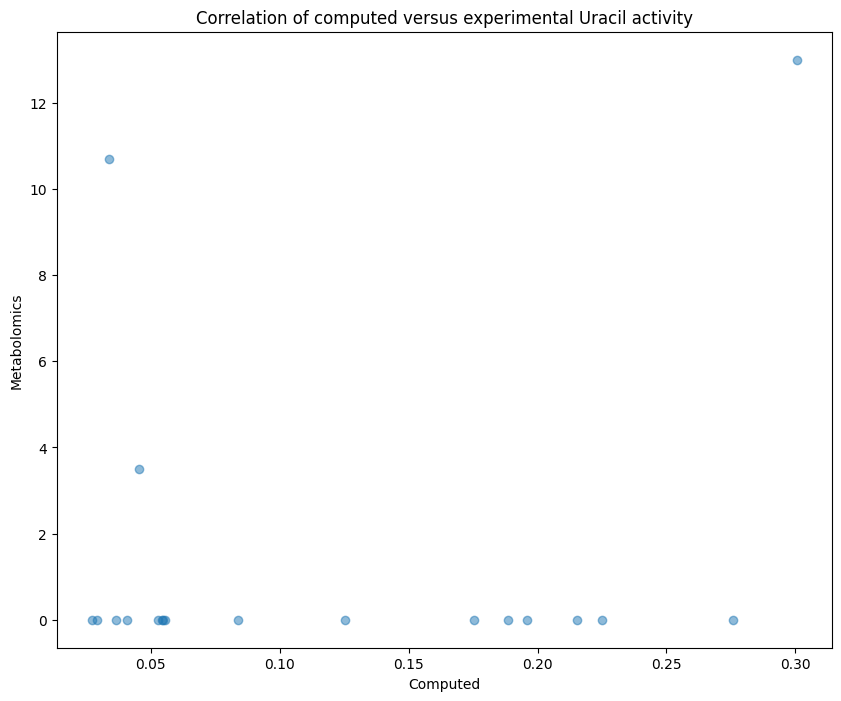

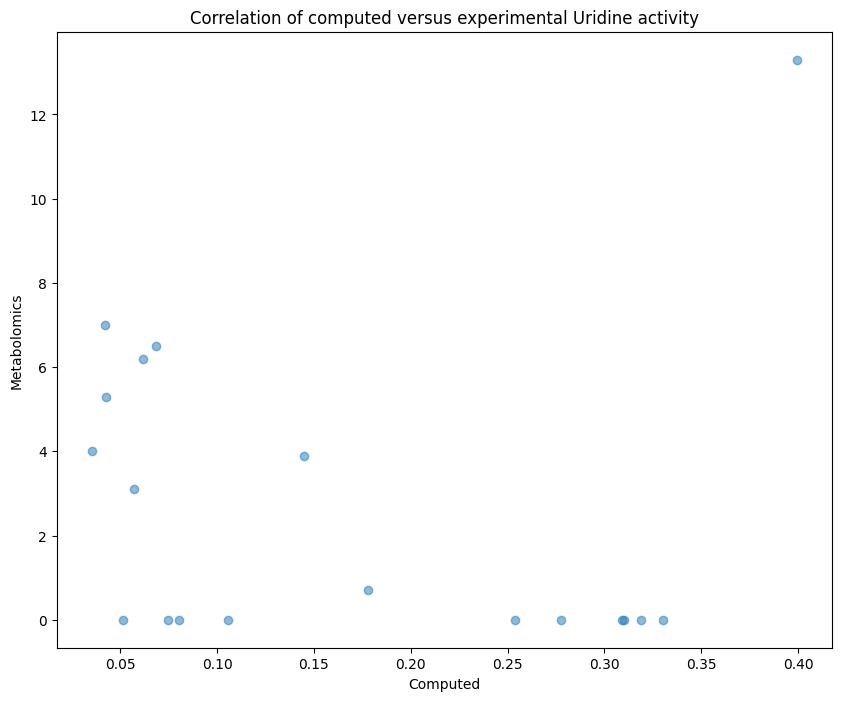

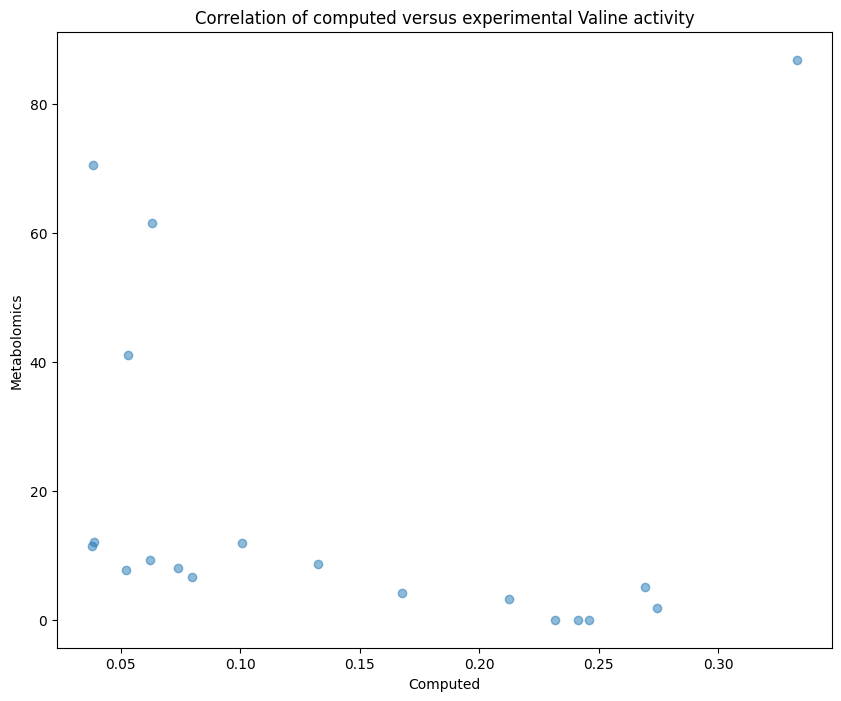

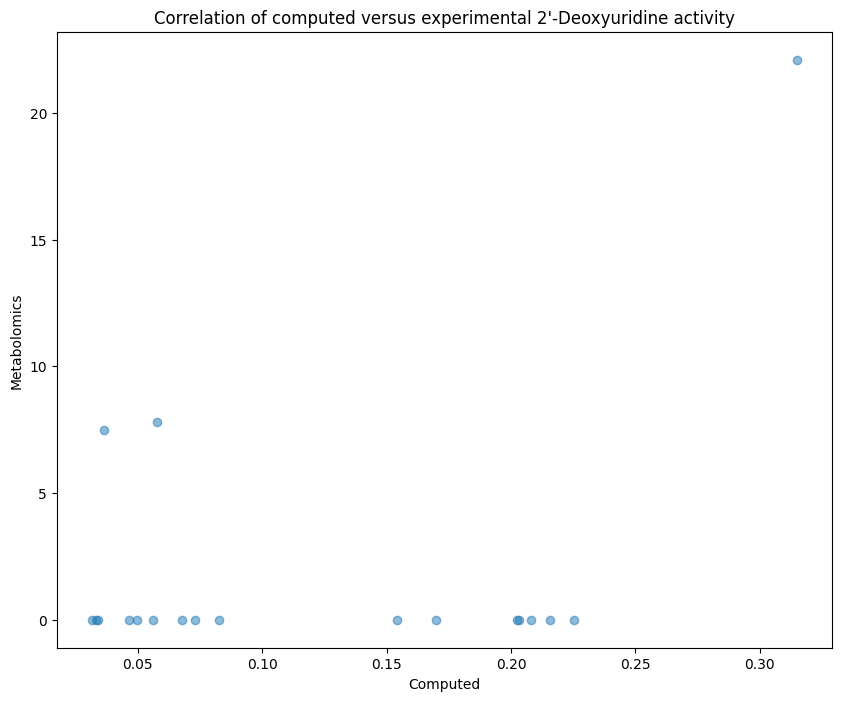

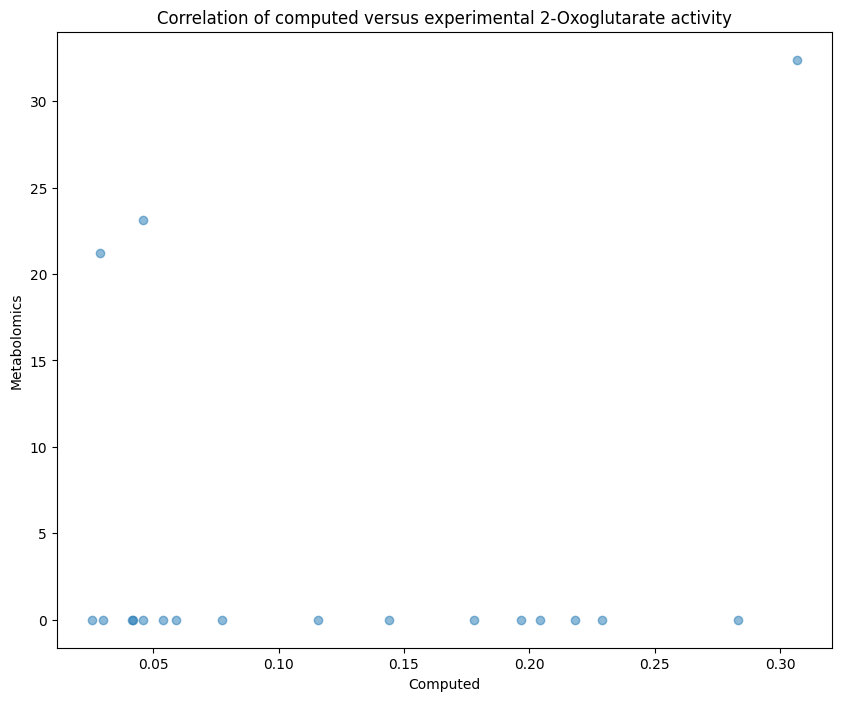

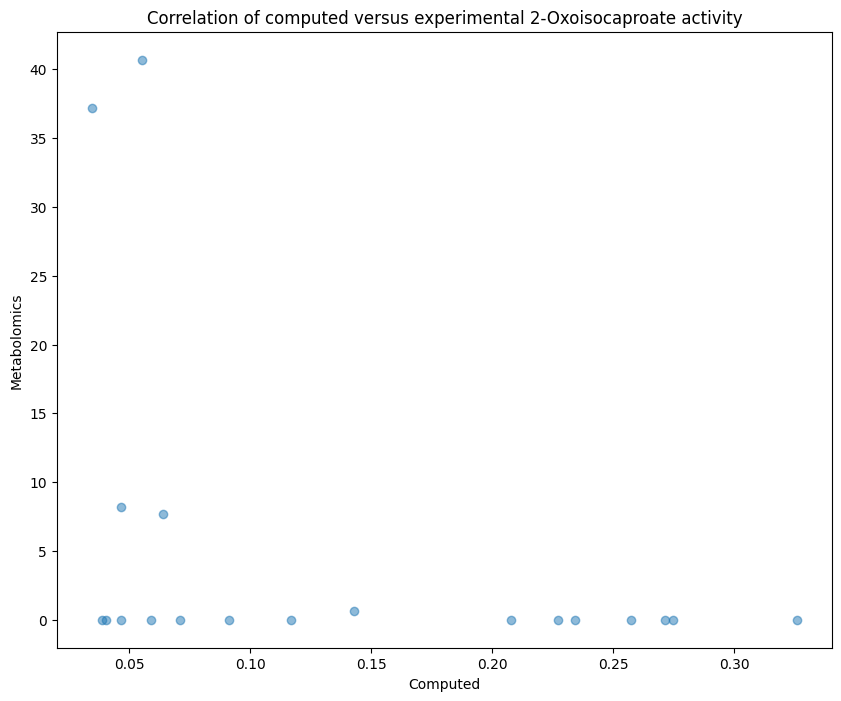

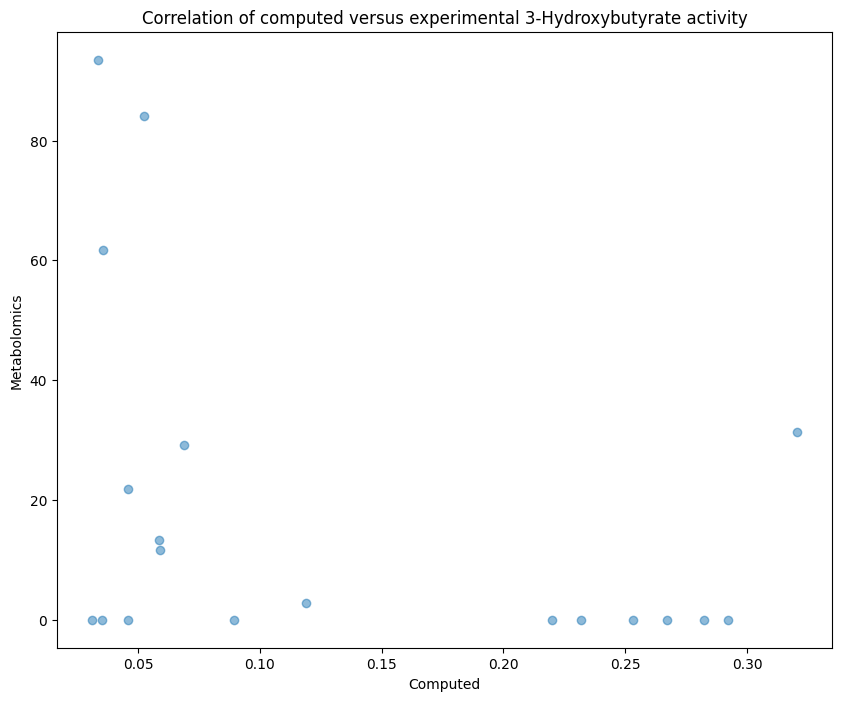

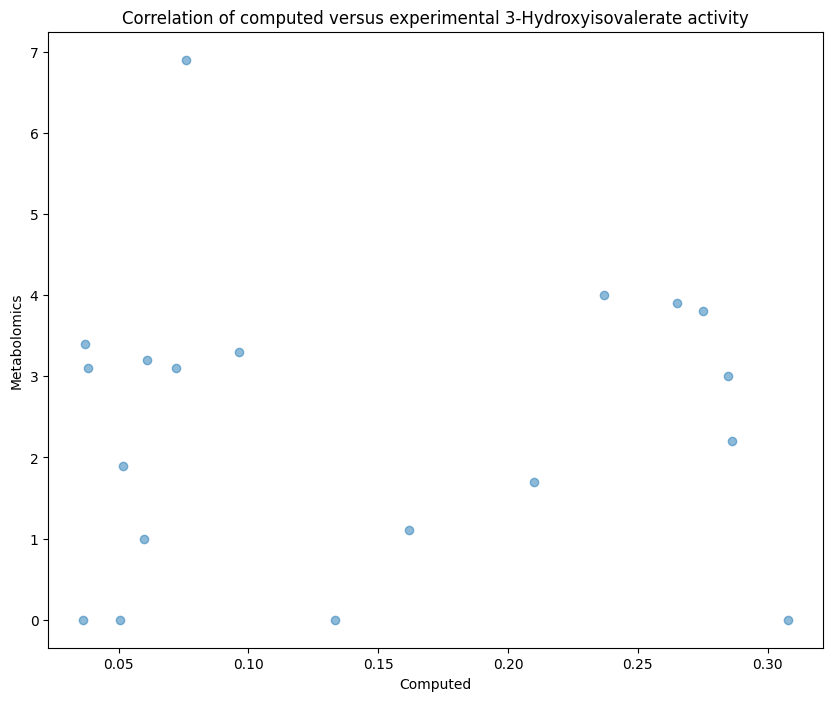

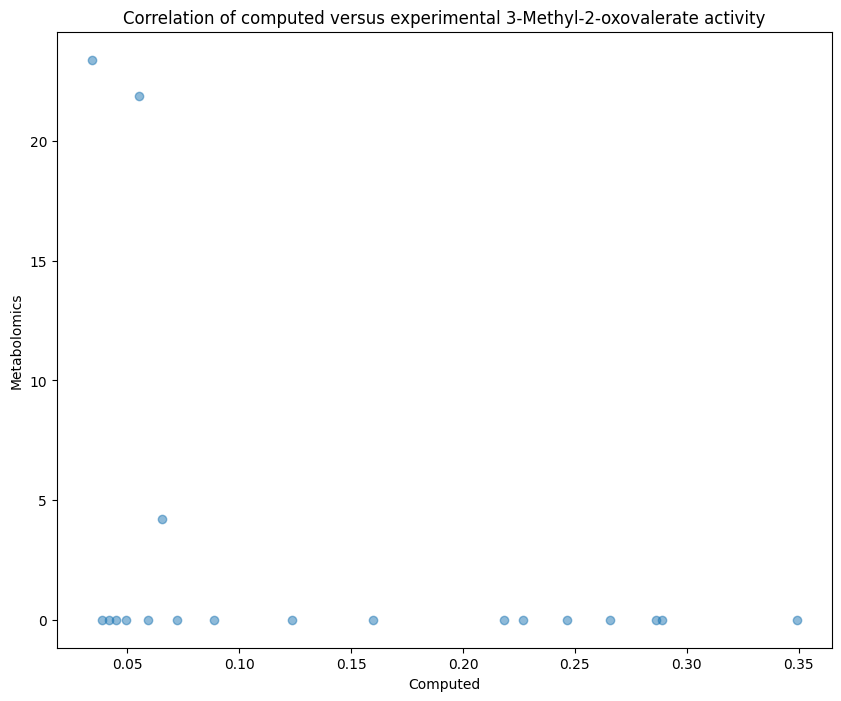

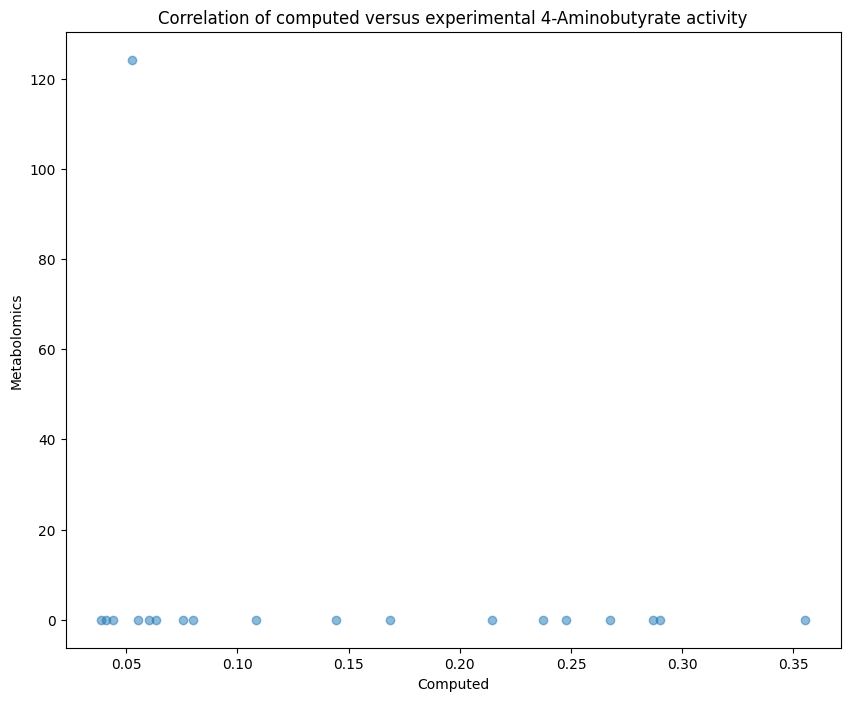

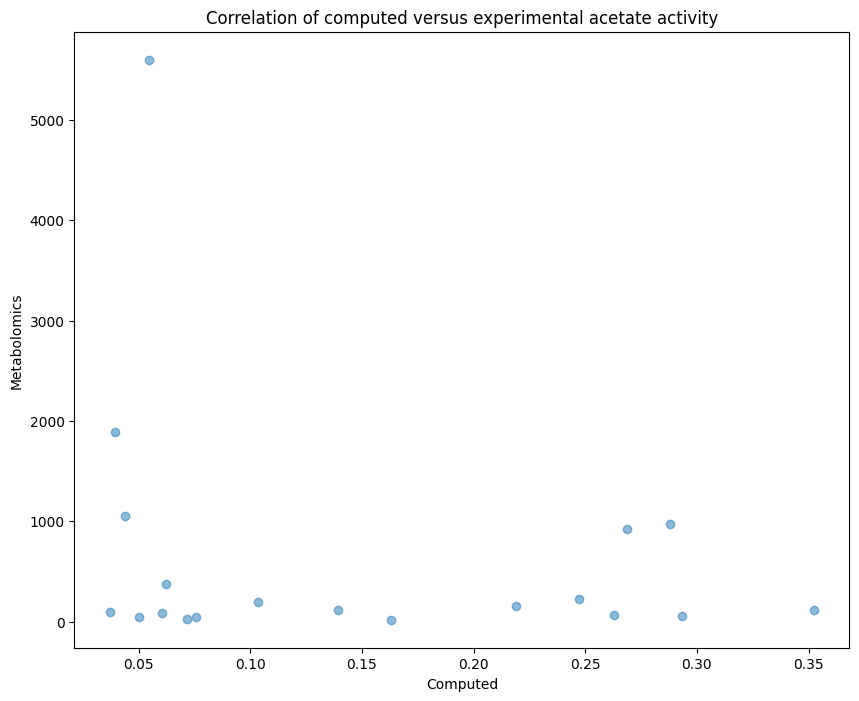

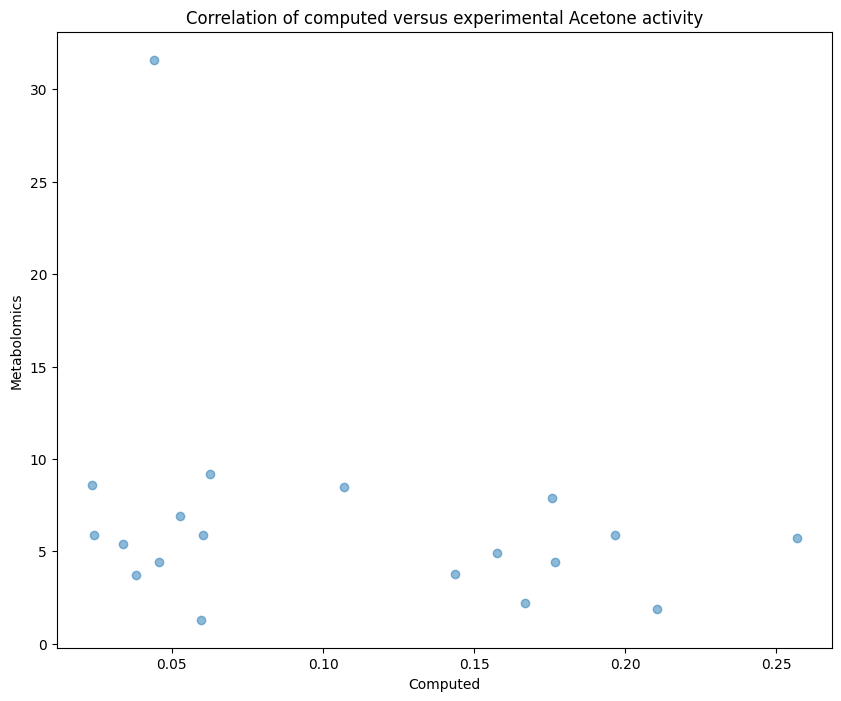

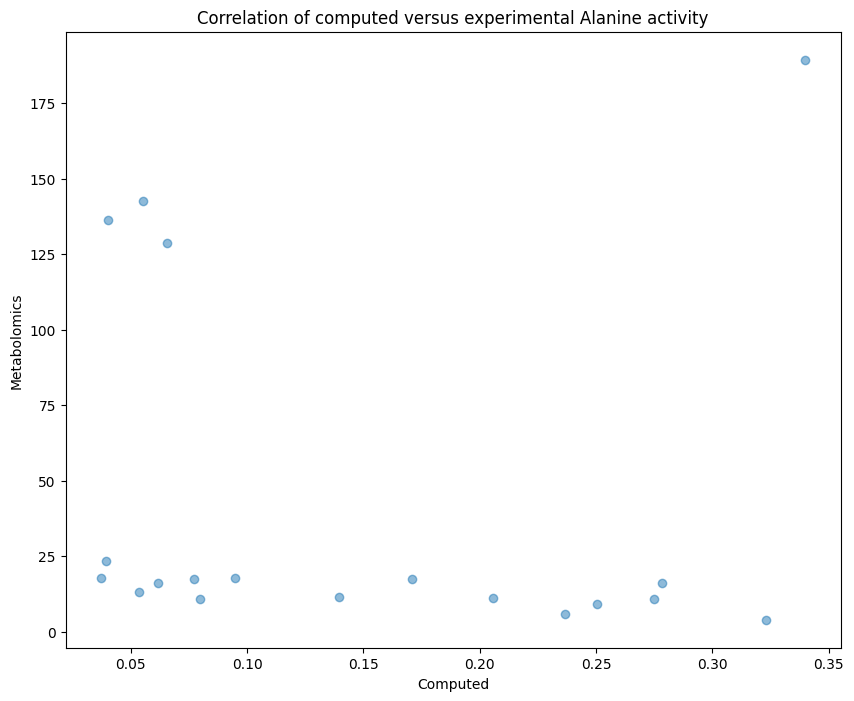

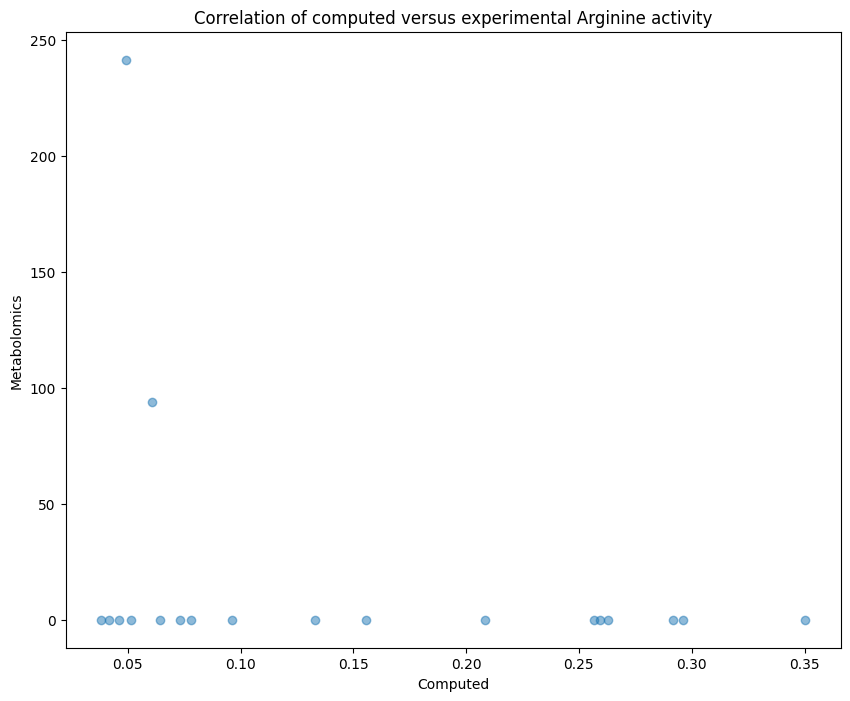

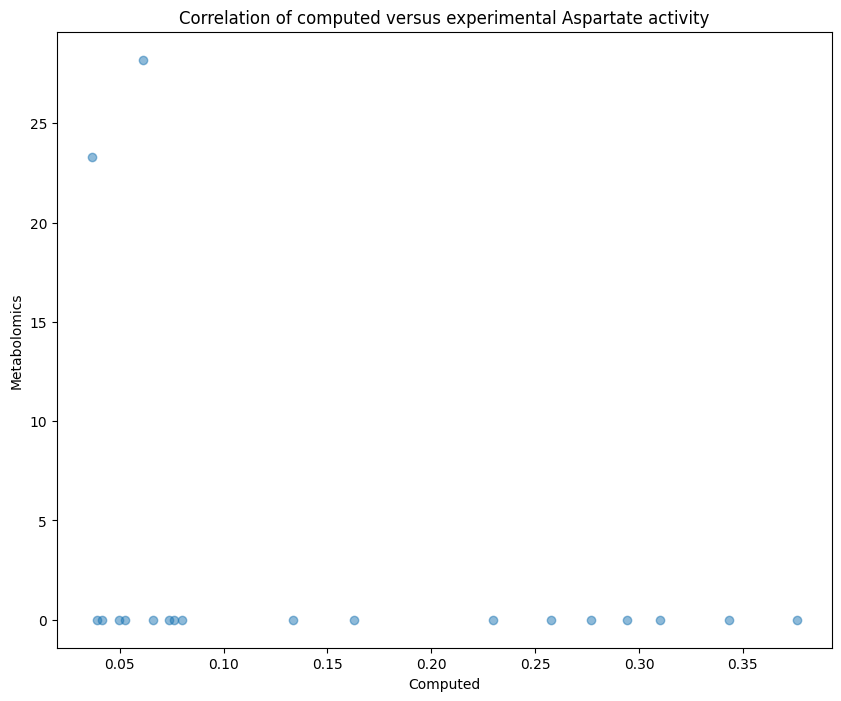

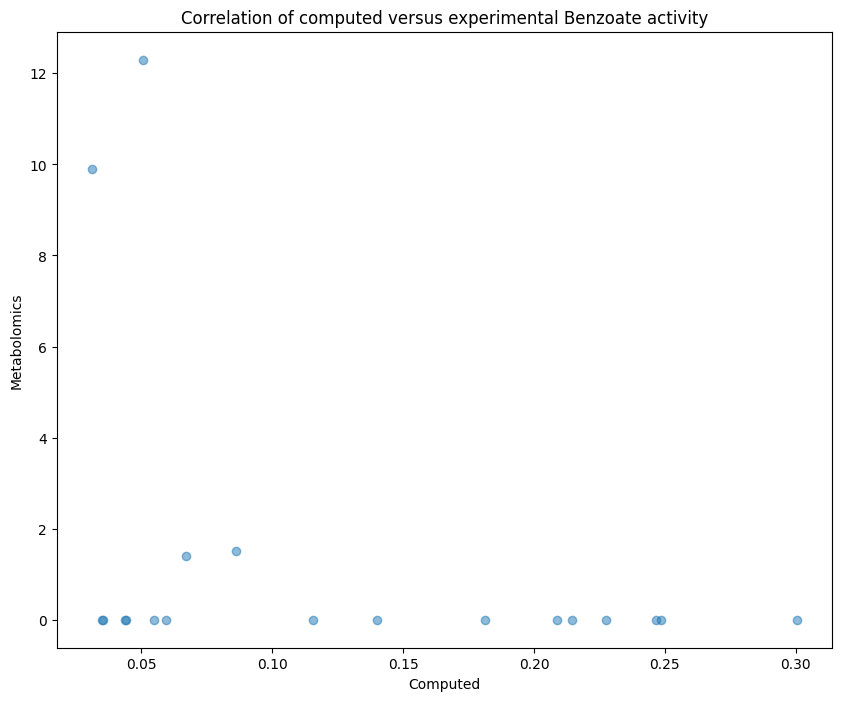

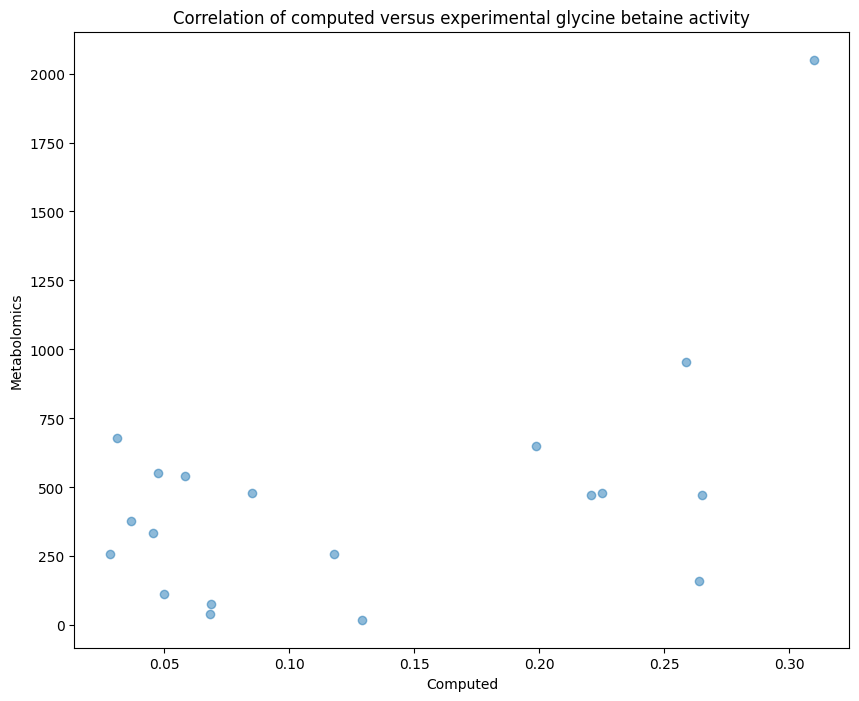

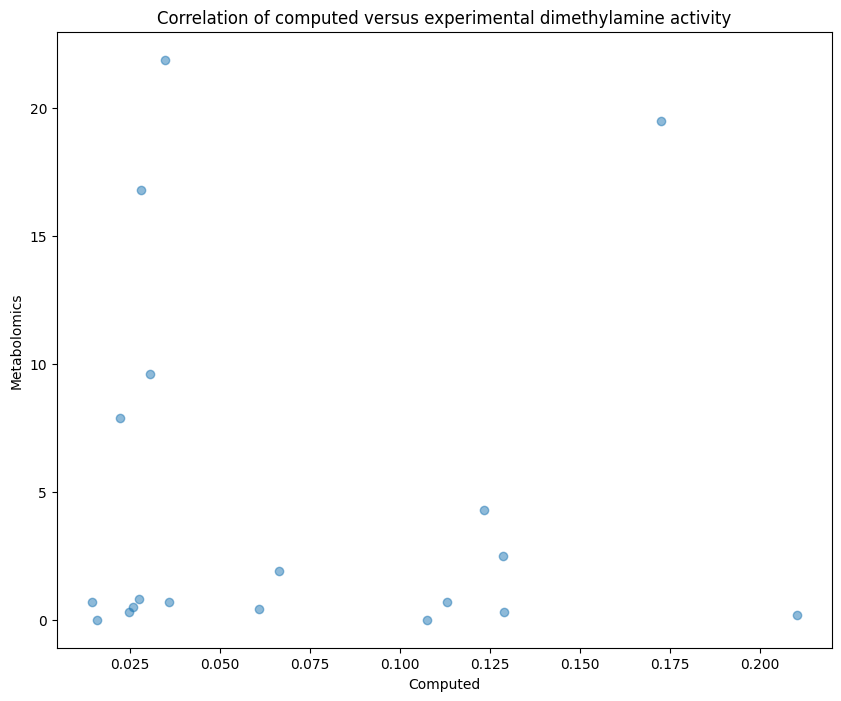

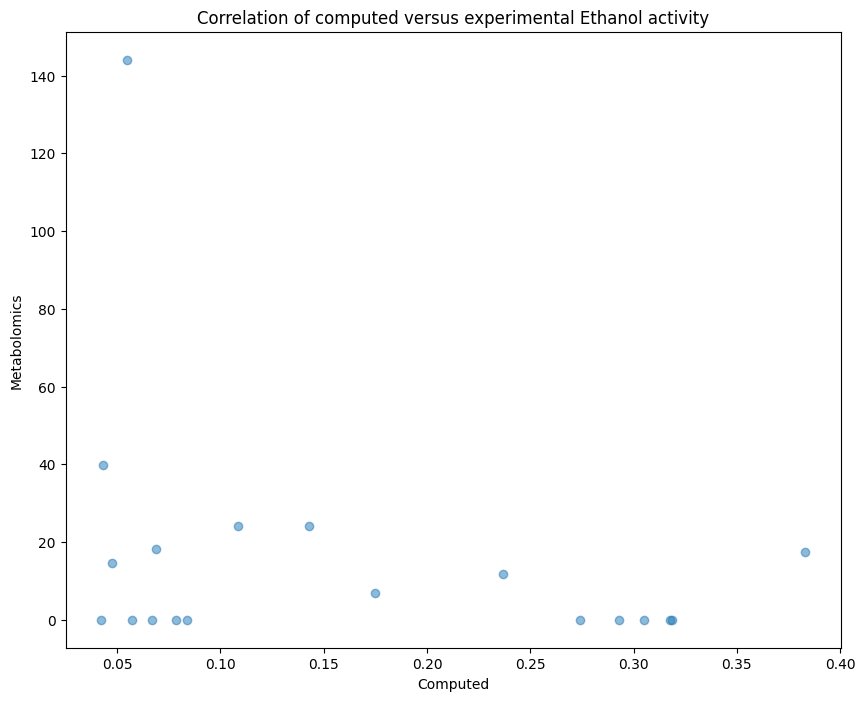

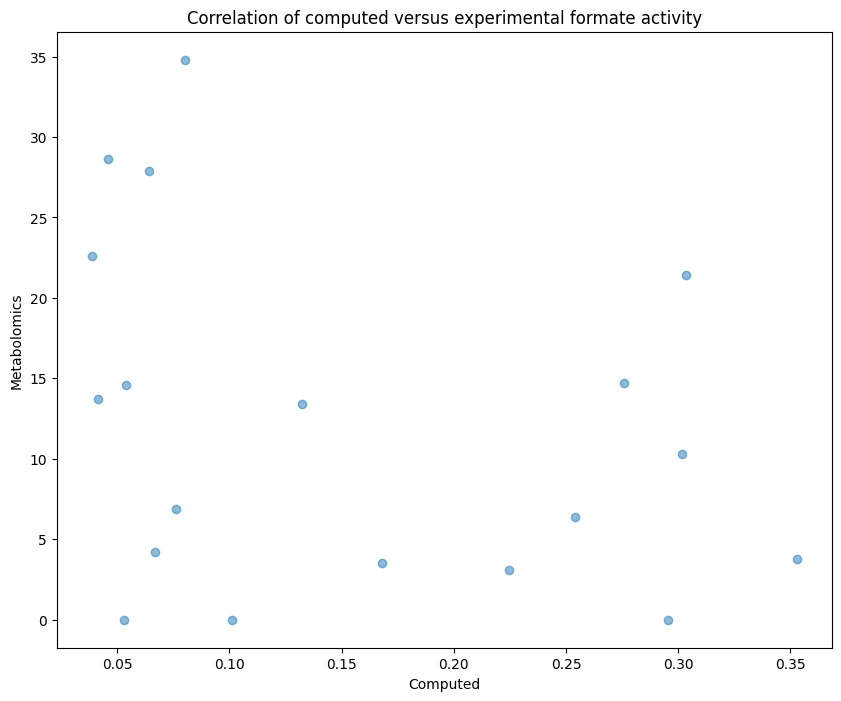

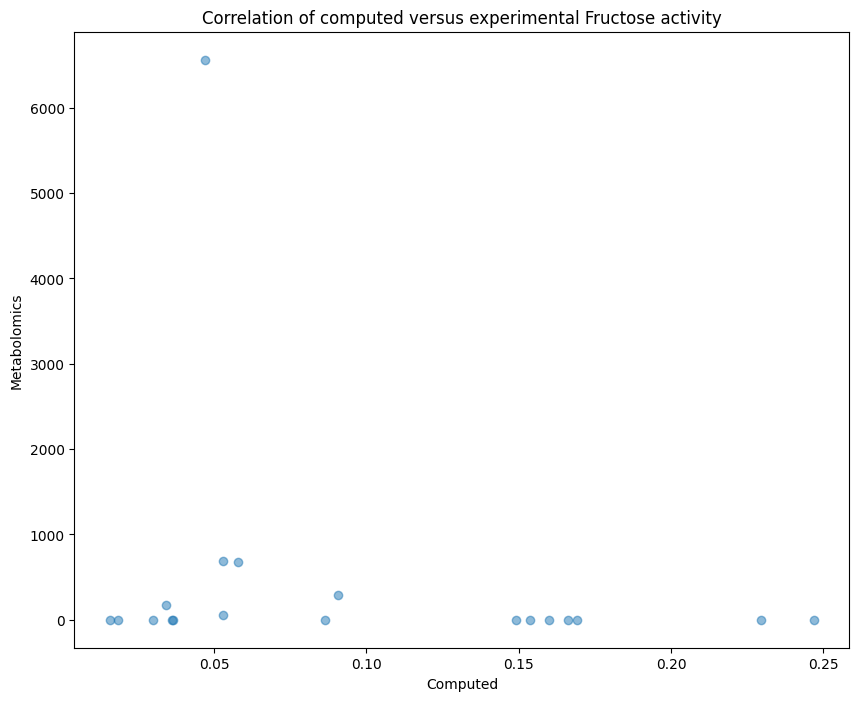

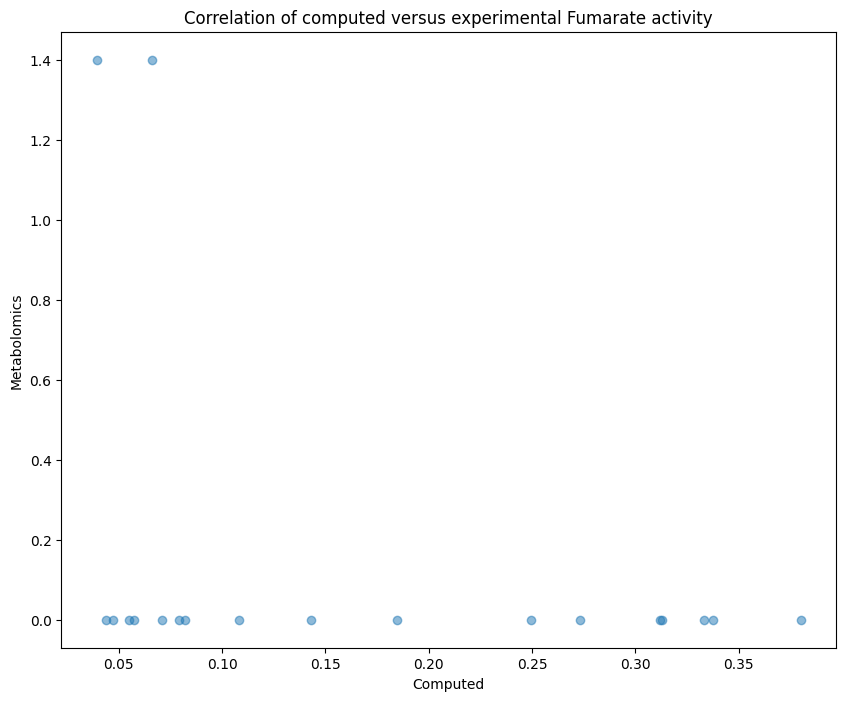

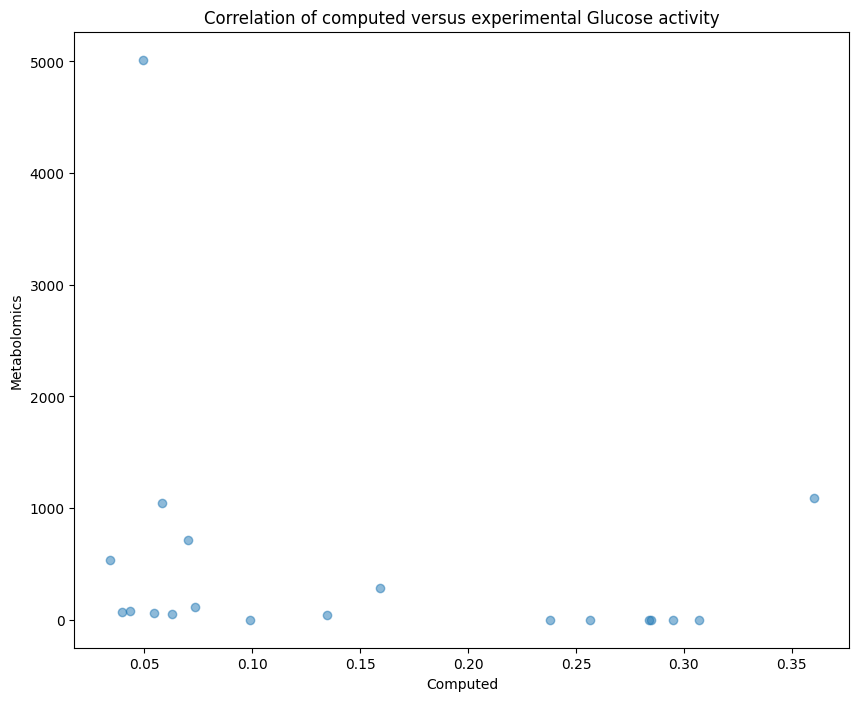

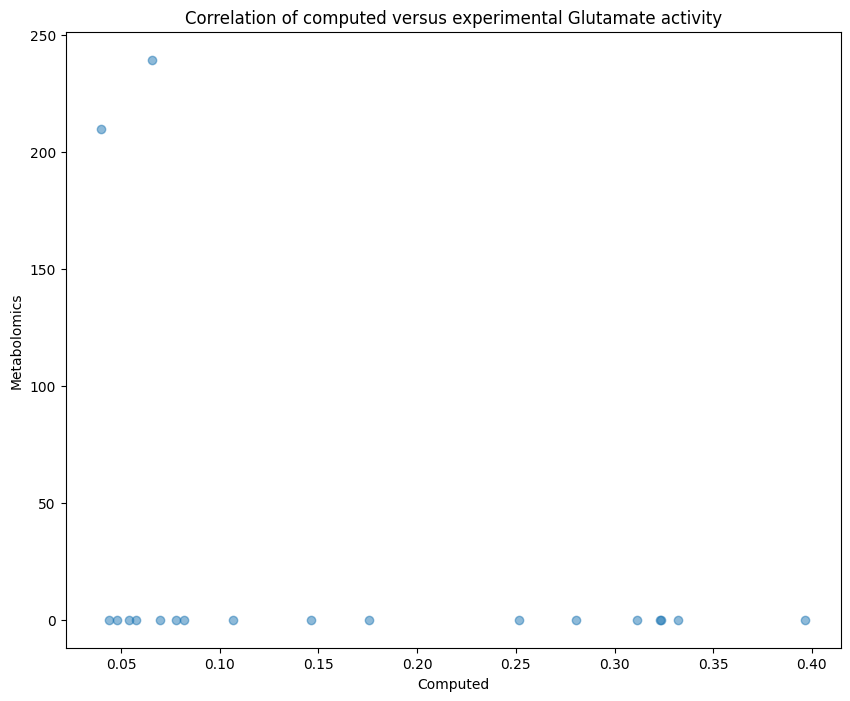

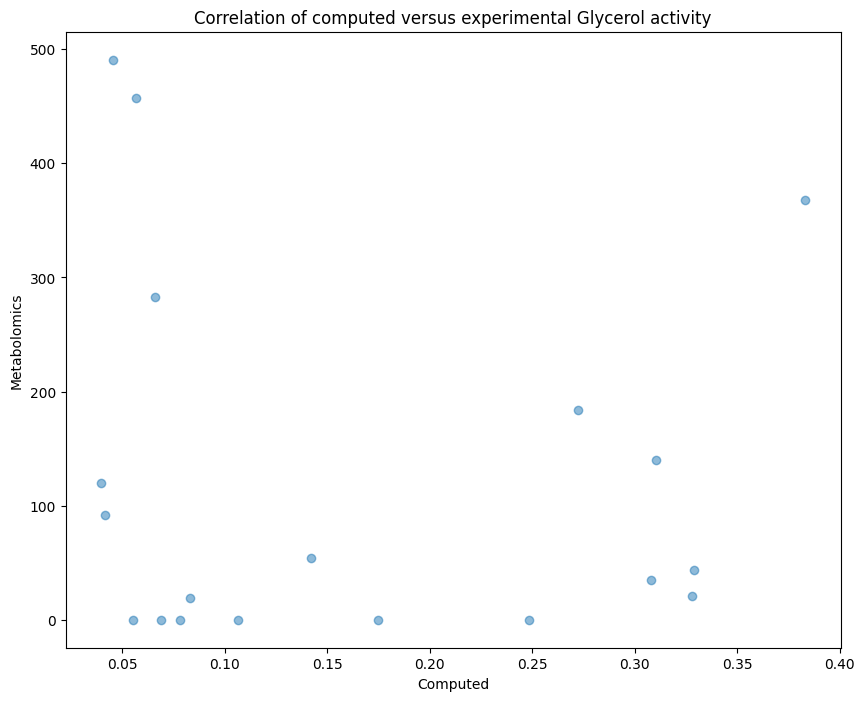

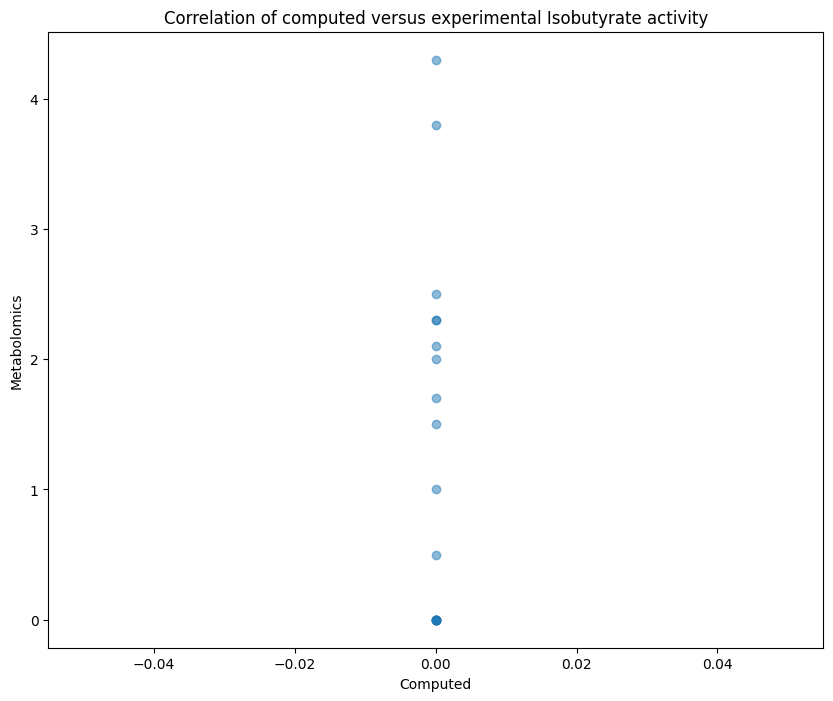

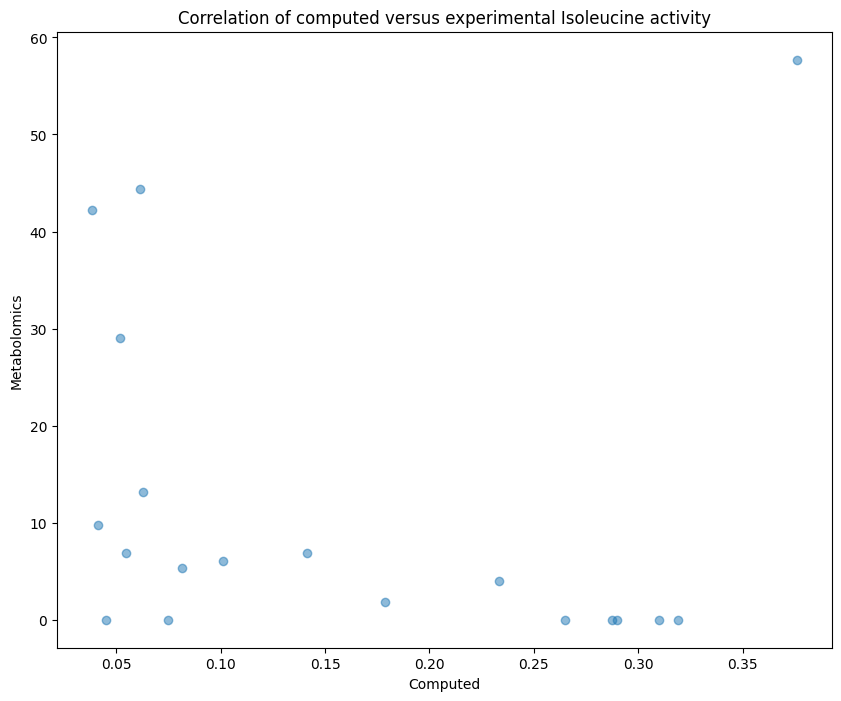

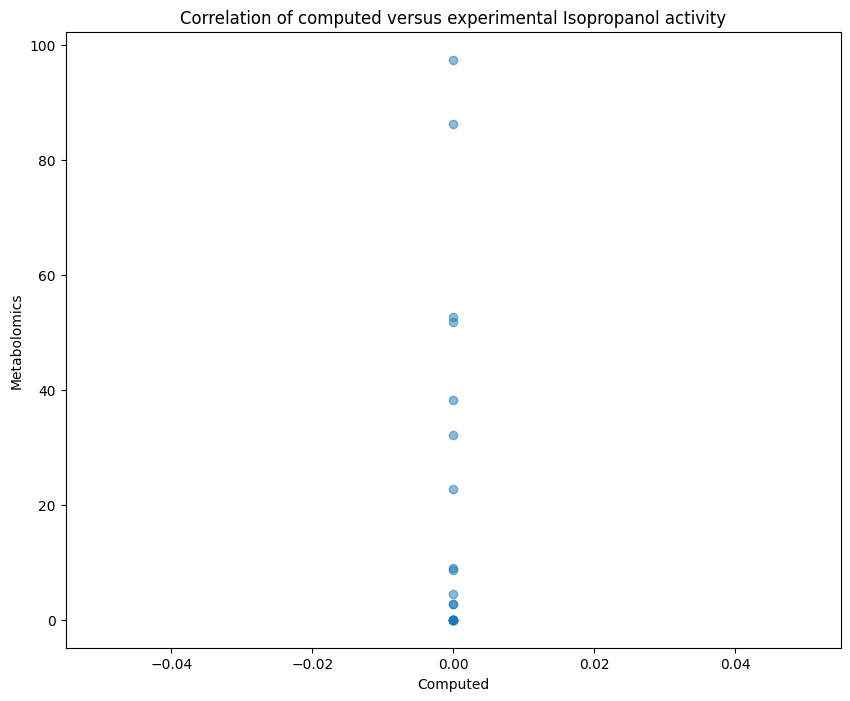

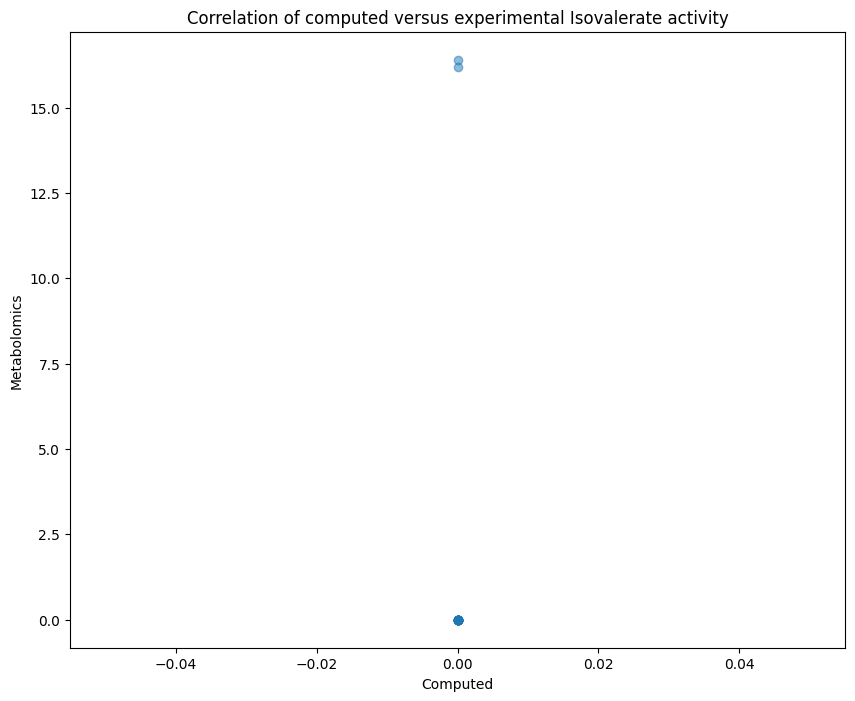

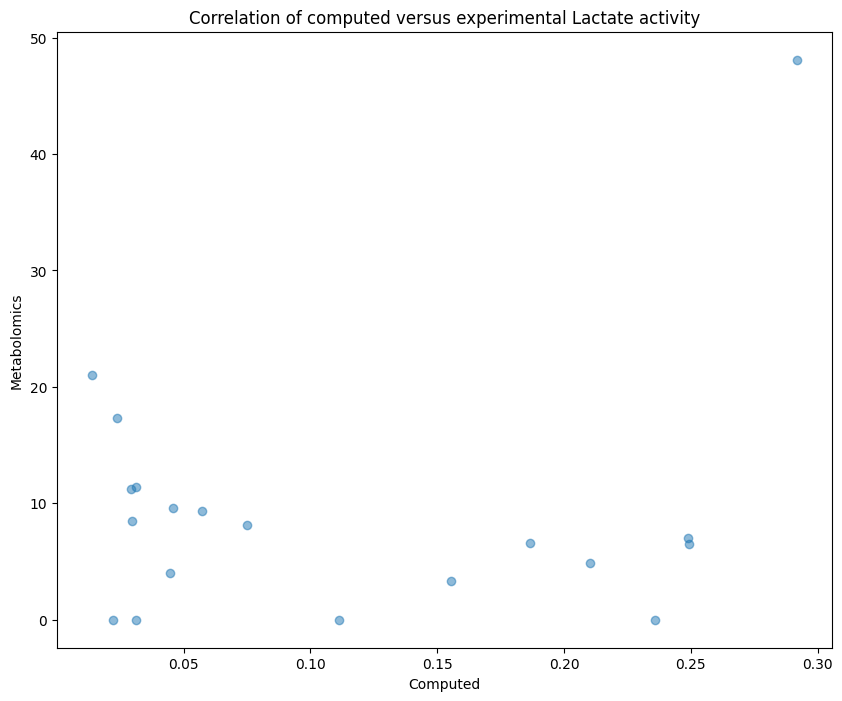

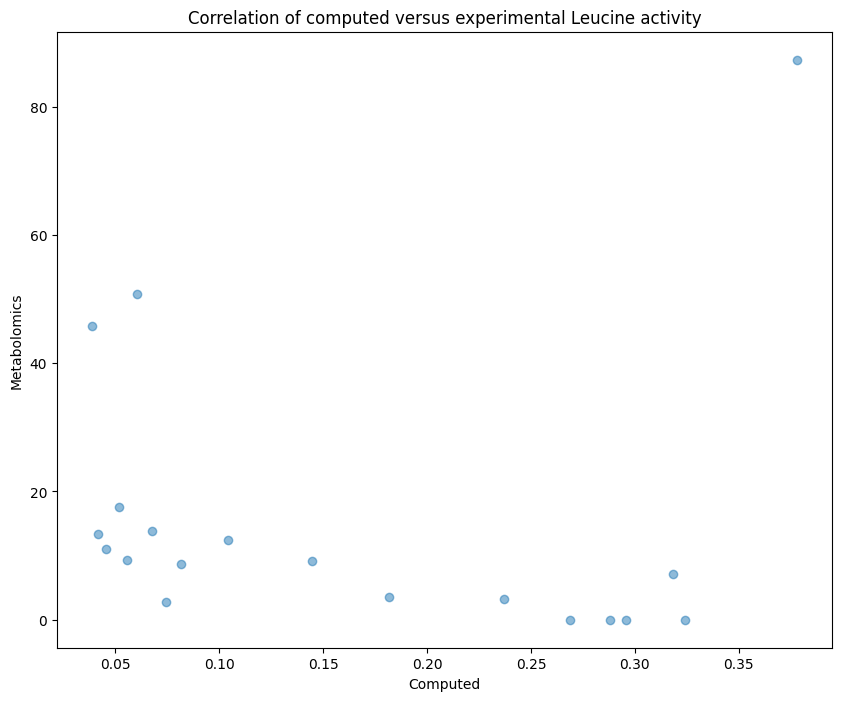

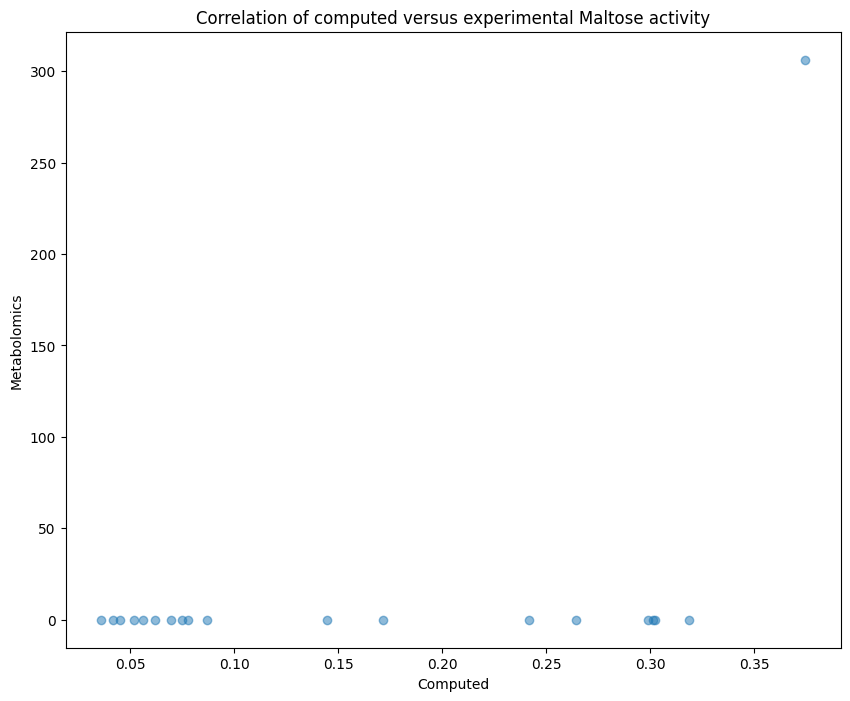

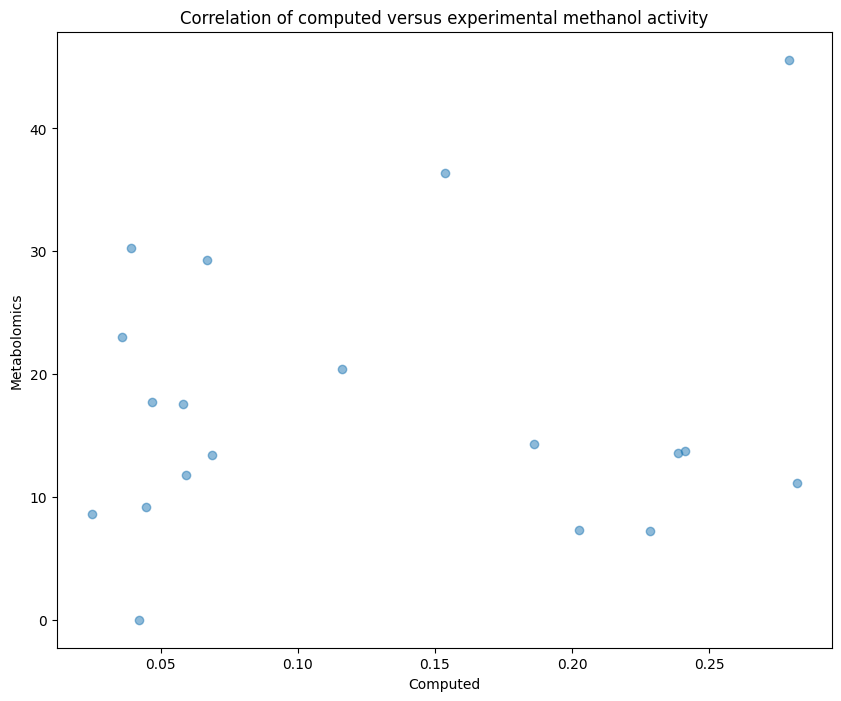

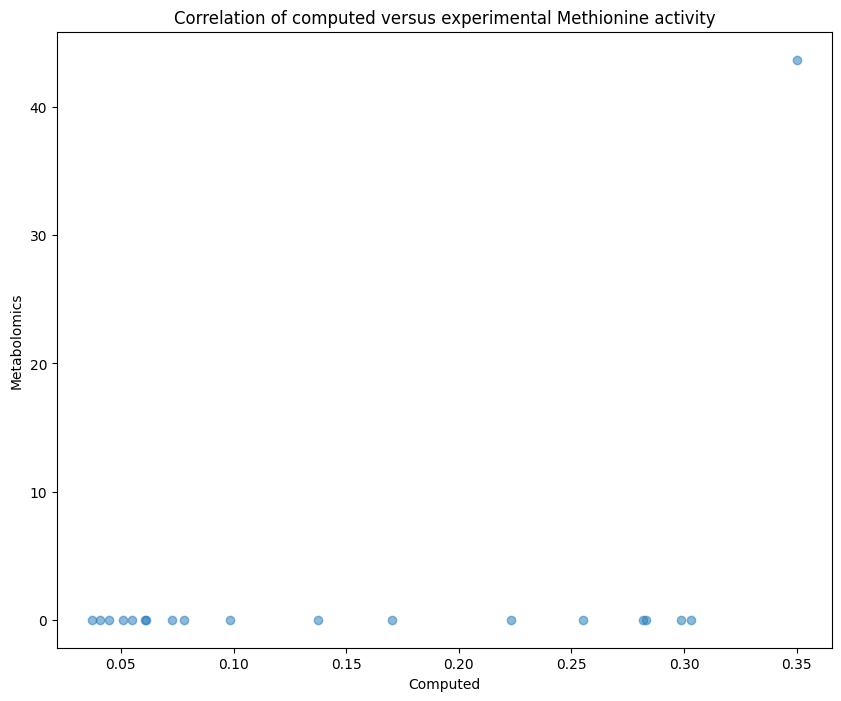

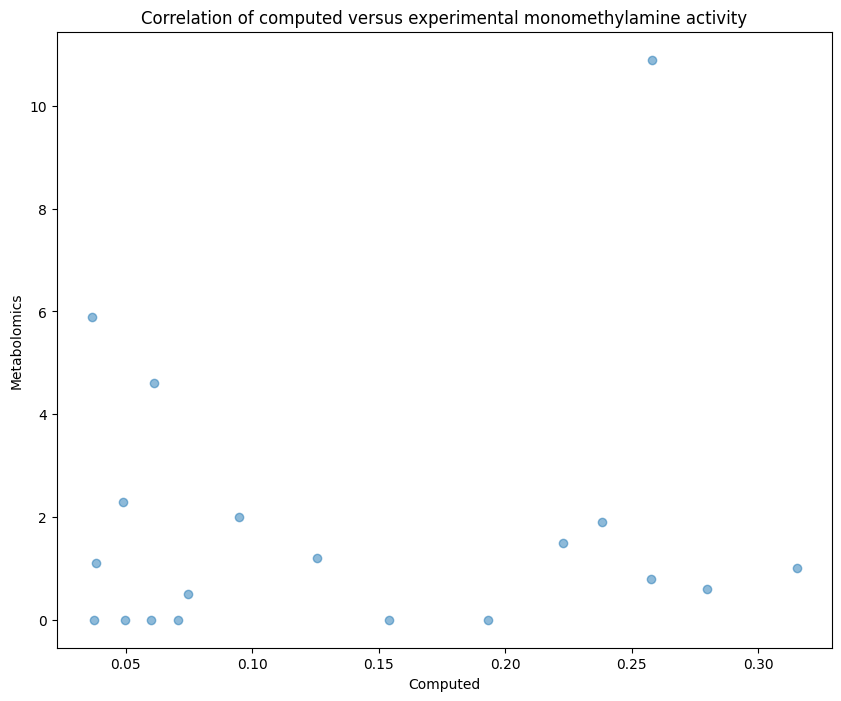

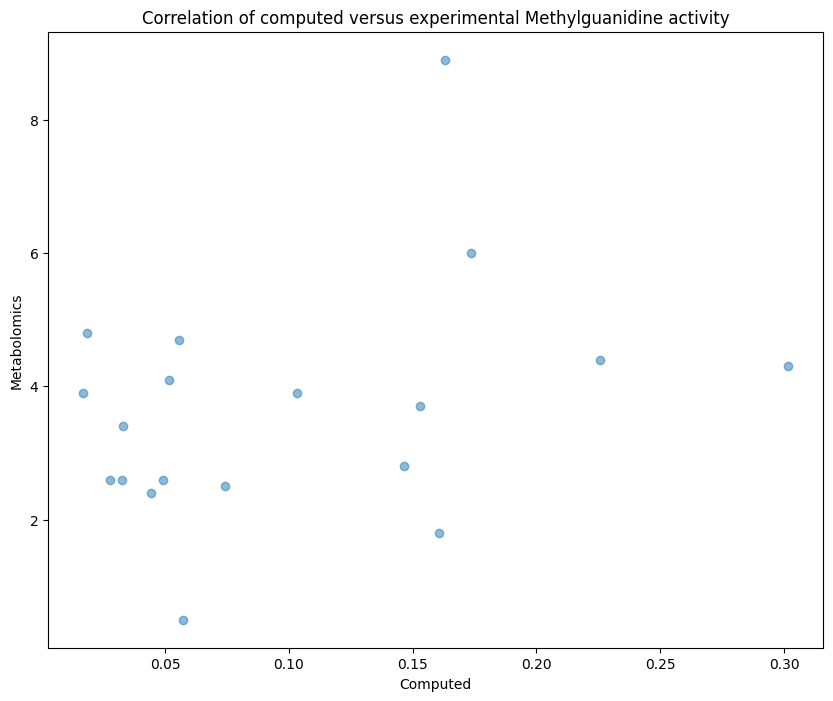

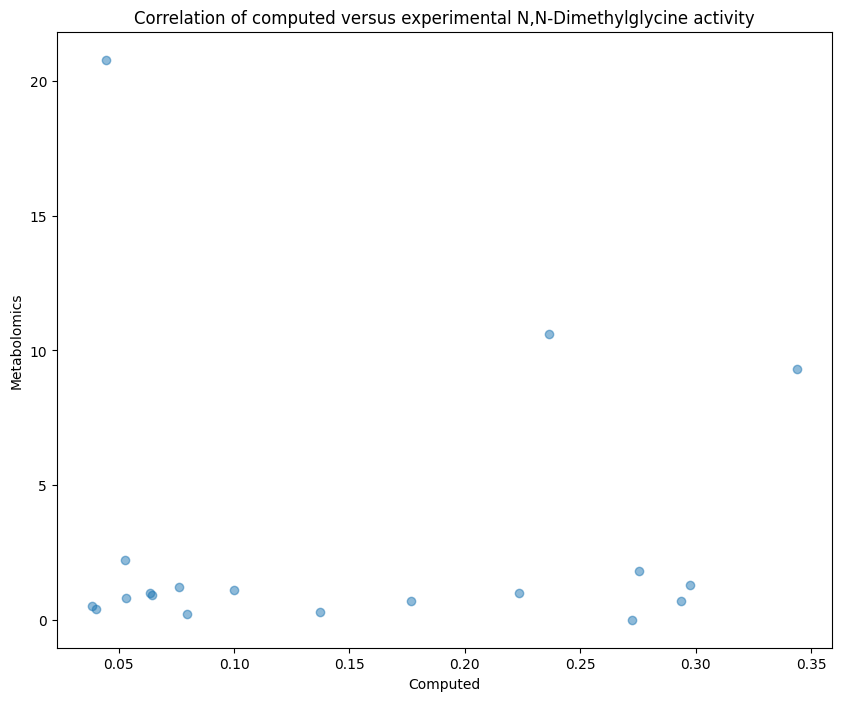

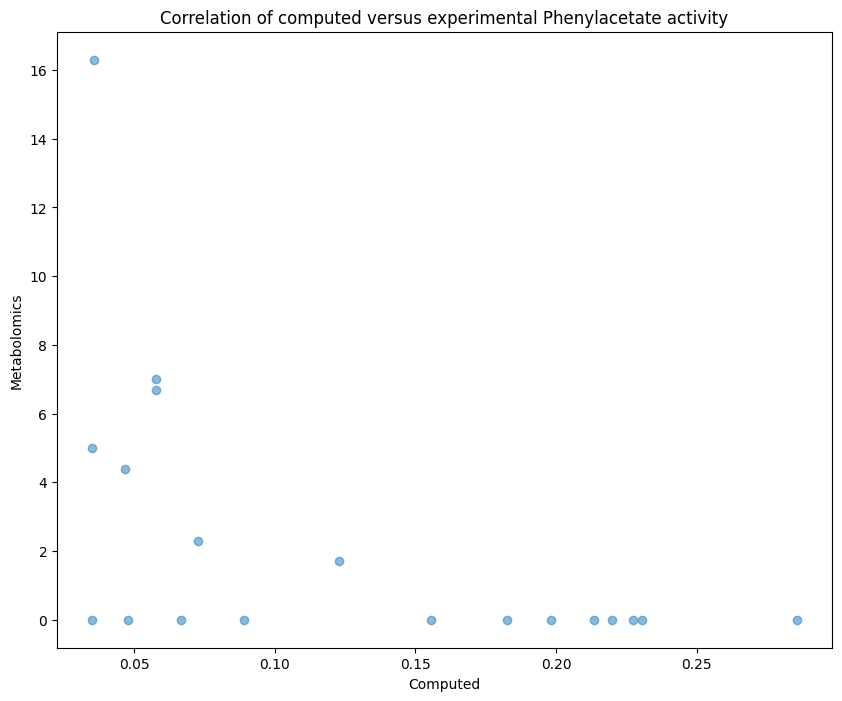

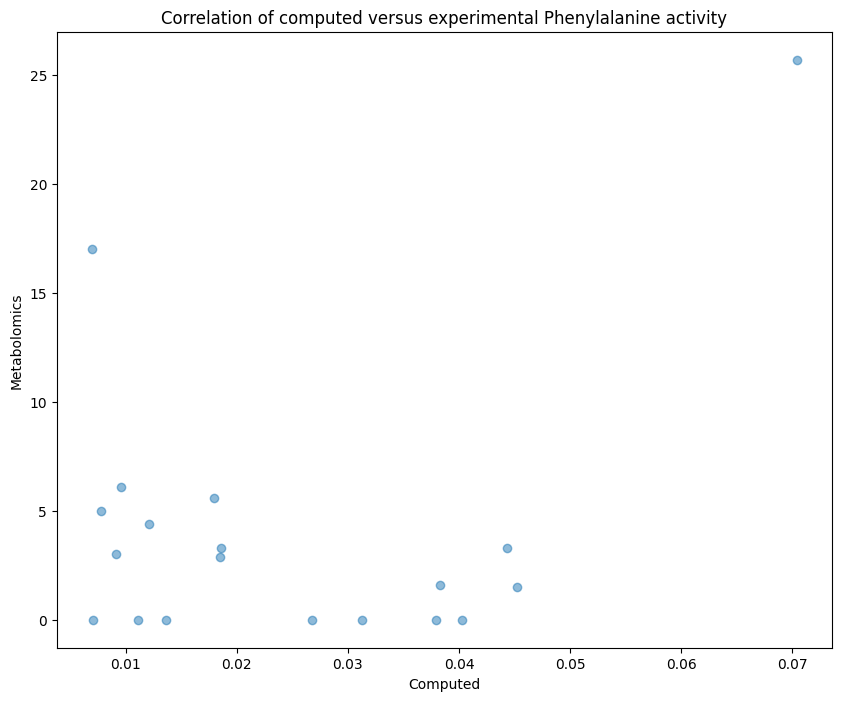

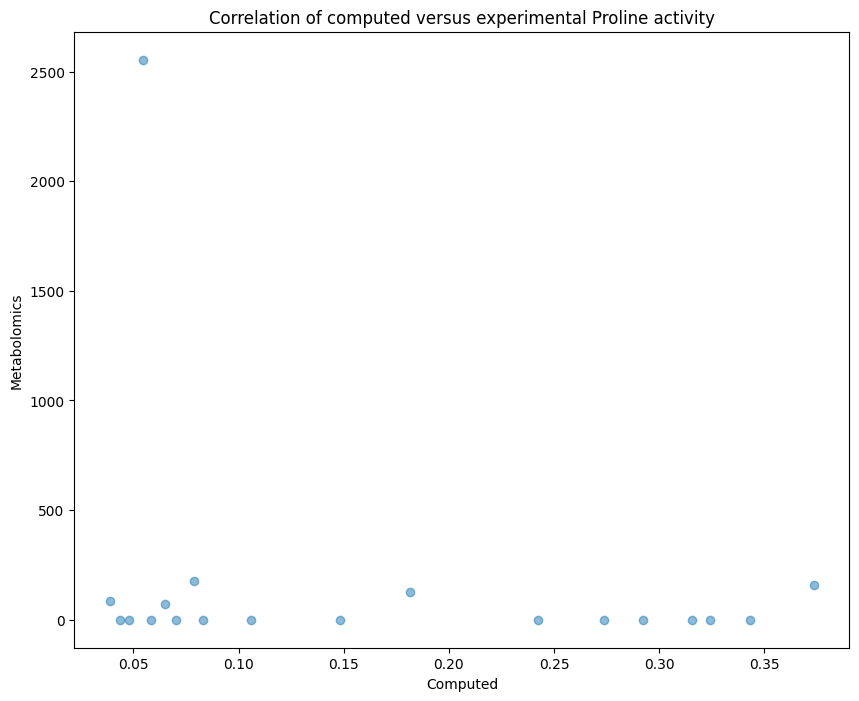

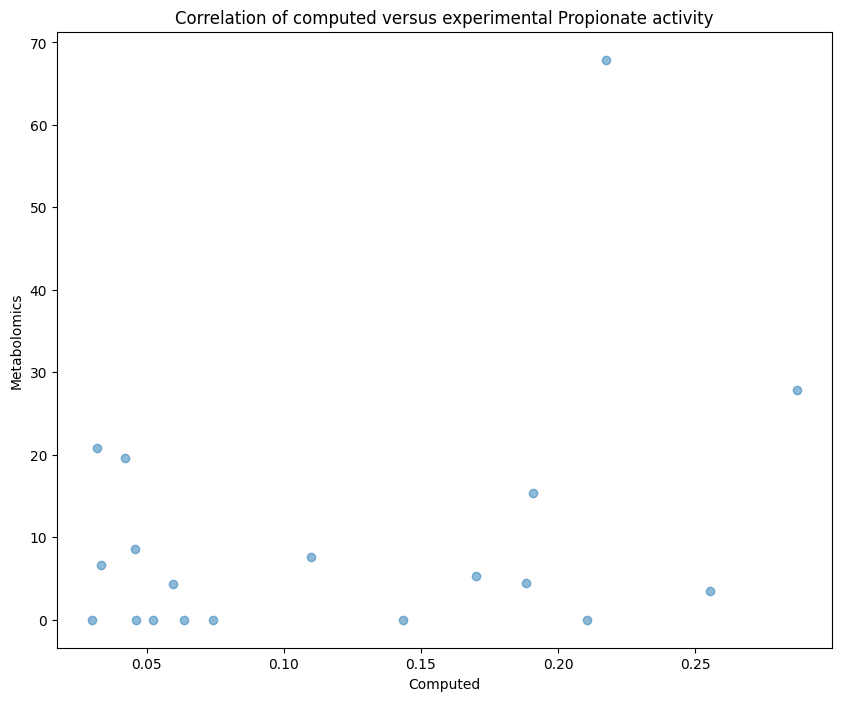

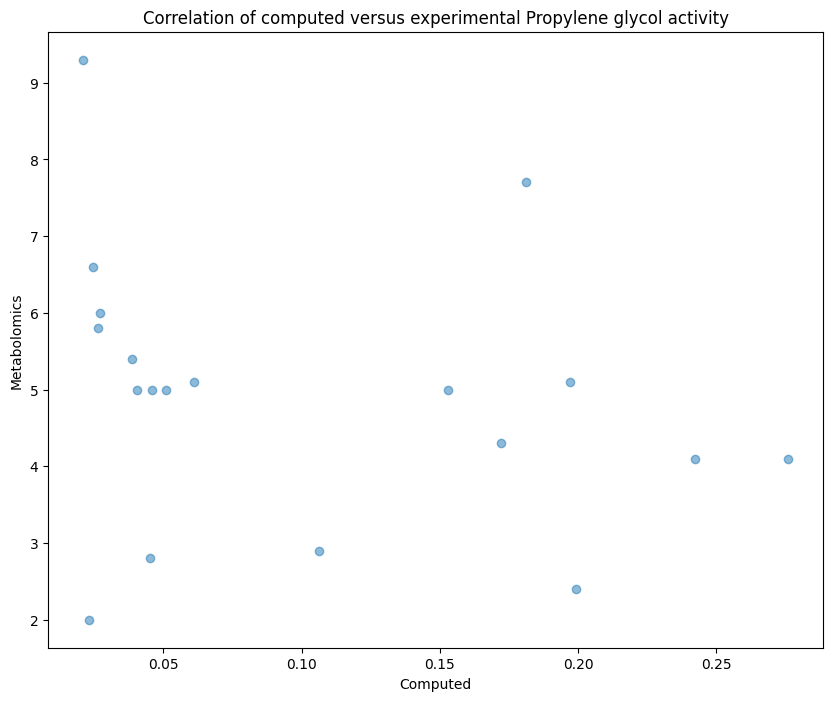

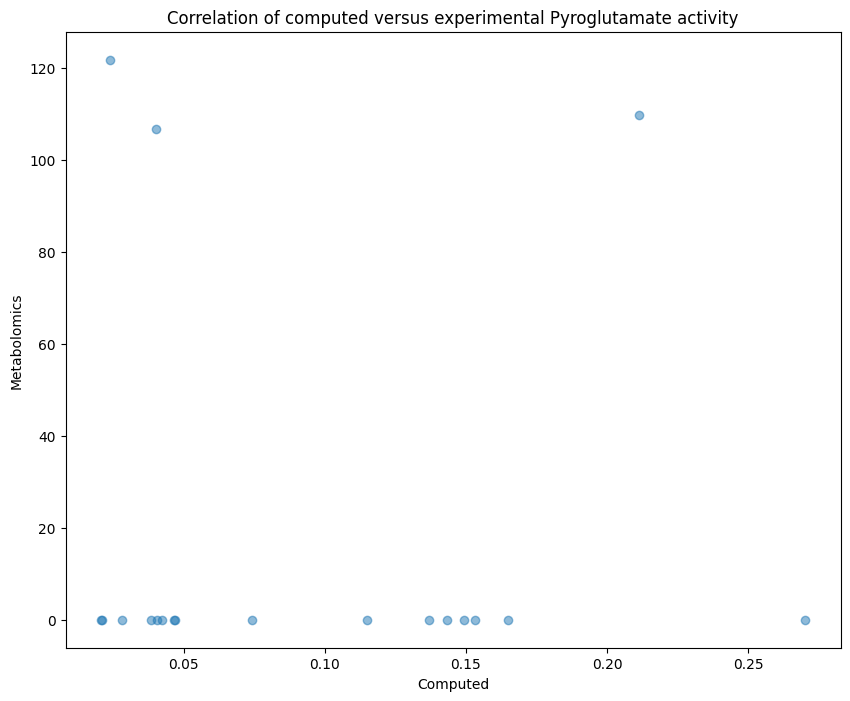

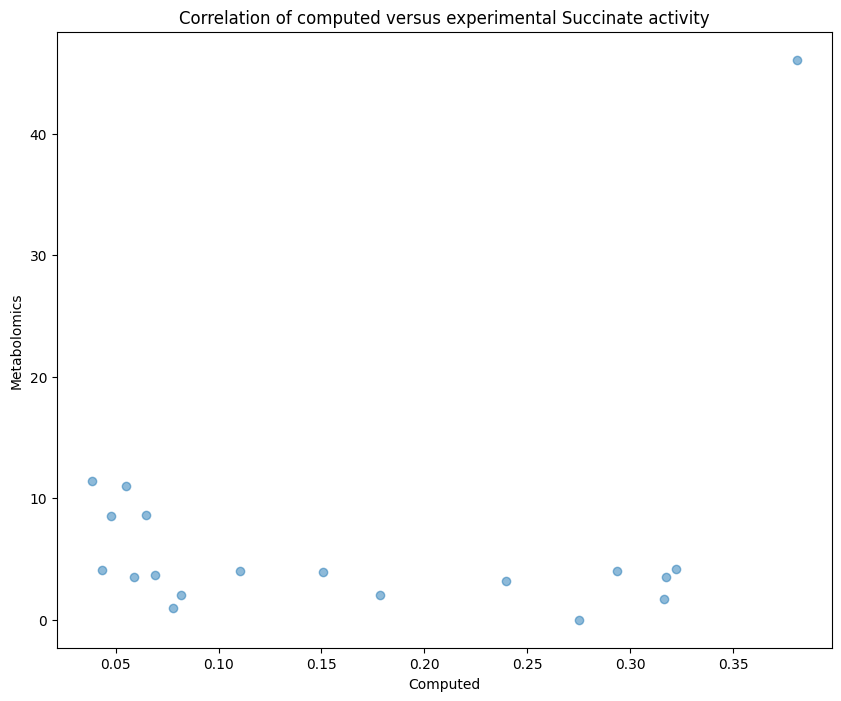

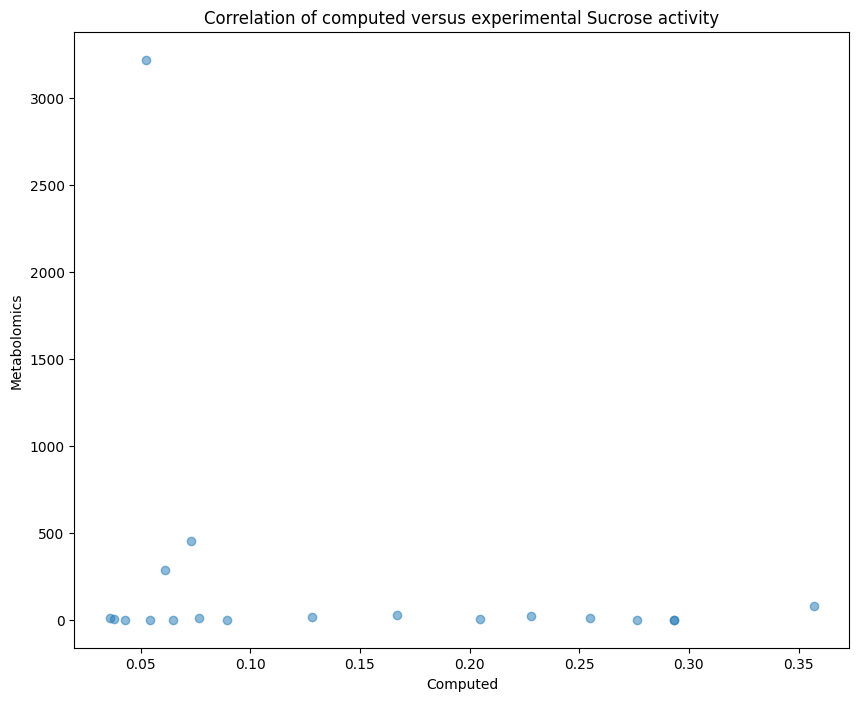

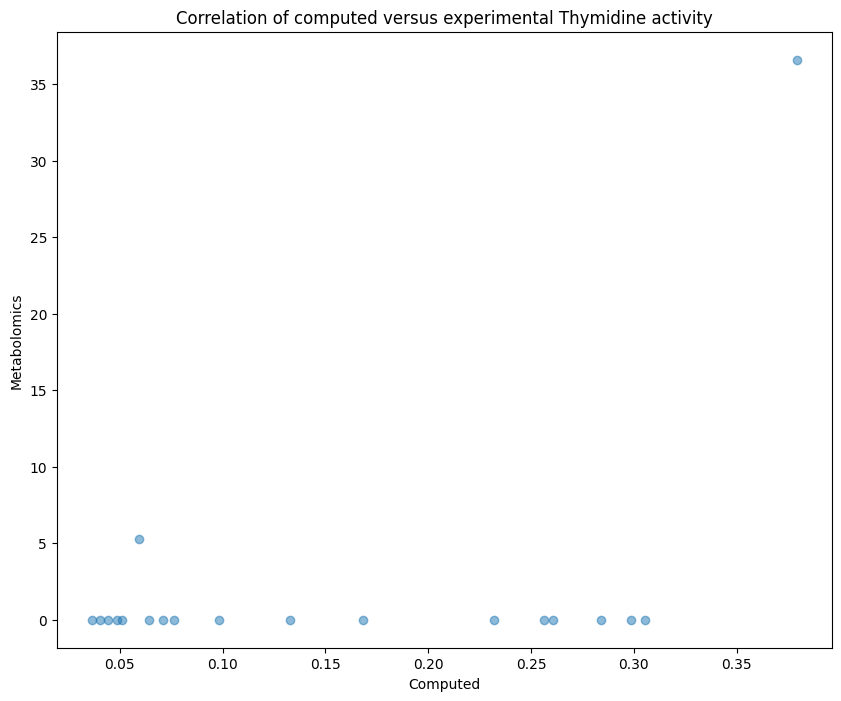

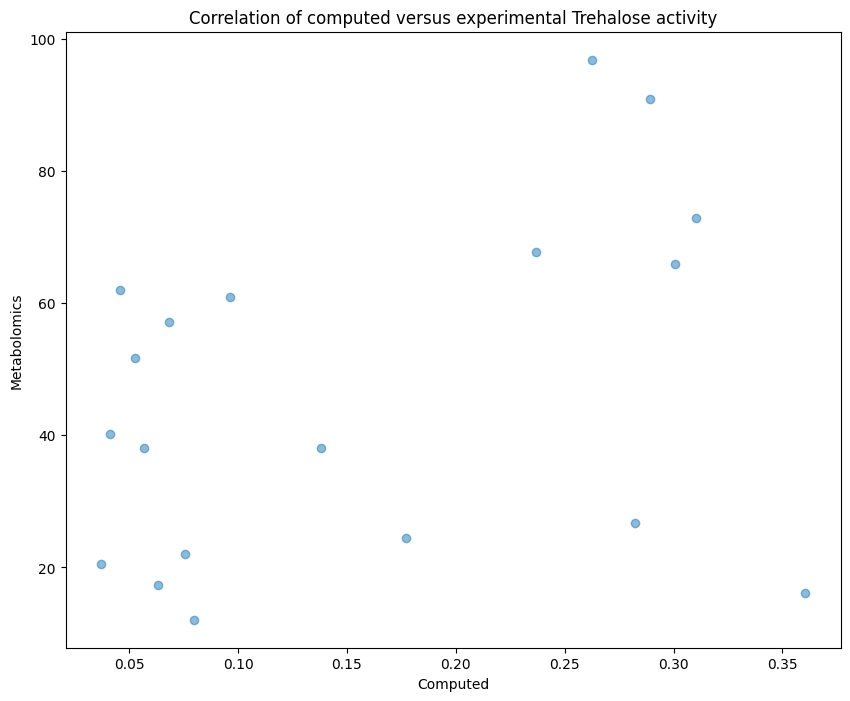

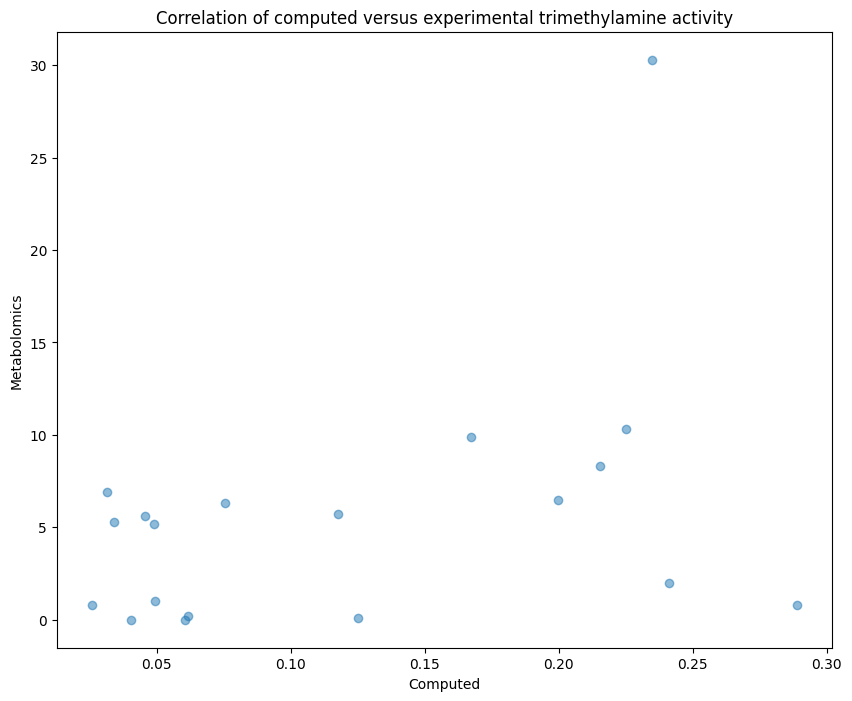

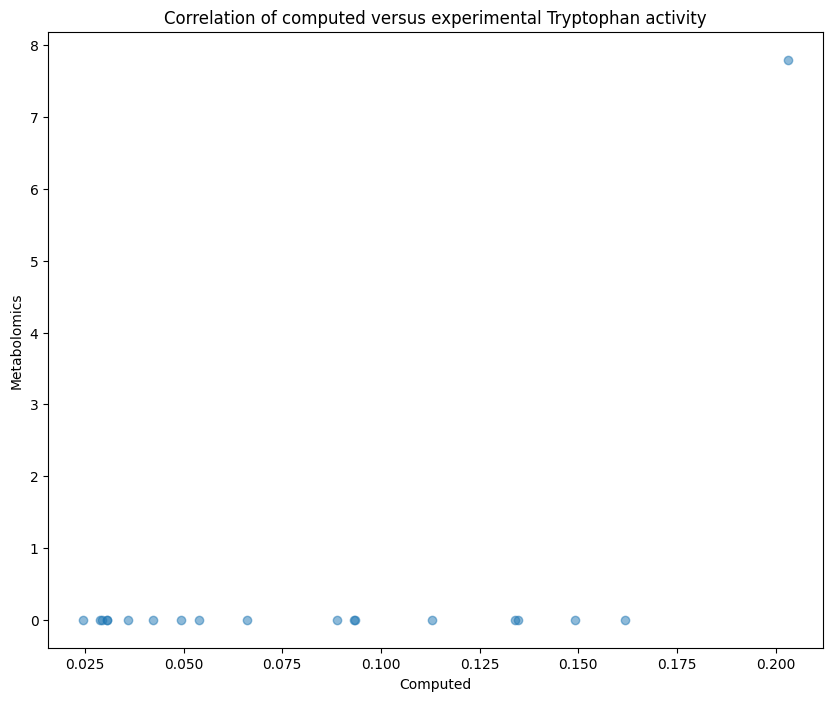

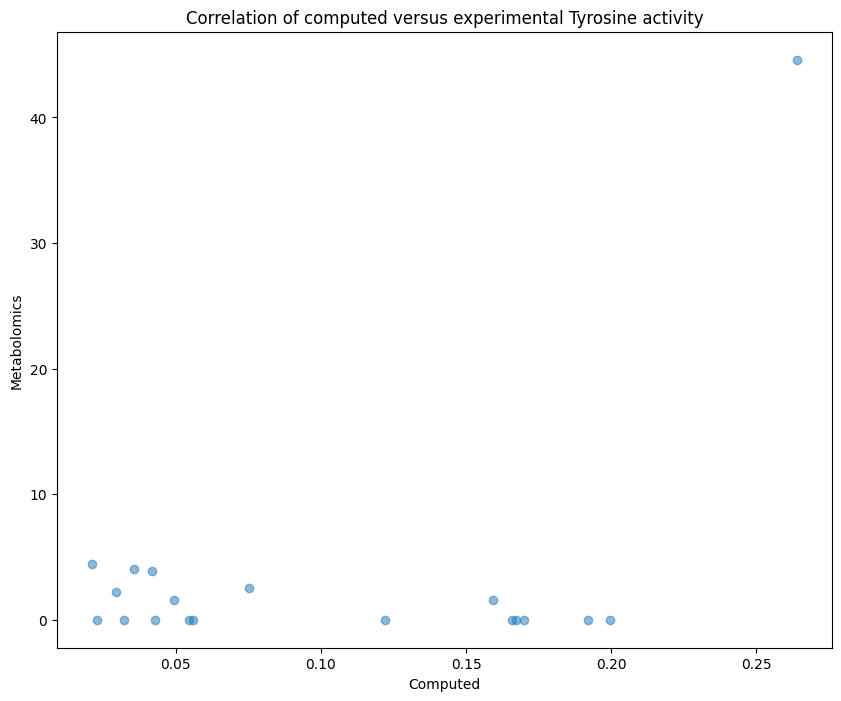

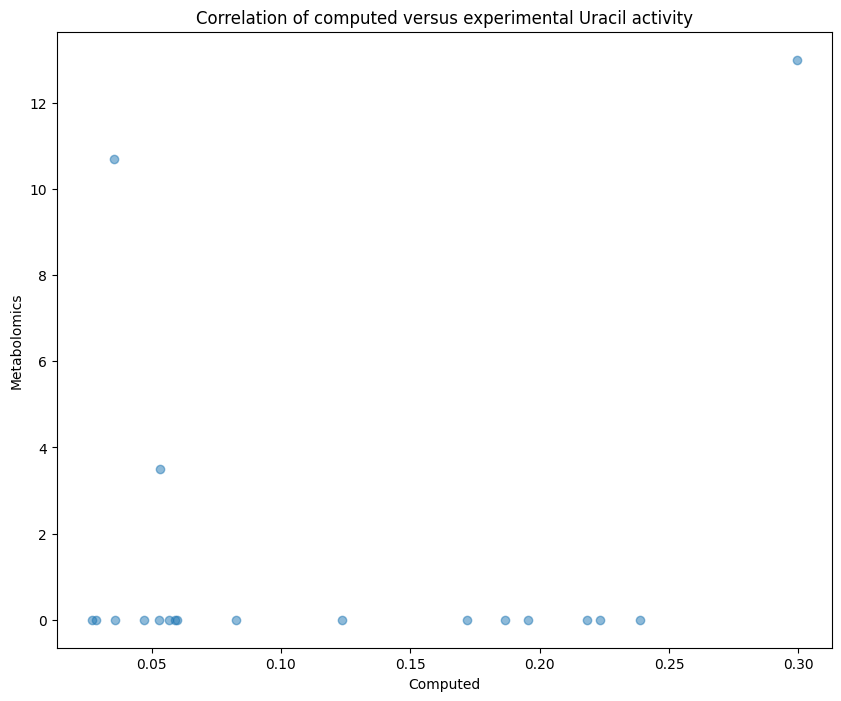

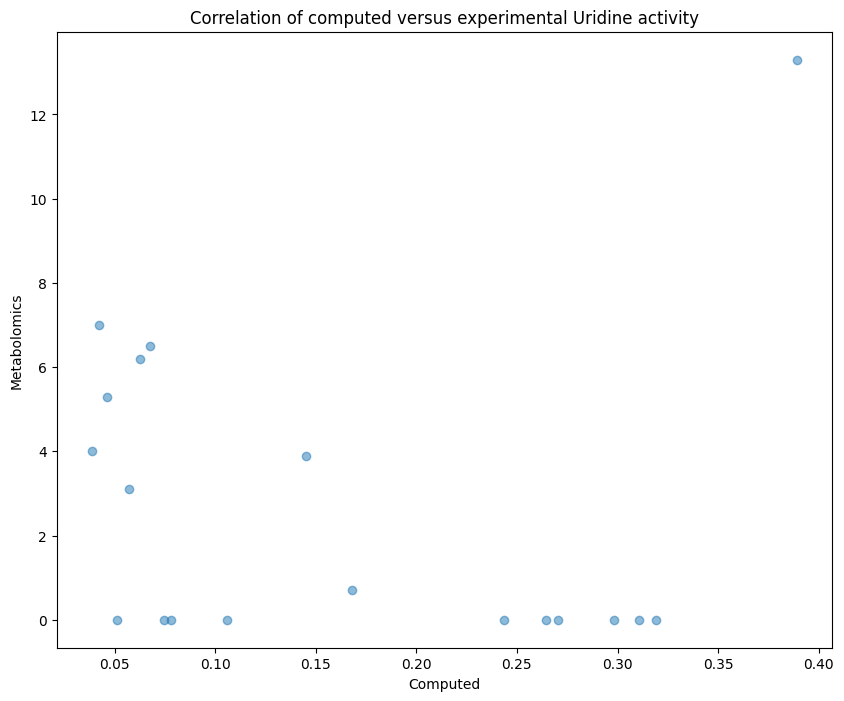

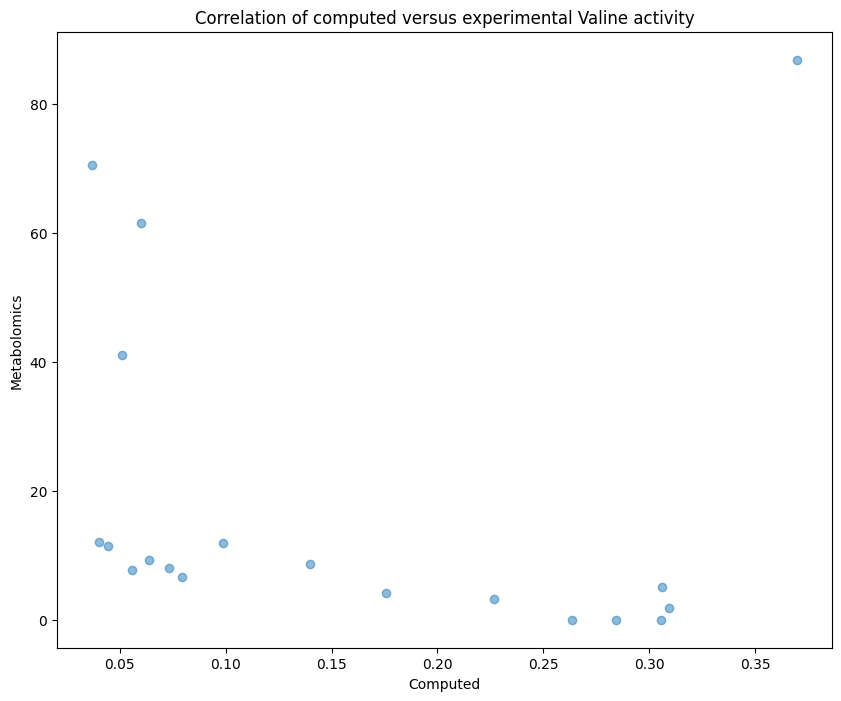

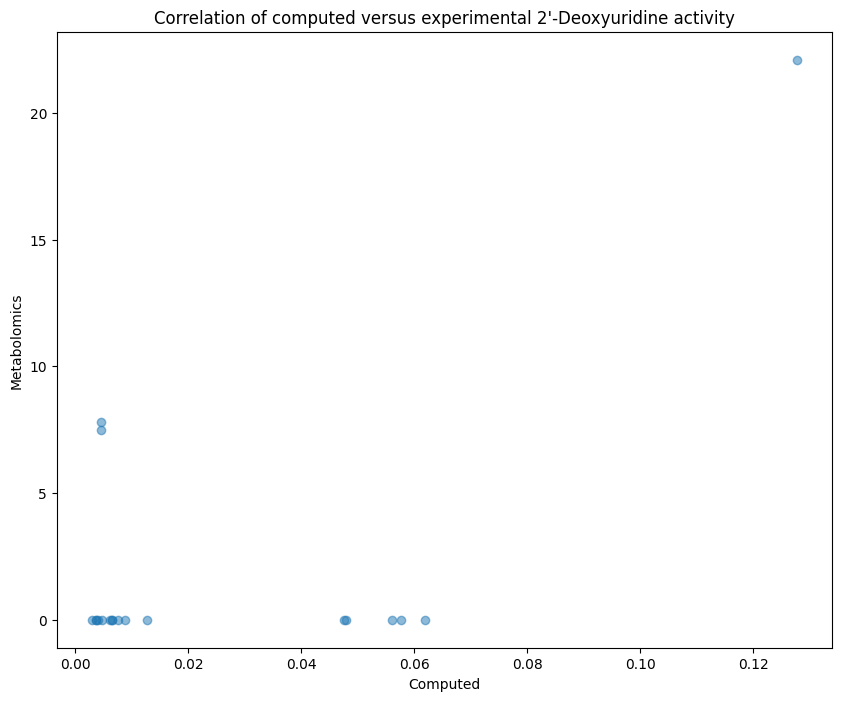

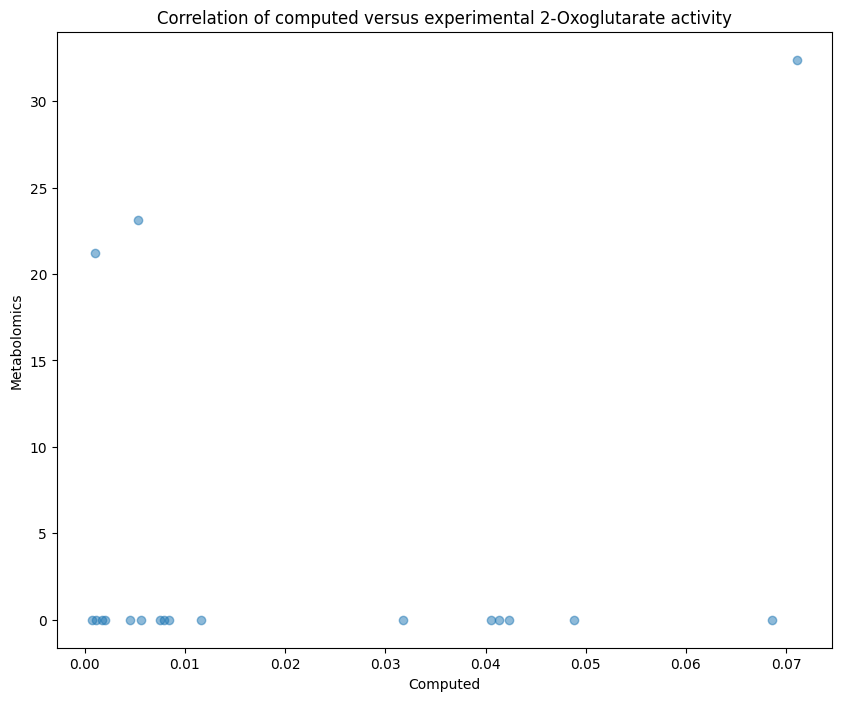

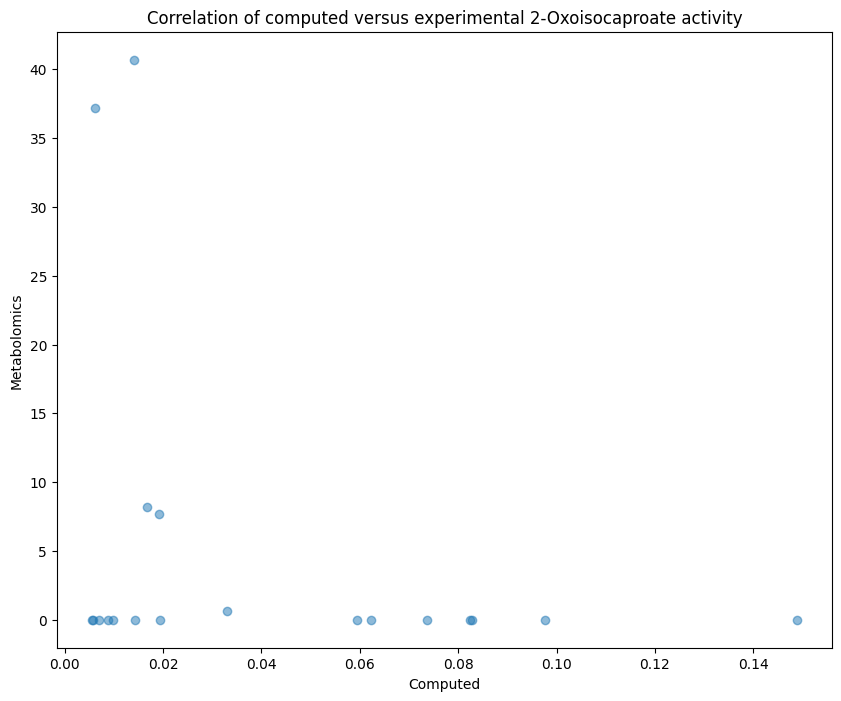

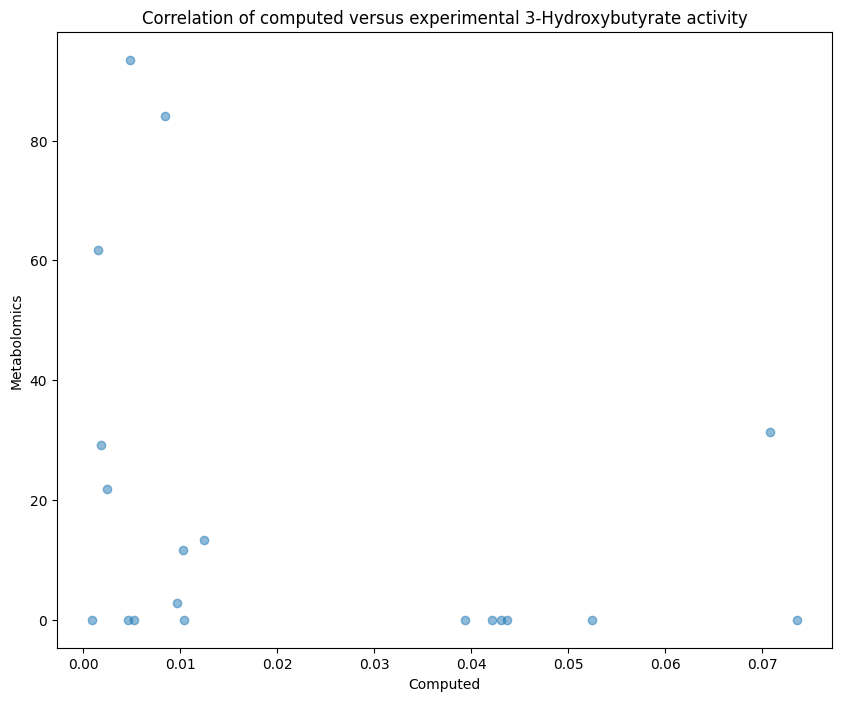

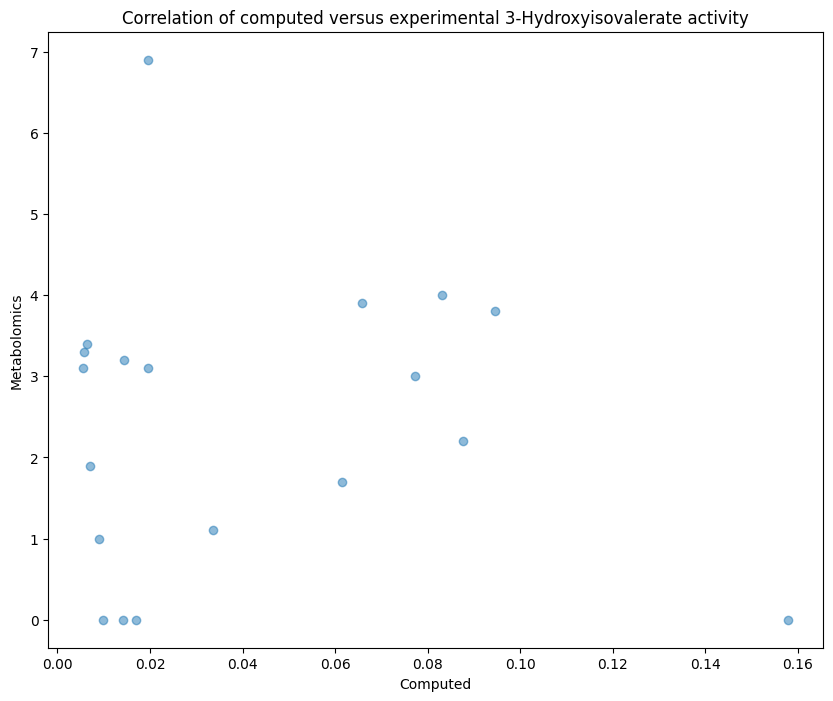

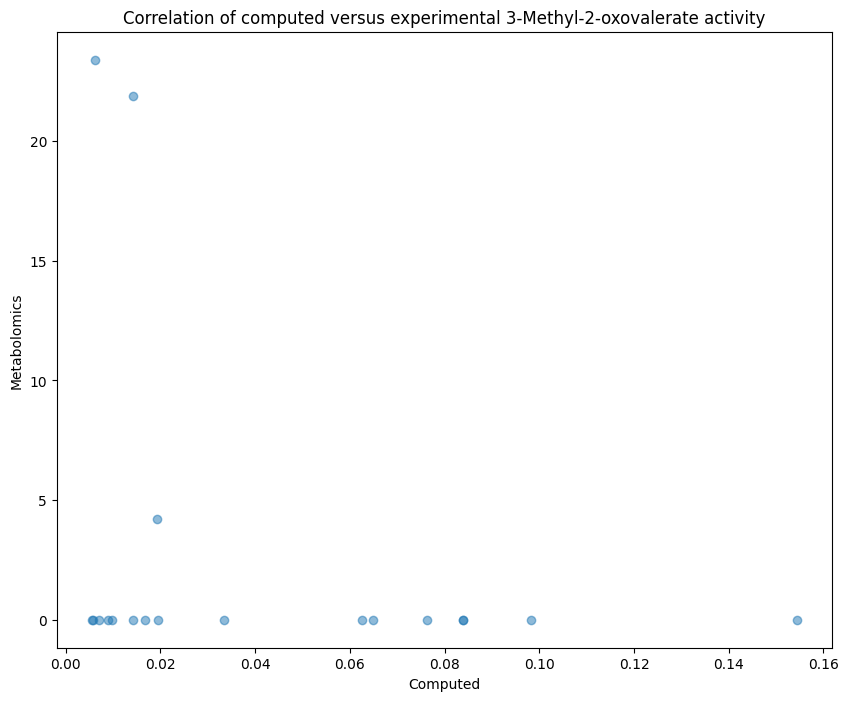

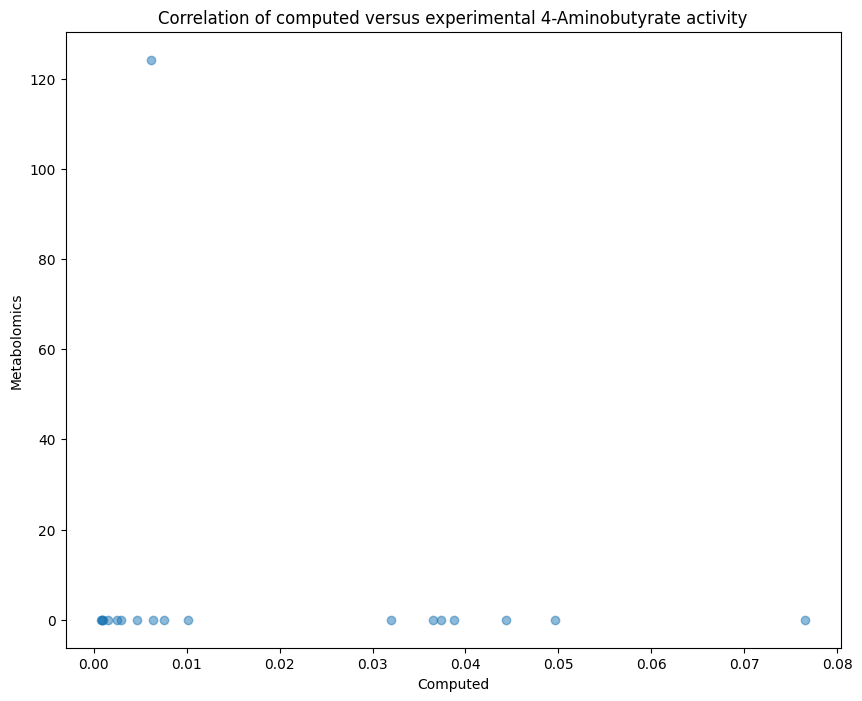

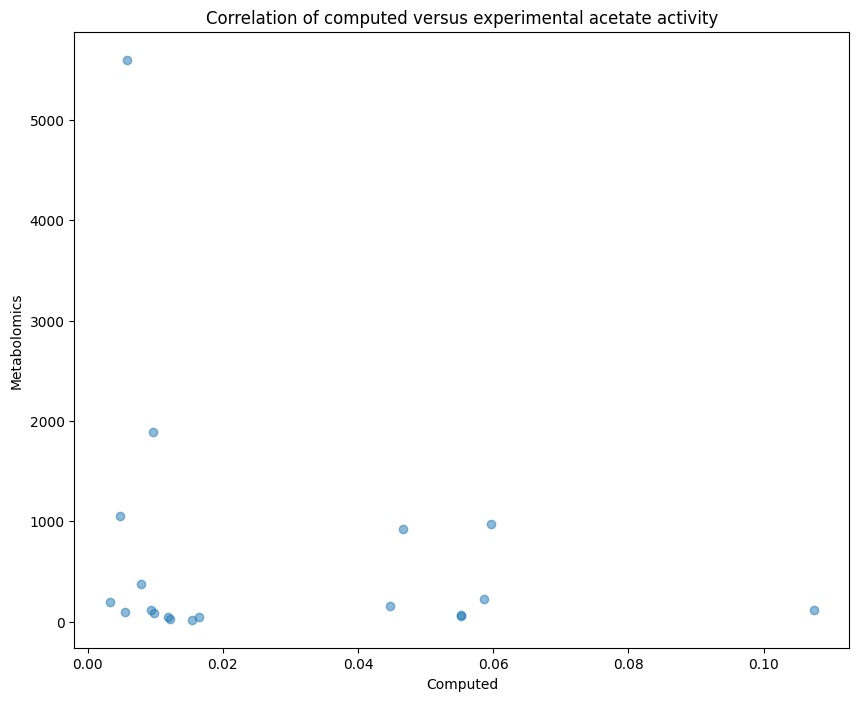

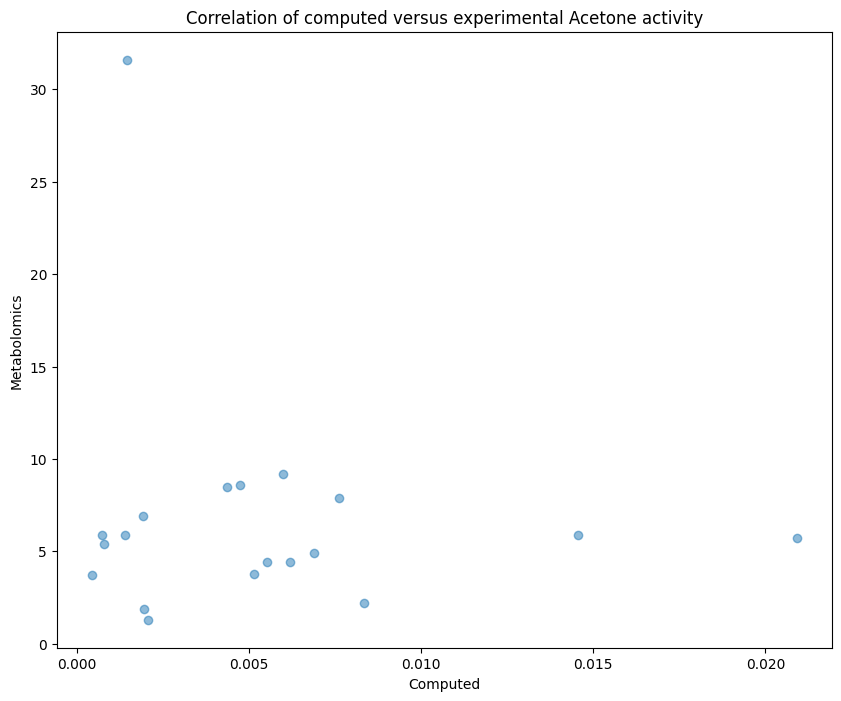

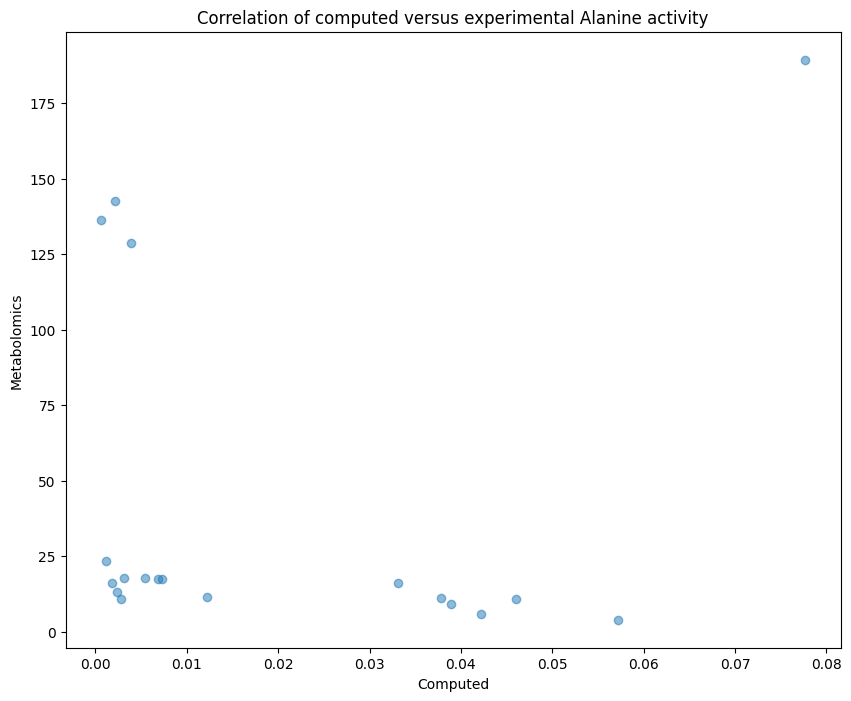

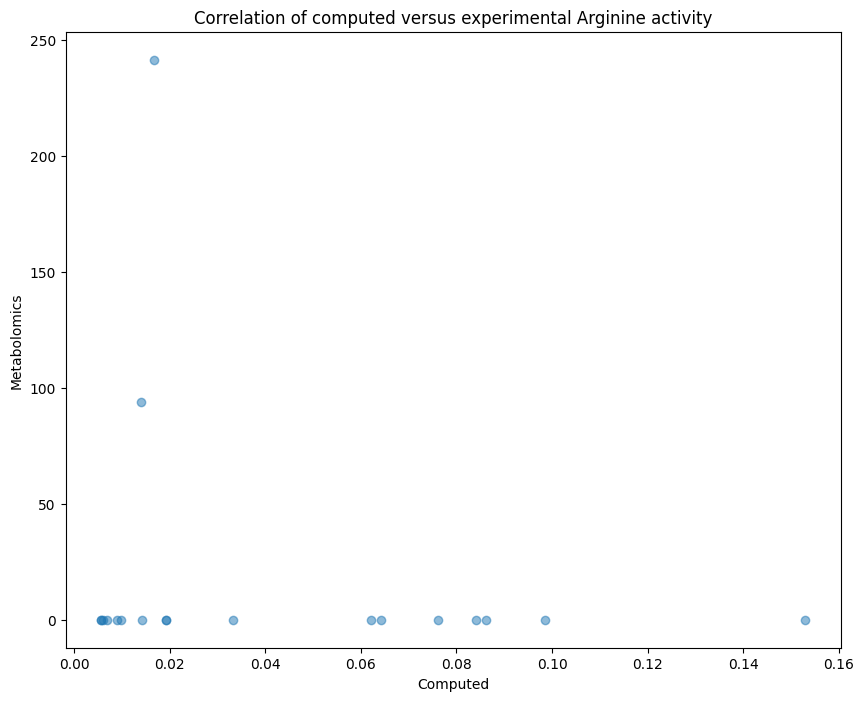

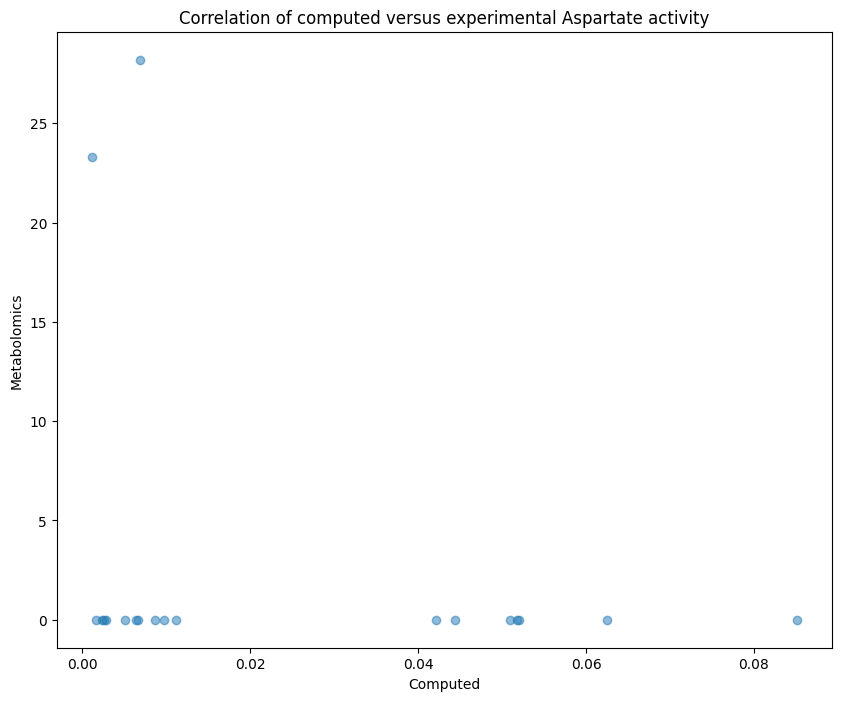

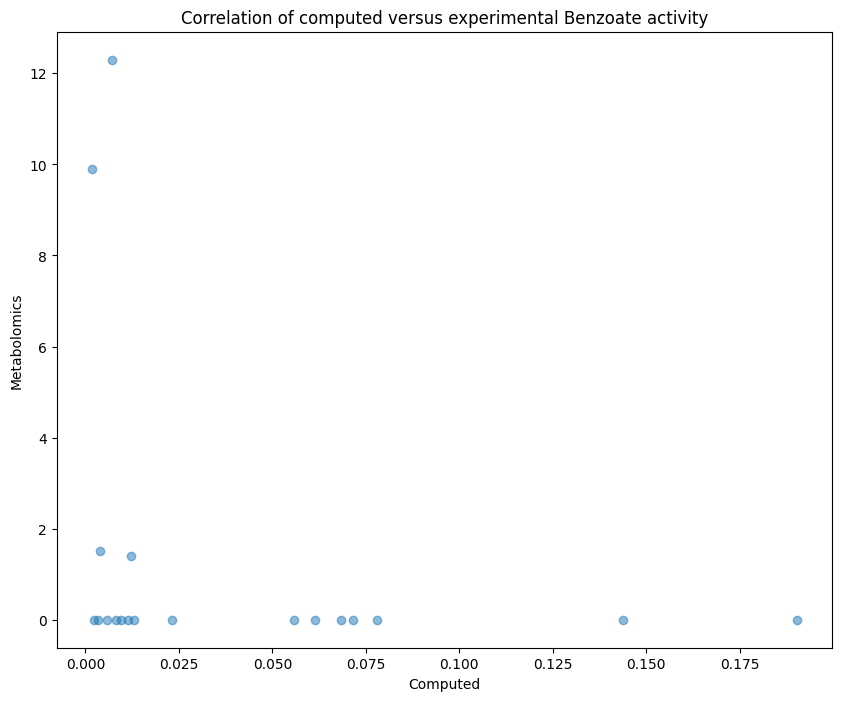

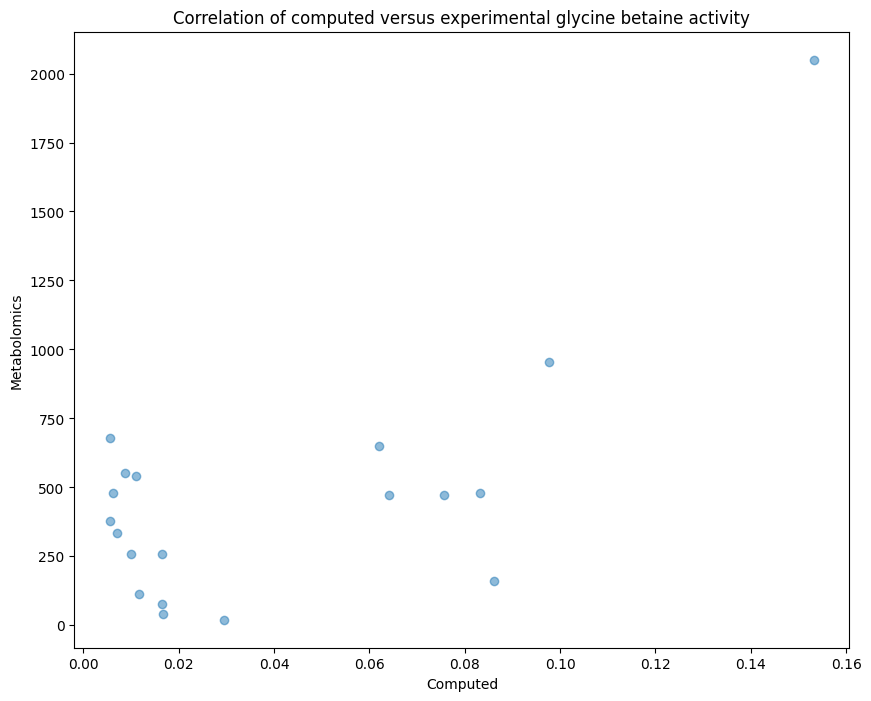

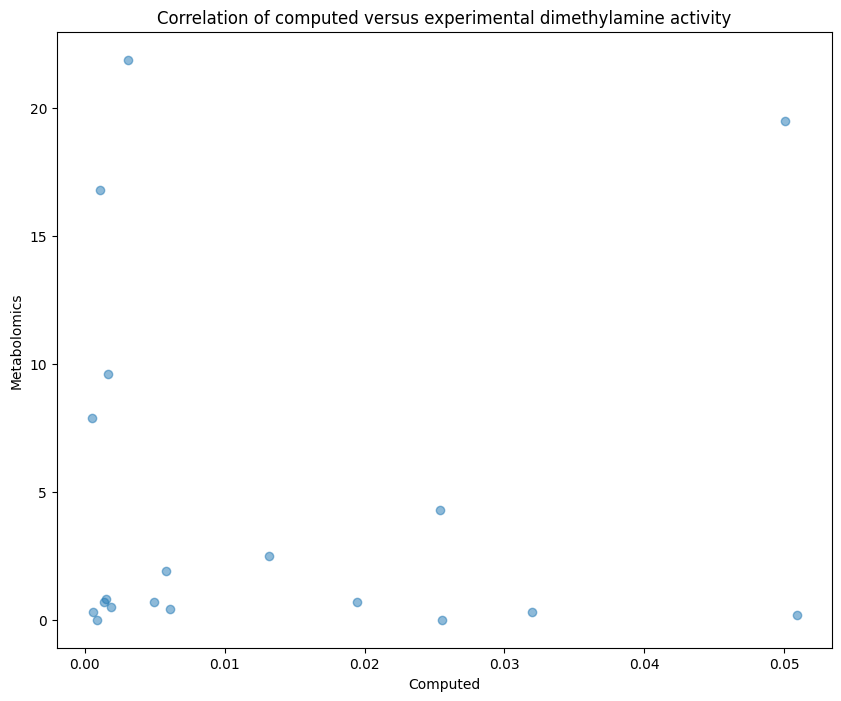

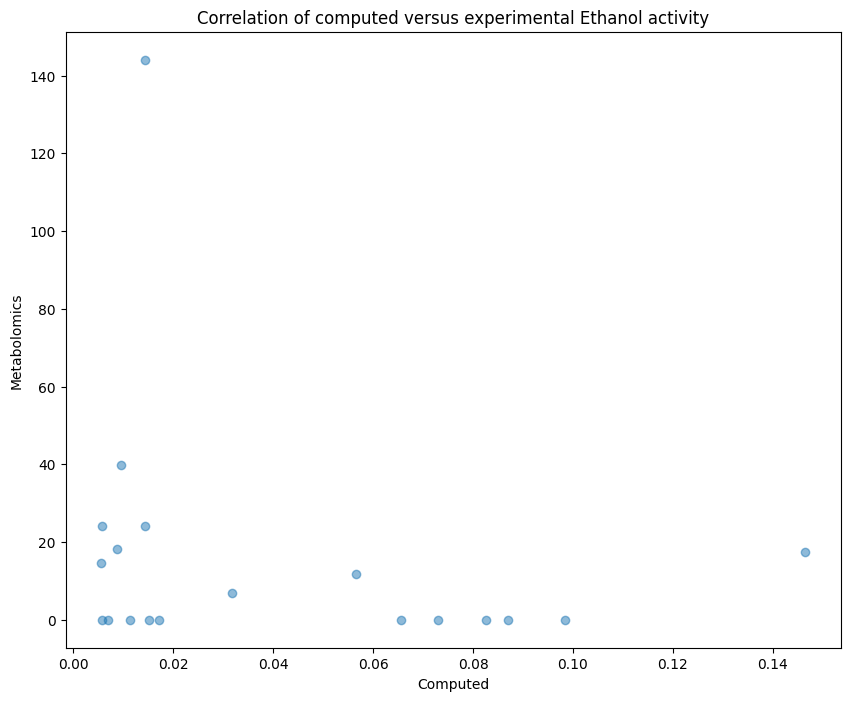

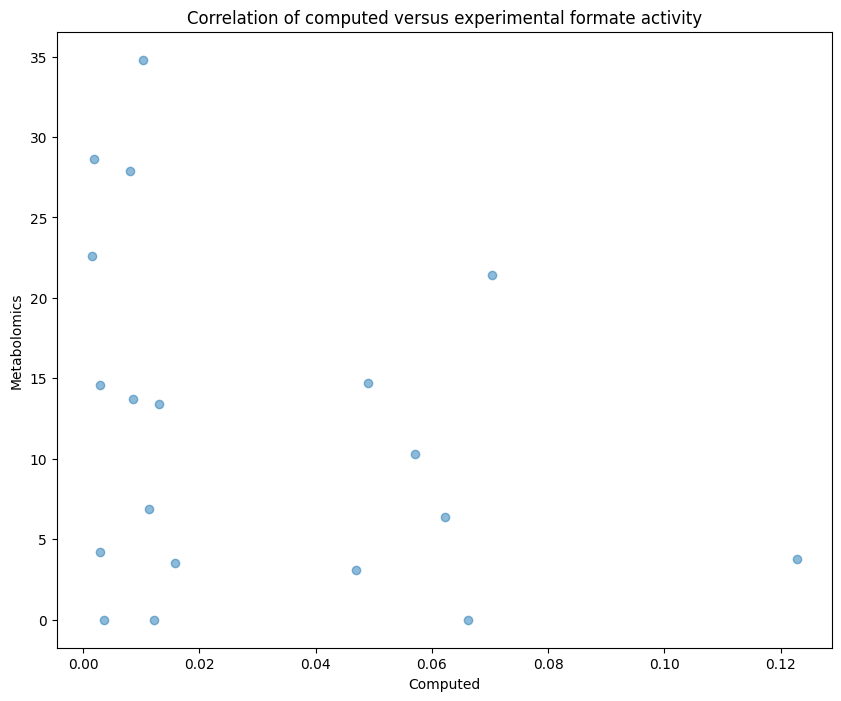

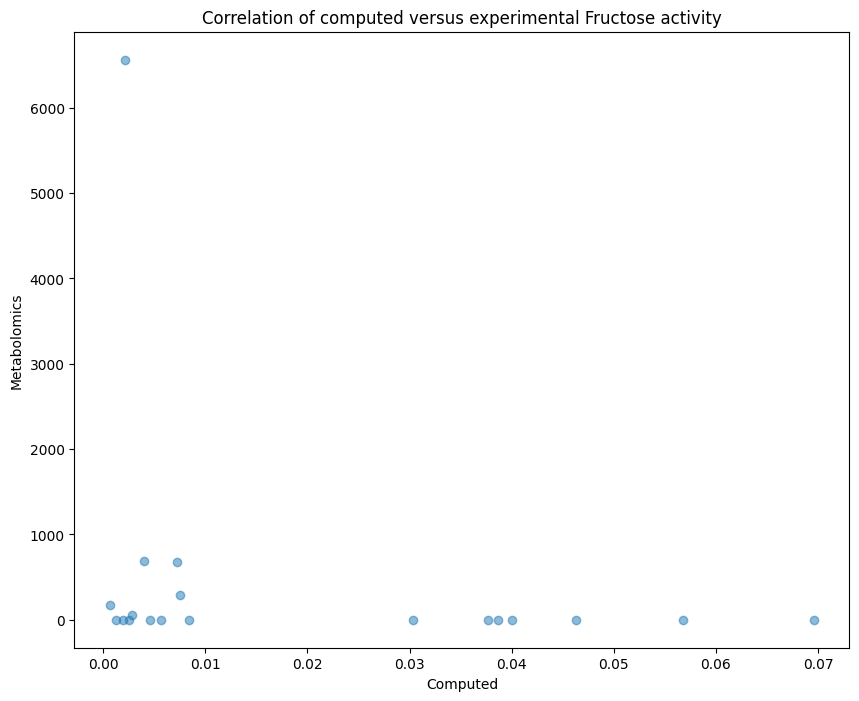

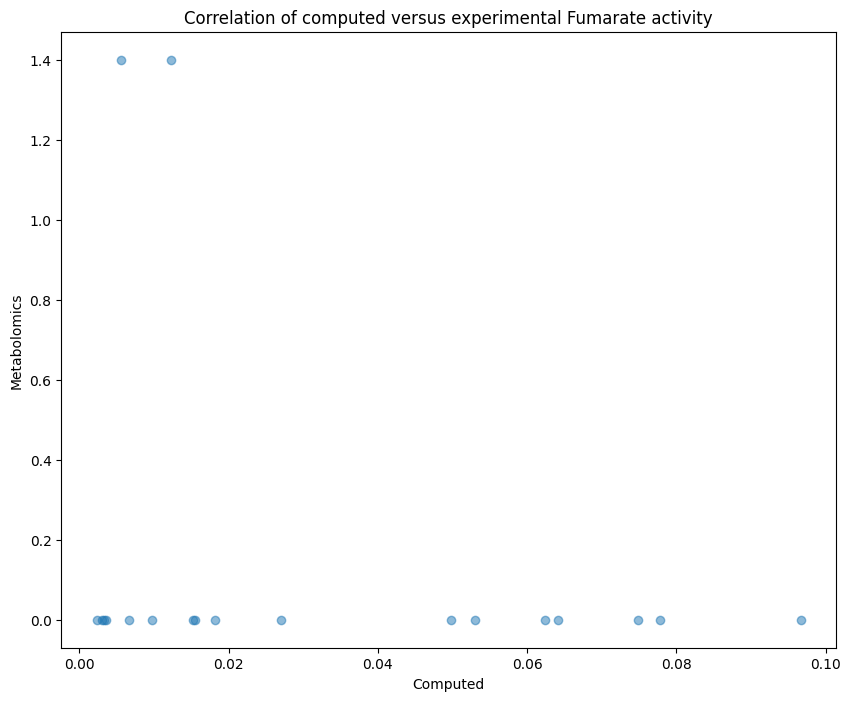

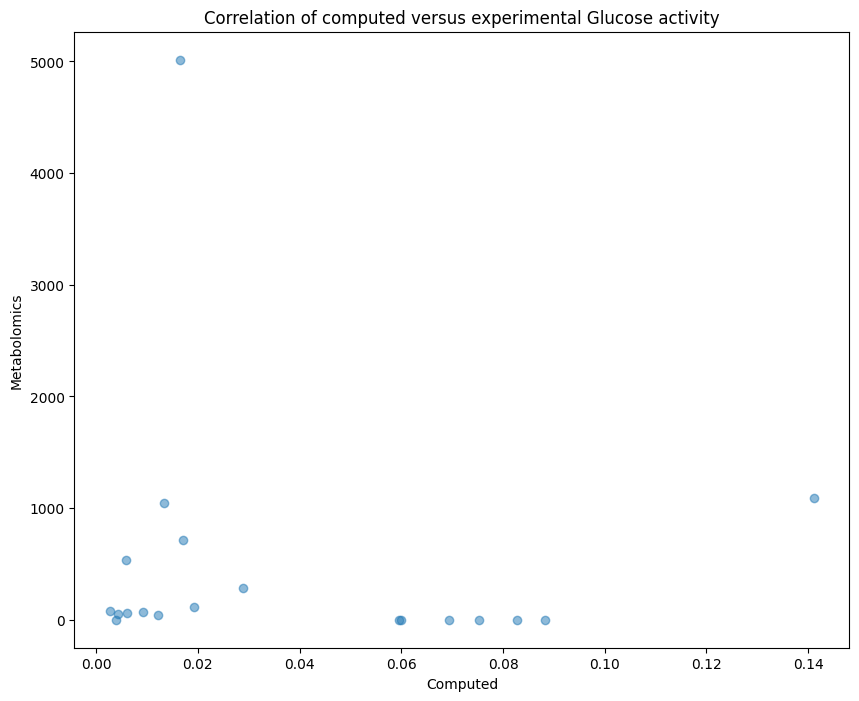

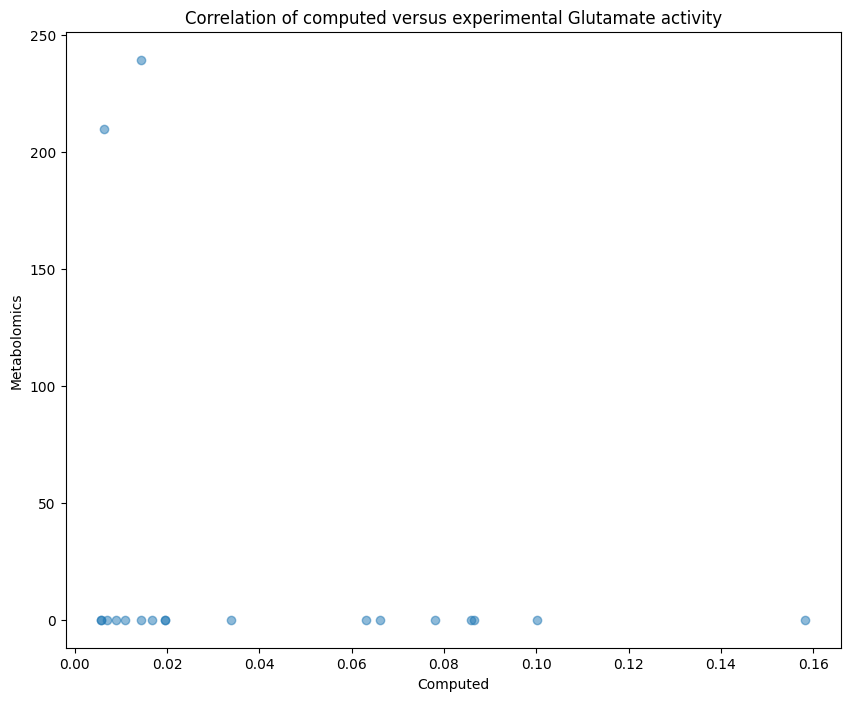

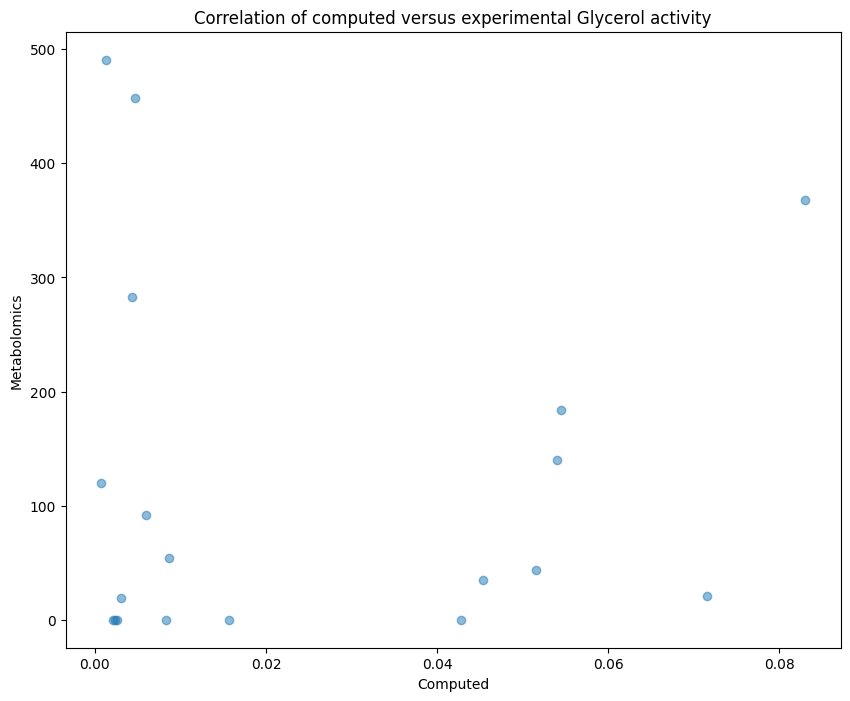

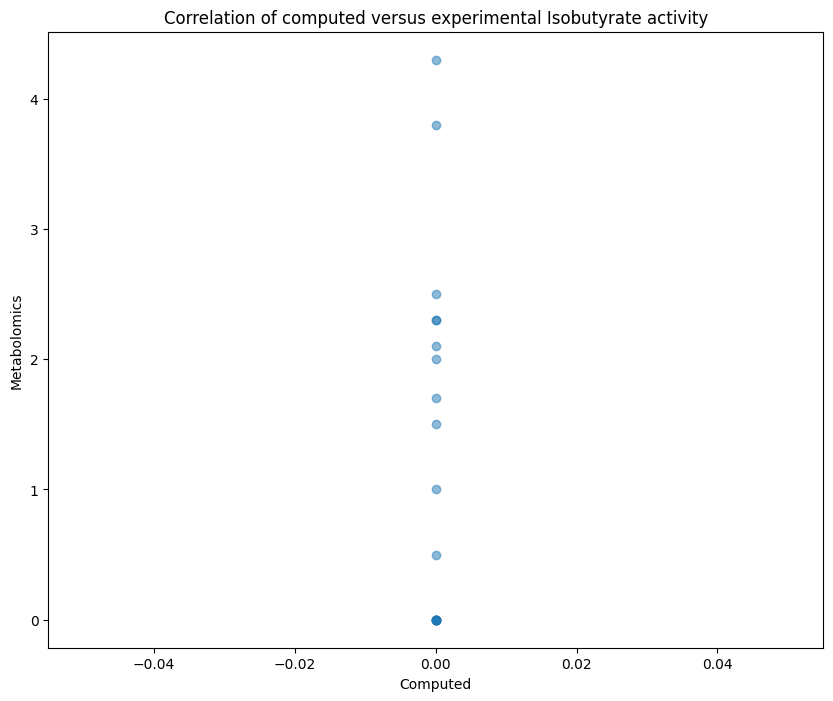

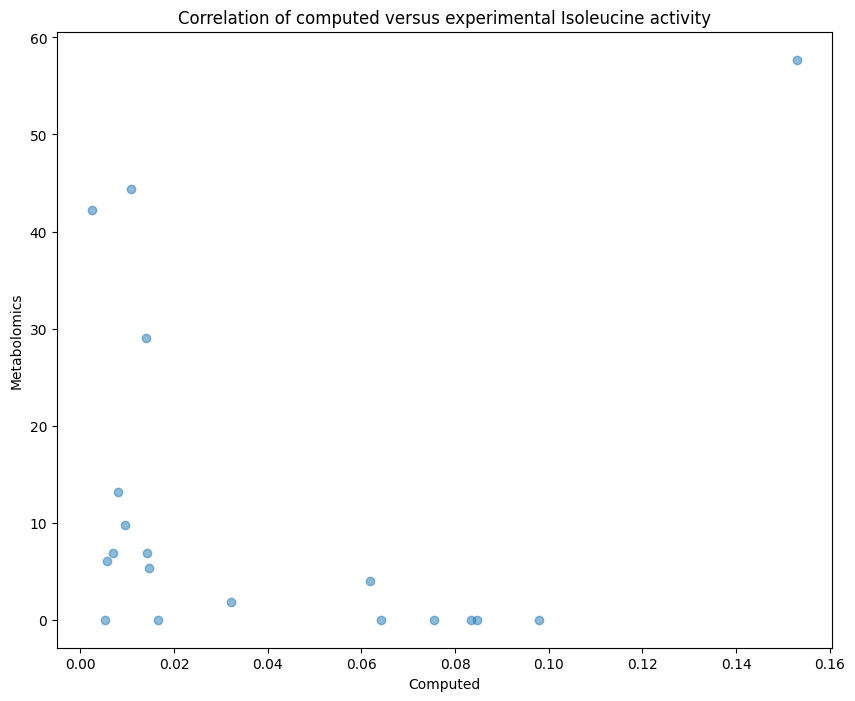

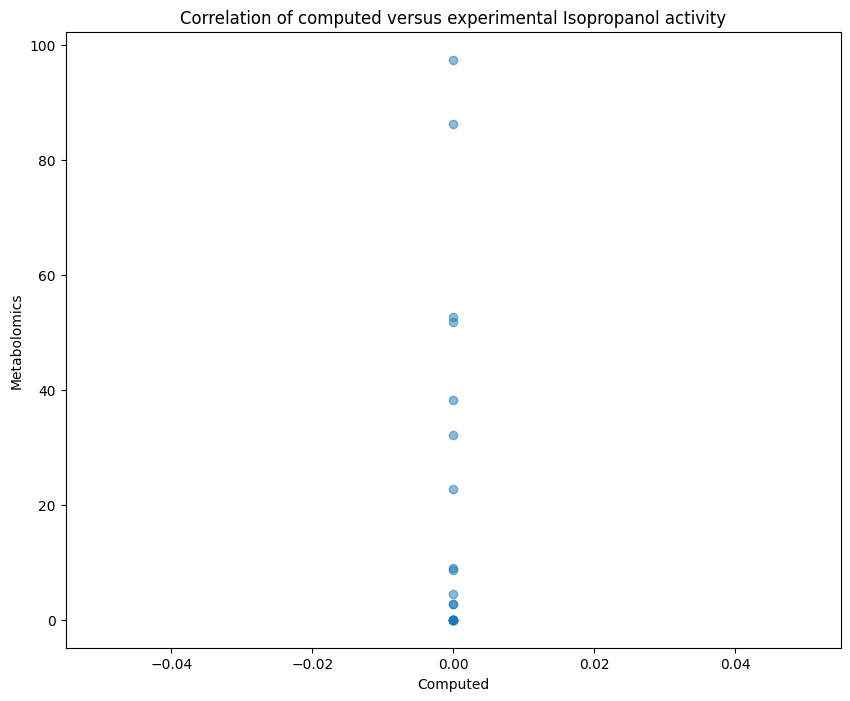

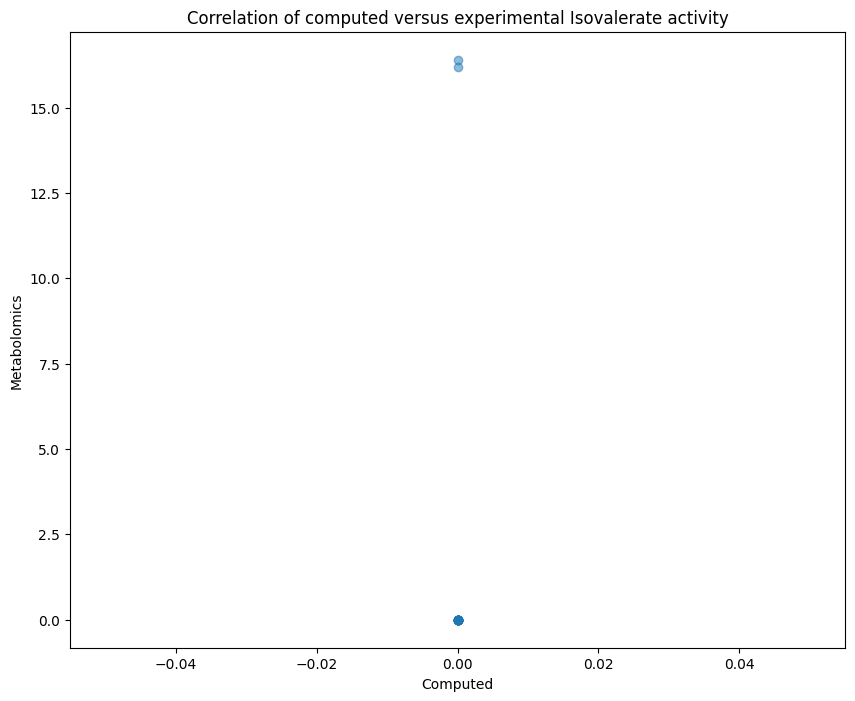

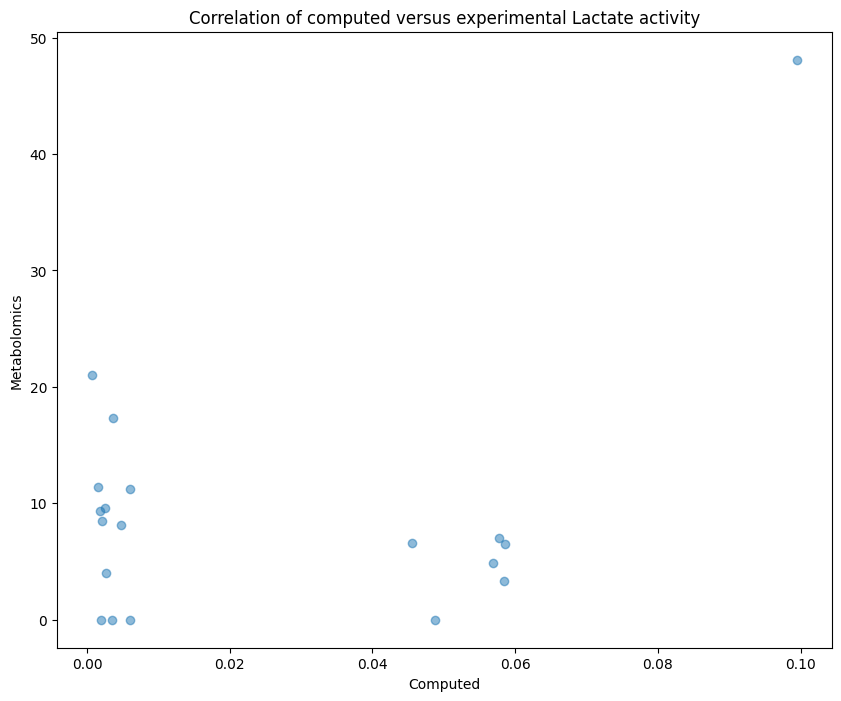

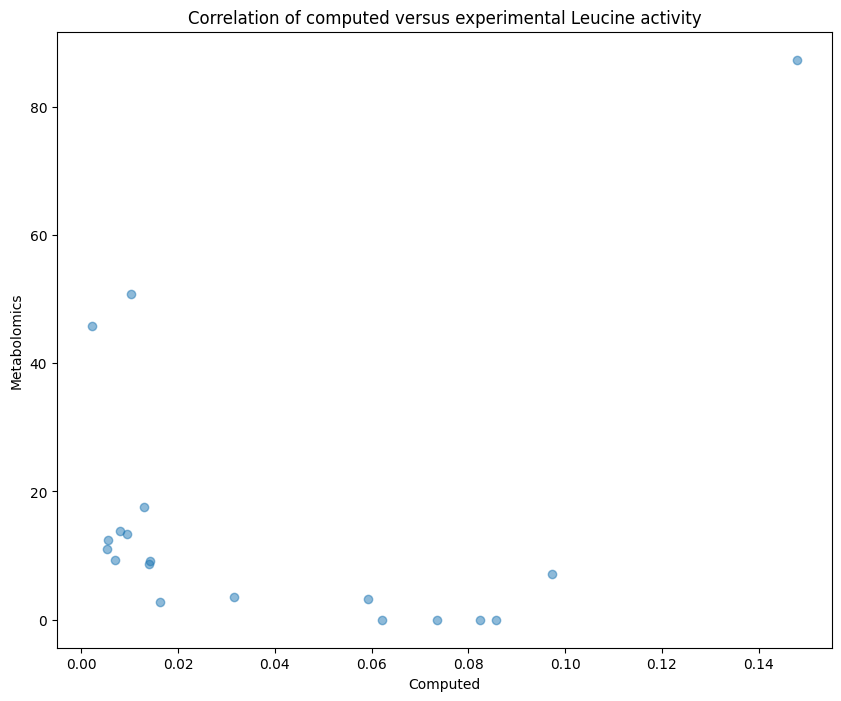

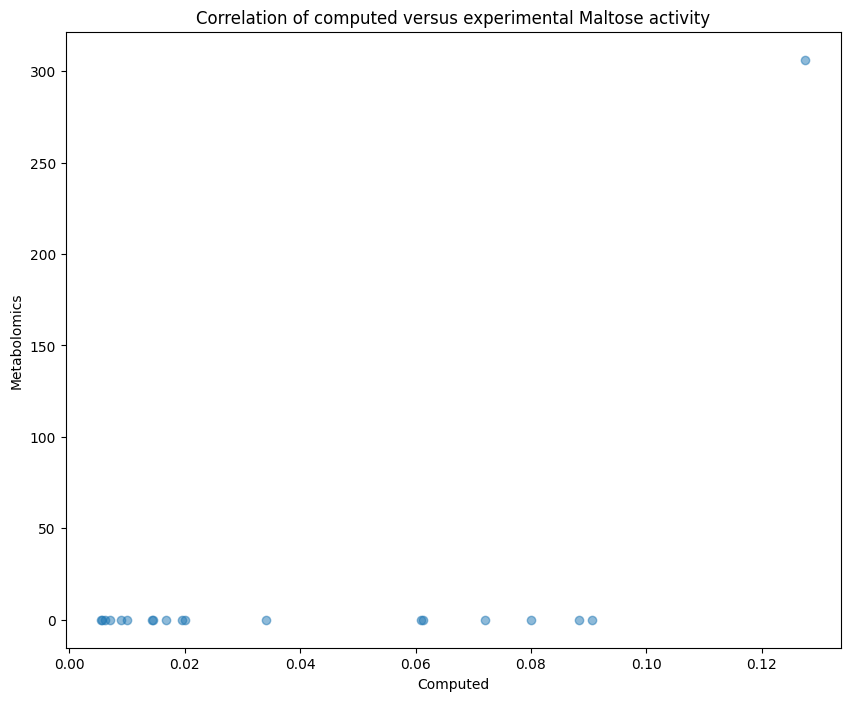

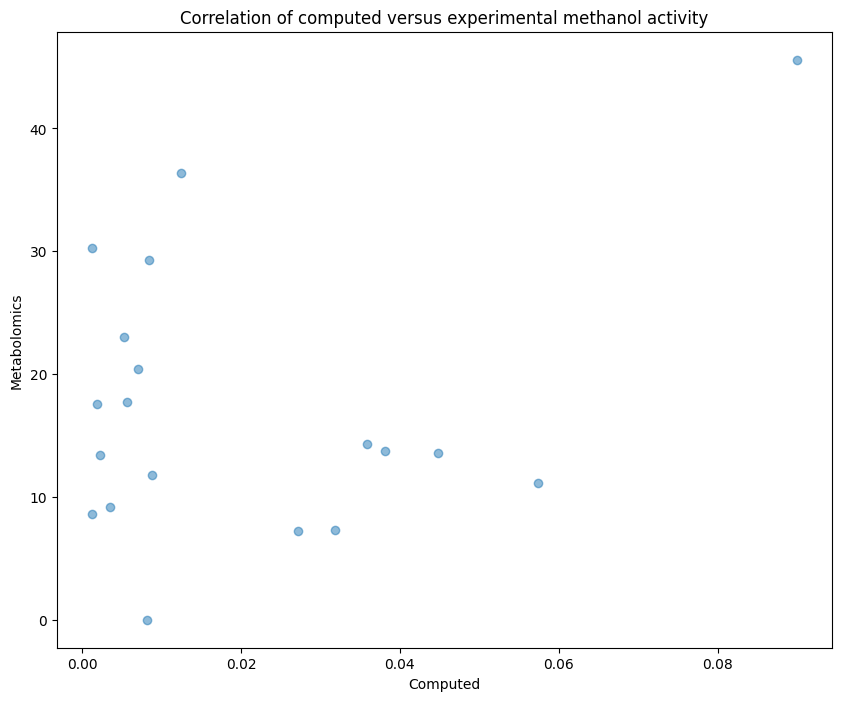

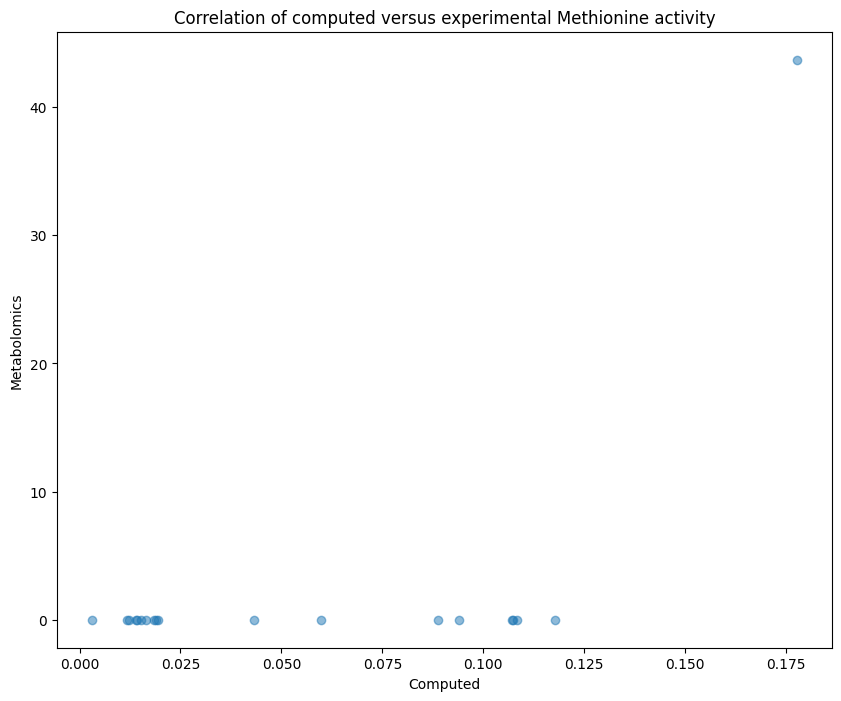

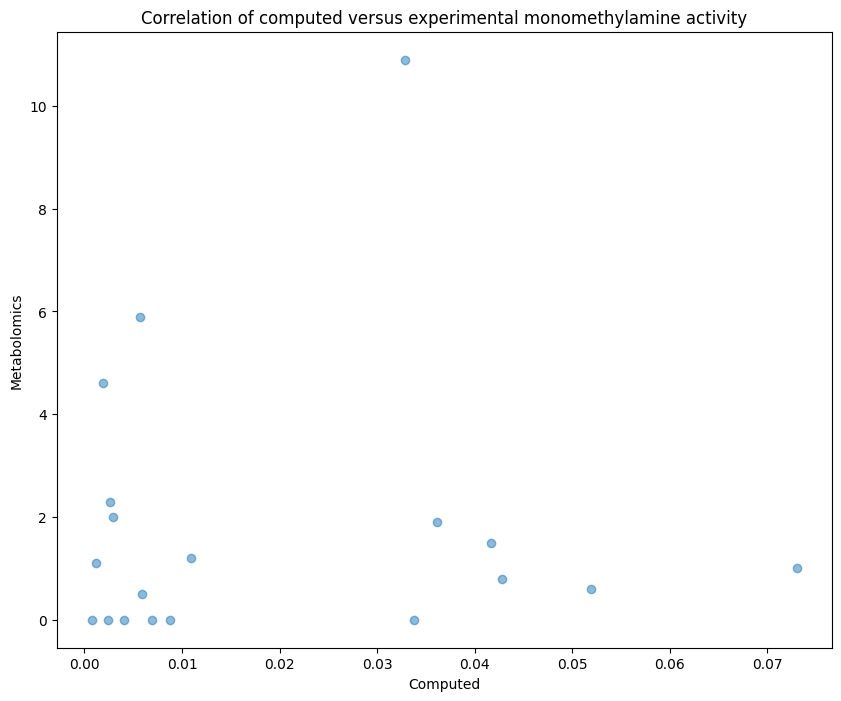

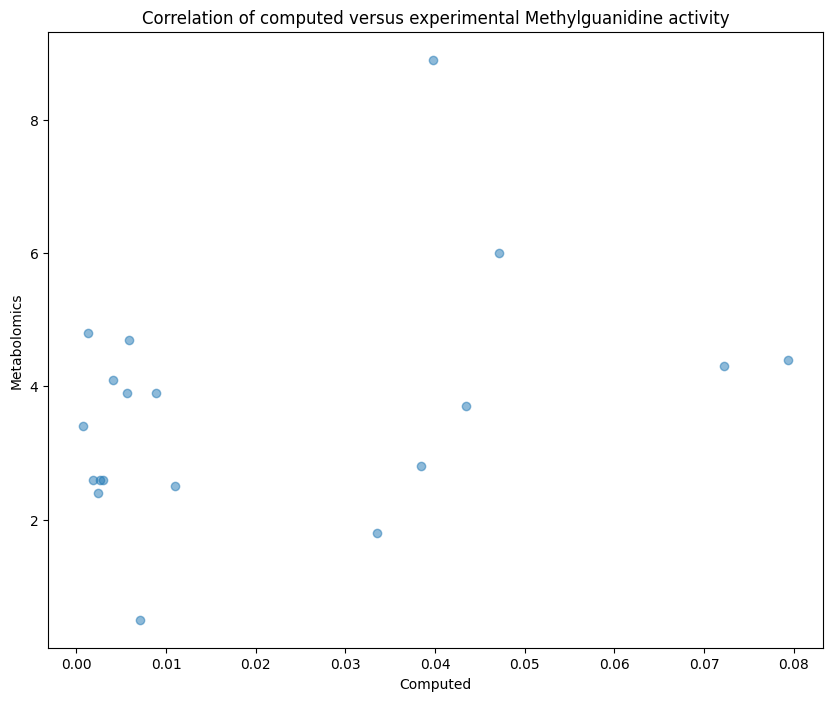

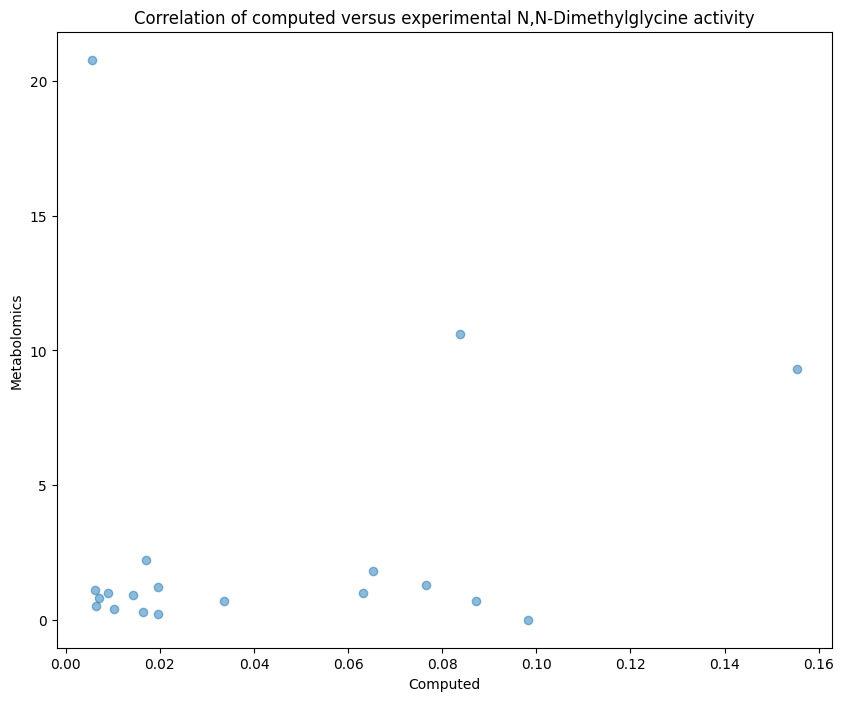

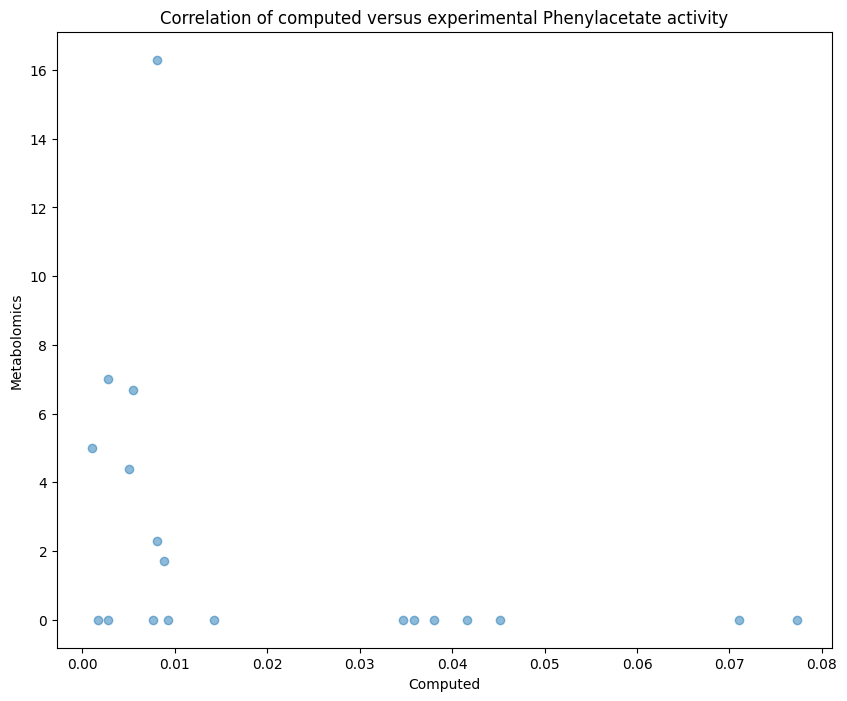

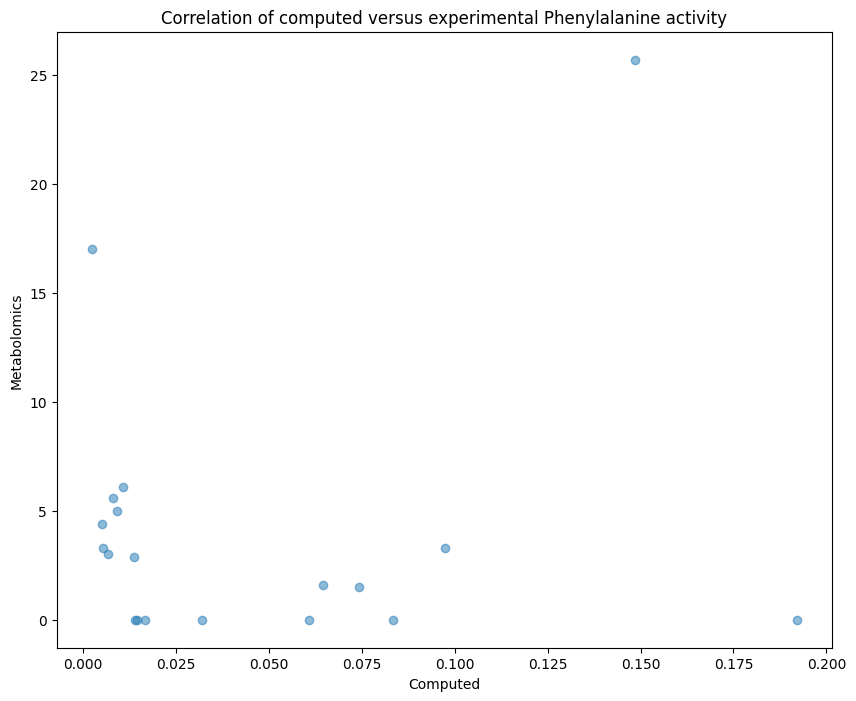

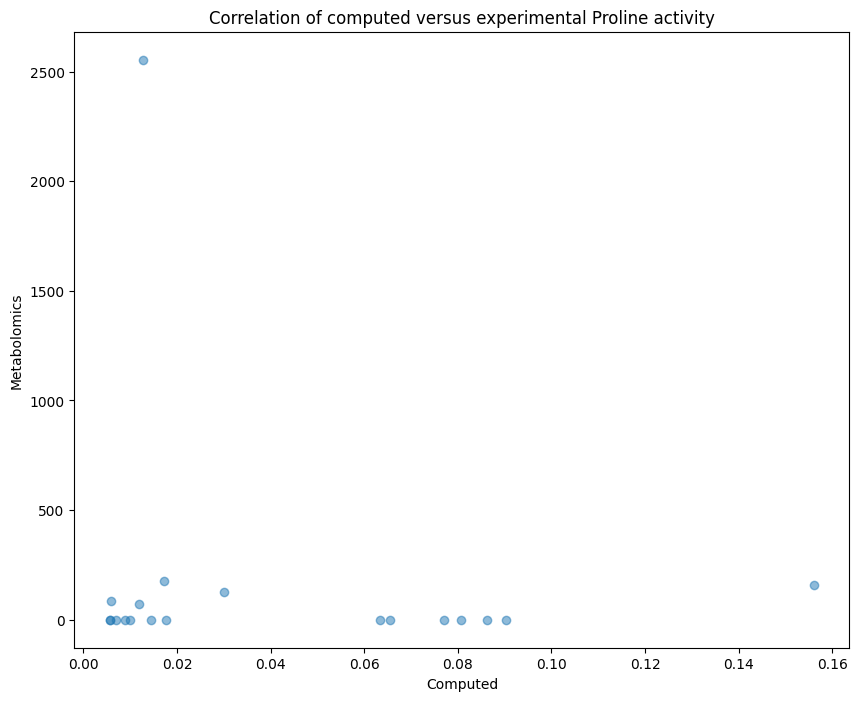

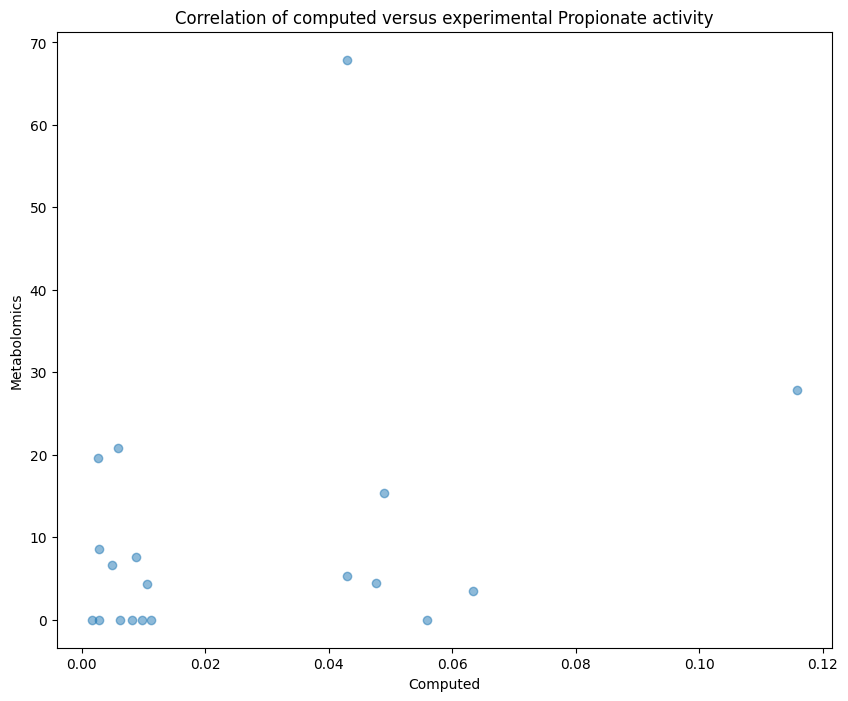

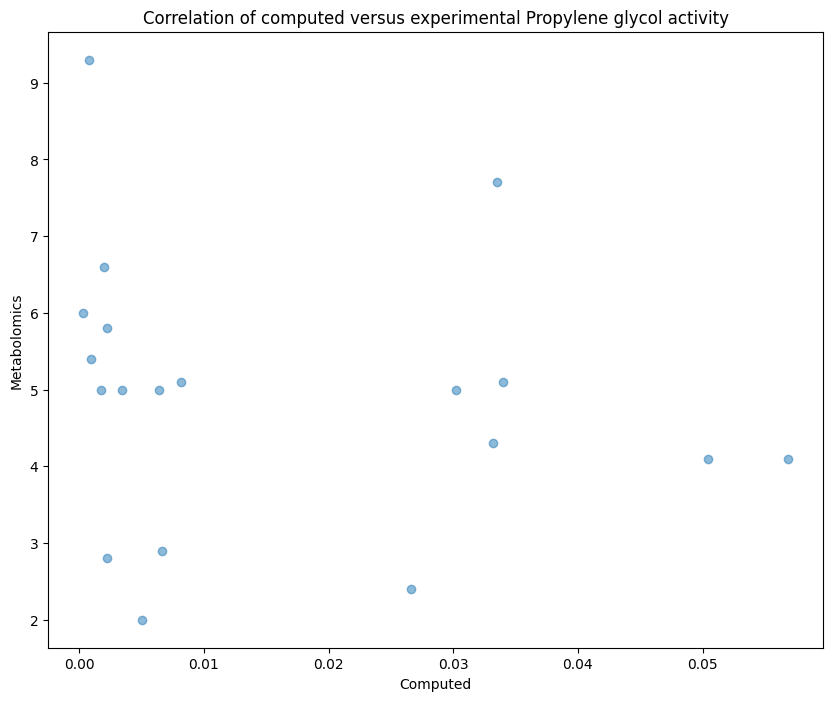

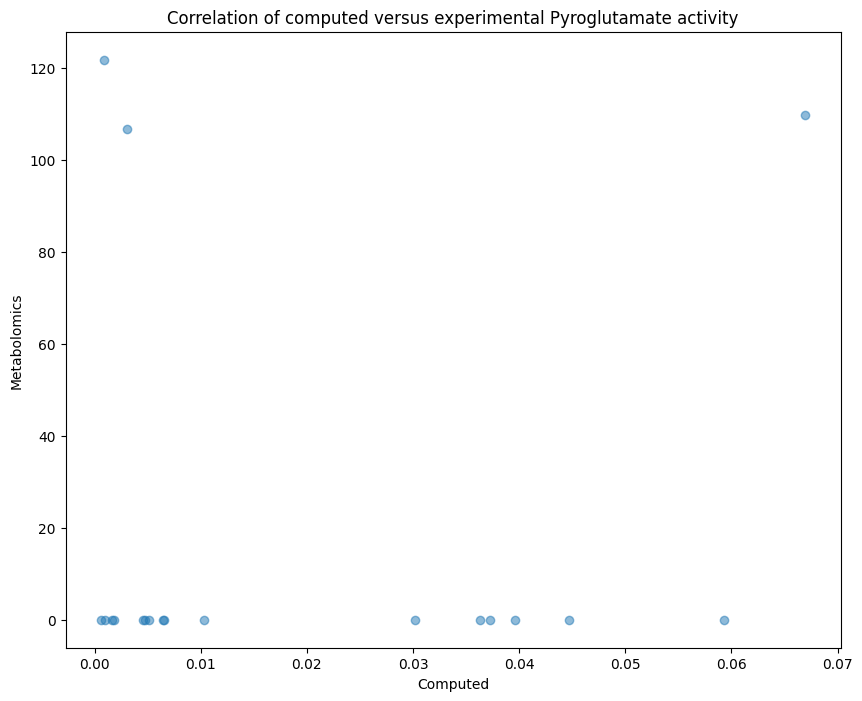

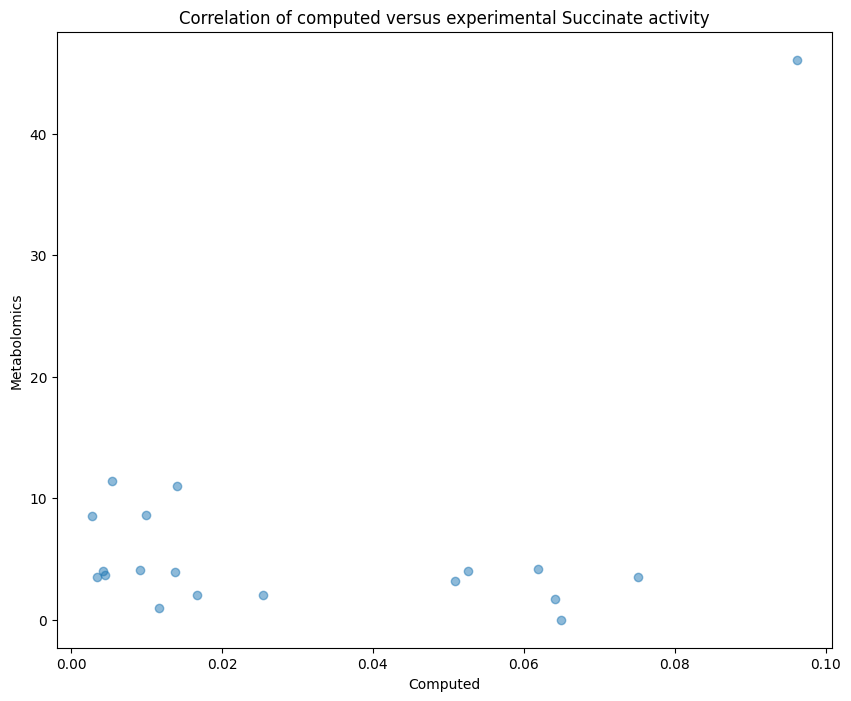

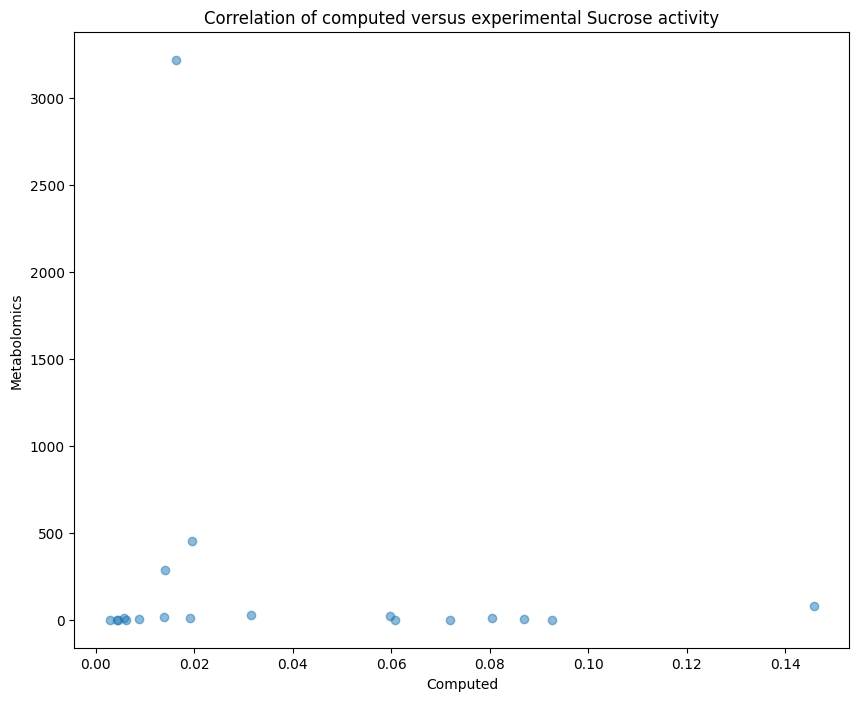

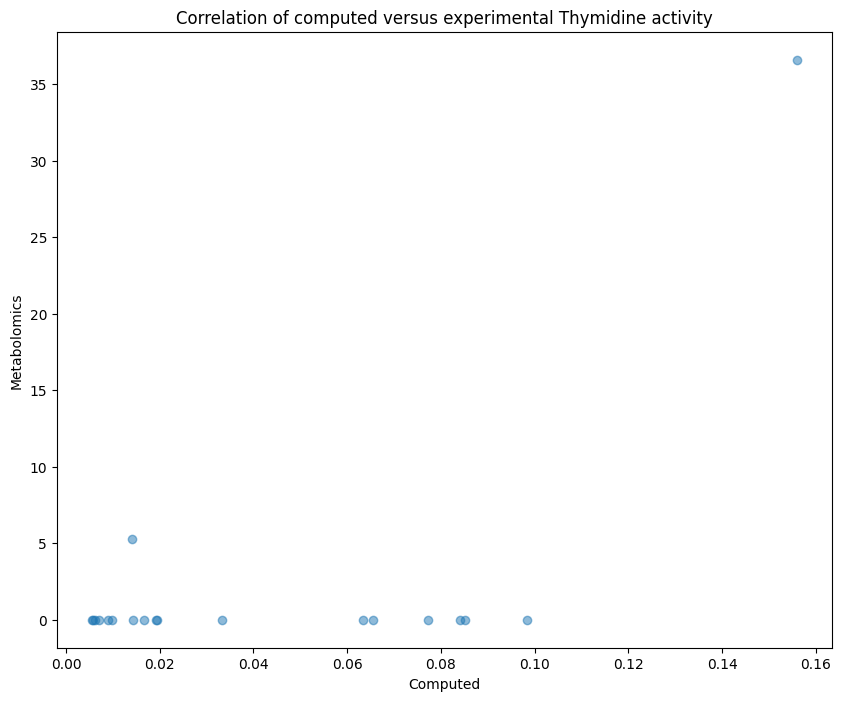

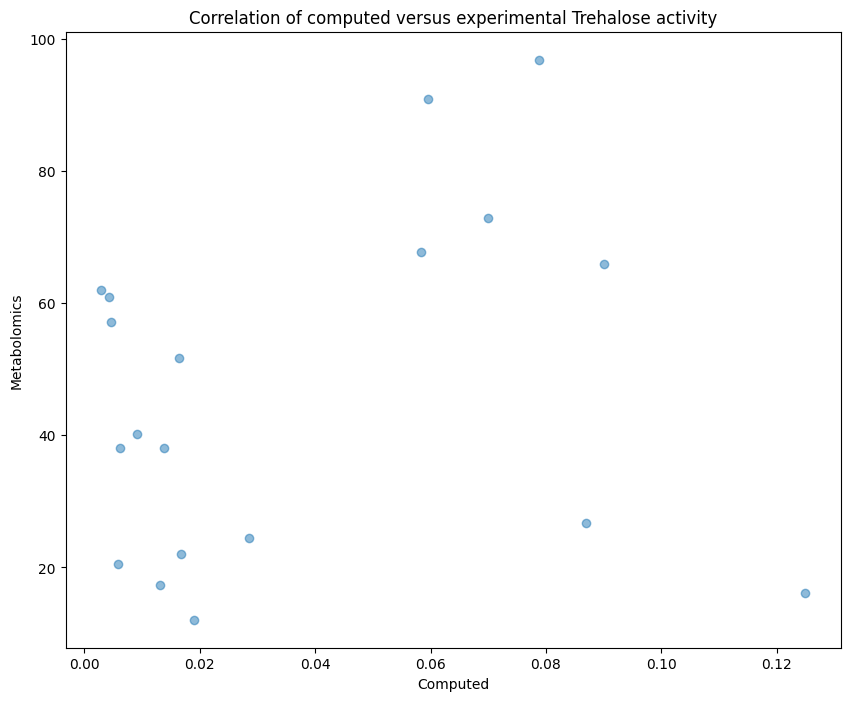

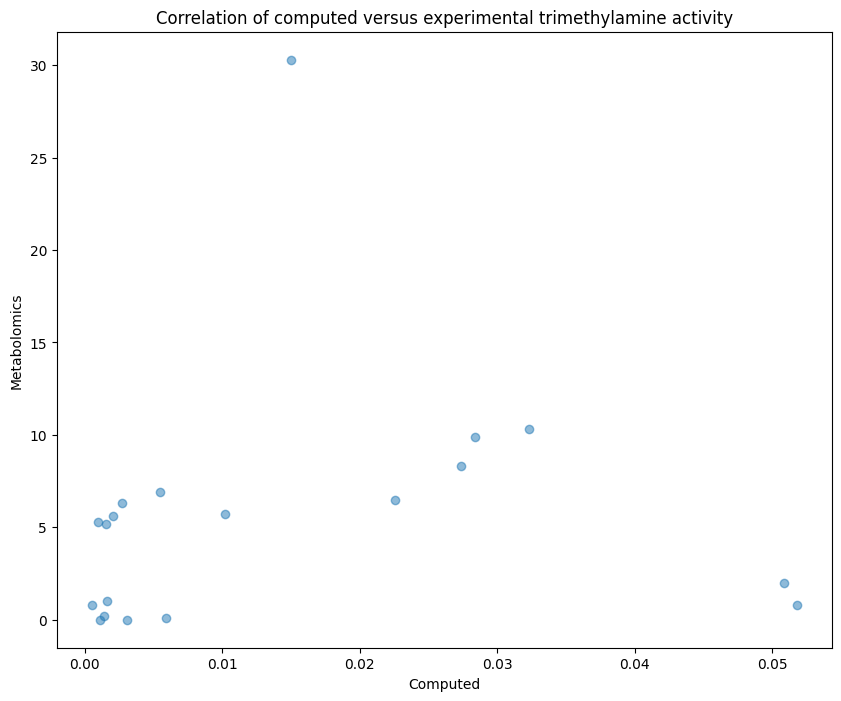

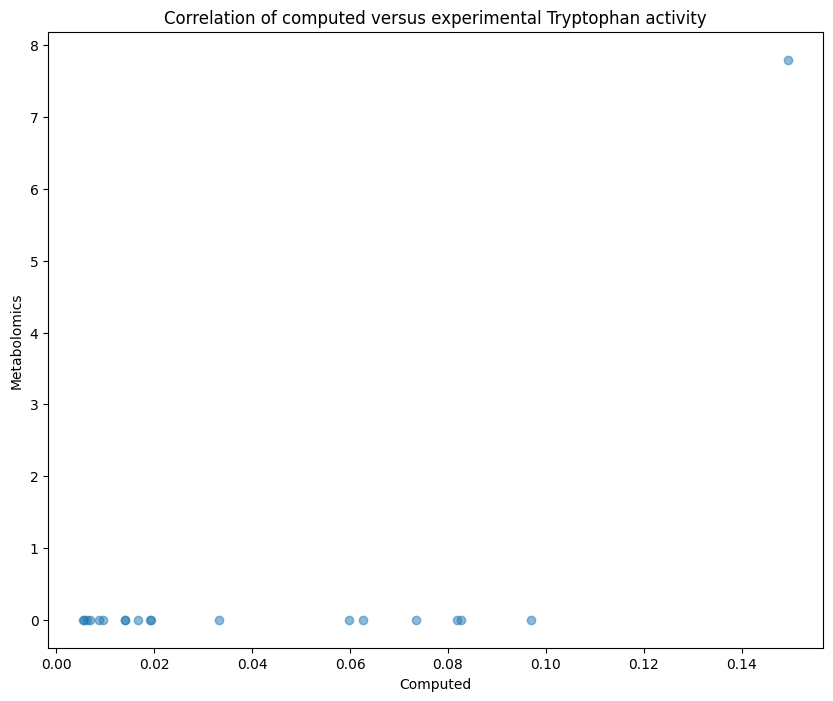

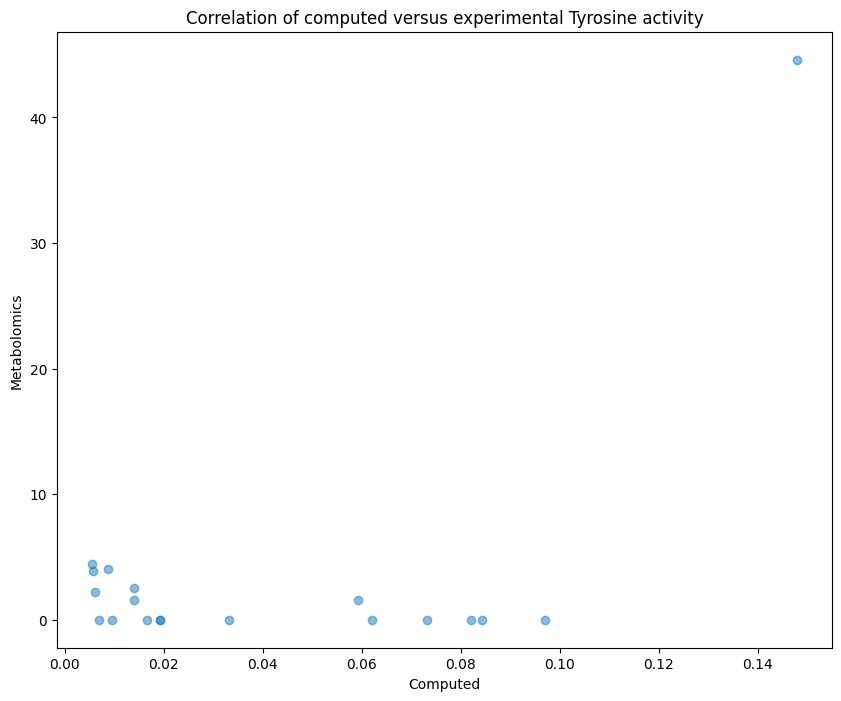

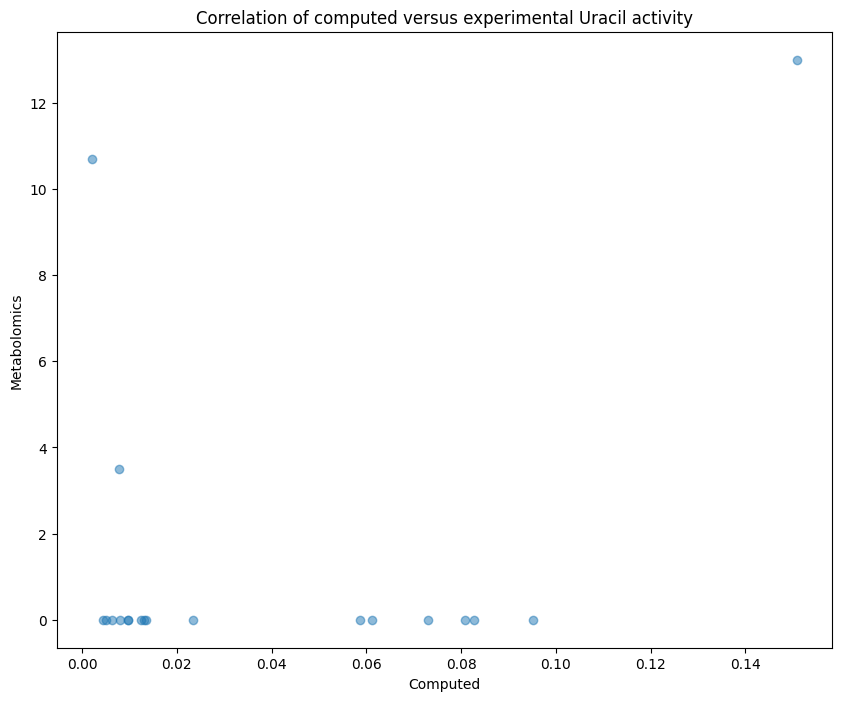

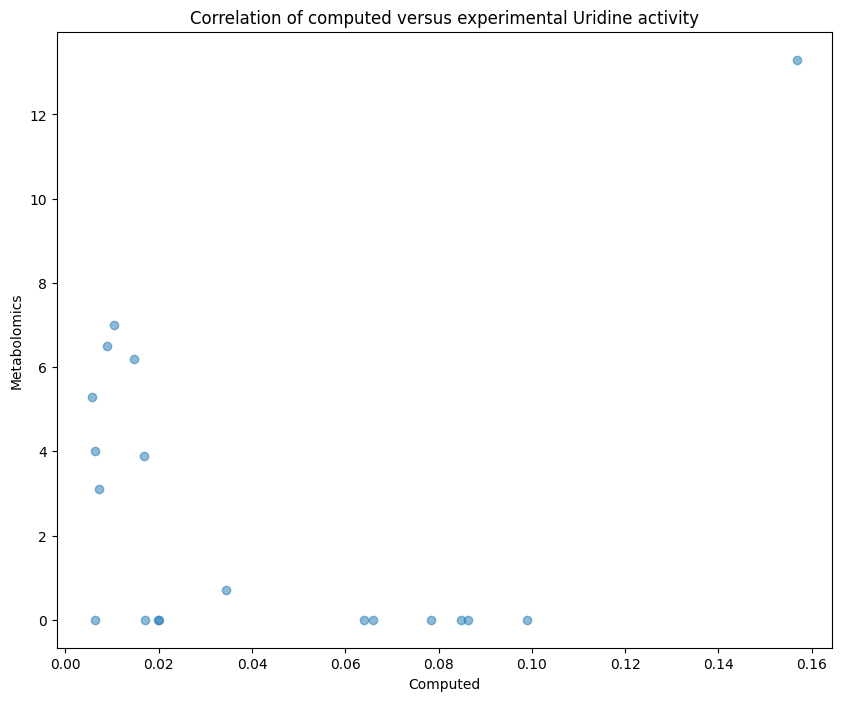

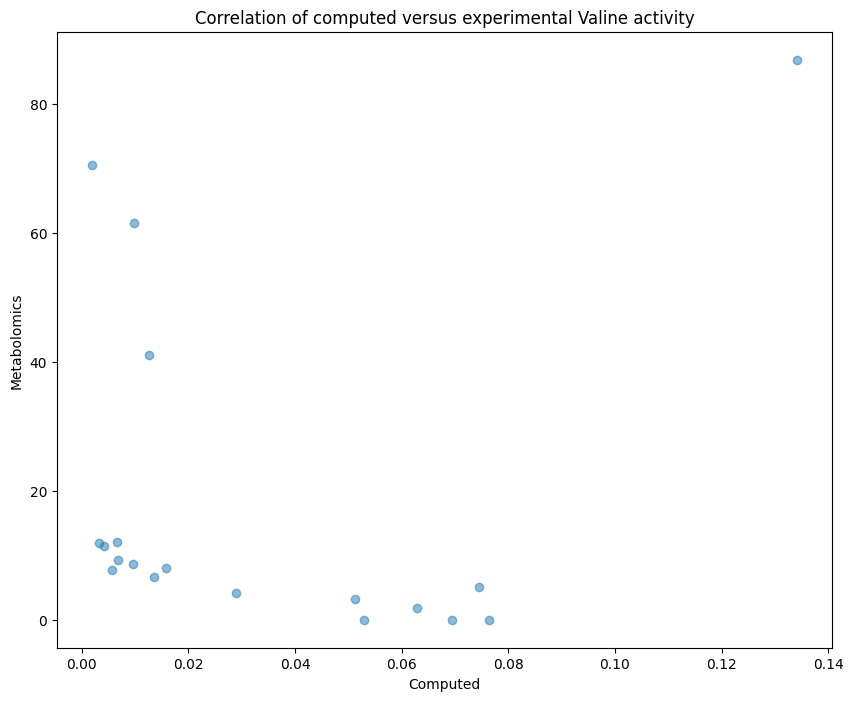

In [13]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import array, delete
from sklearn.linear_model import LinearRegression


def isNumber(val):
    import re
    remainder = re.sub("[0-9.-]+", "", str(val))
    if remainder != "": 
        # print(remainder)
        return False
    return True


def compute_correlations(sample_CSV_path, metabolomics_path):
    # remove sample rows that are not represented in the metabolomics data
    print("\n\n", sample_CSV_path)
    sample = read_csv(sample_CSV_path).set_index("Sample")
    sample.columns = sample.loc["Name"]
    sample = sample.drop("Name", axis=0).astype(float)
    # display(sample)
    simple_path = sample_CSV_path.replace(".csv", "")
    directory, base = simple_path.split("/")[0], simple_path.split("/")[-1]
    # print(list(sample.index))
    metabolomics_df = read_csv("data/Cliff_Sample_Metadata_BGC_NMR.csv").set_index("Sample")
    metabolomics_df.drop(columns=metabolomics_df.columns[list(range(0,42))], inplace=True)
    # display(list(enumerate(metabolomics_df.columns)))
    # display(metabolomics_df)
    # sample_slimmed = sample.drop([index for index in sample.index if index not in metabolomics_df.index], axis=0)
    # metabolomics_df_slimmed = metabolomics_df.drop([index for index in metabolomics_df.index if index not in sample_slimmed.index], axis=0)
    # display(sample_slimmed.head())

    all_xs, all_ys = [], []
    loop_correlations = {}
    for col_x, col_y in zip(sample.columns, metabolomics_df.columns[:len(sample.columns)]):
        print(col_x, col_y)
        xs = sample[col_x]
        ys = metabolomics_df[col_y]
        all_xs.extend(xs) ; all_ys.extend(ys)
        pyplot.figure(figsize=(10, 8))  # Set the size of the figure
        pyplot.scatter(xs, ys, alpha=0.5 #, label=label,
                    # color=colors[i], 
                    # marker=markers[i]
                    )
        # Adding labels and title
        pyplot.xlabel('Computed')
        pyplot.ylabel('Metabolomics')
        pyplot.title(f'Correlation of computed versus experimental {col_x} activity')

        # Show plot
        pyplot.savefig(f"{directory}/correlationFigs/{col_x}_prob_{base}")

        # Create a linear regression model
        model = LinearRegression()
        fitting_xs = array(xs).reshape(-1, 1)
        fitting_ys = array(ys)
        deleteCount = 0
        for index, val in enumerate(fitting_ys):
            if not isNumber(val):
                fitting_xs = delete(fitting_xs, index-deleteCount)
                fitting_ys = delete(fitting_ys, index-deleteCount)
                deleteCount += 1
        for index, val in enumerate(fitting_xs):
            if not isNumber(val):
                fitting_xs = delete(fitting_xs, index-deleteCount)
                fitting_ys = delete(fitting_ys, index-deleteCount)
                deleteCount += 1
                
        if len(fitting_xs) == 0:
            print(f"The {col_x} metabolite has no computed flux")
            continue
        elif len(fitting_ys) == 0:
            print(f"The {col_x} metabolite has no metabolomics data")
            continue
        elif all(fitting_xs == 0):
            print(f"The {col_x} computed fluxes are all 0")
            continue
        elif len(fitting_xs) == 2:
            print(f"The {col_x} computed fluxes are only 2, which is too few to yield reliable linear fitting")
            continue
        fitting_xs = fitting_xs.reshape(-1, 1)
        model.fit(fitting_xs, fitting_ys)

        # Calculate R^2
        r_squared = model.score(fitting_xs, fitting_ys)
        loop_correlations[col_x] = r_squared if model.coef_[0] >= 0 else -r_squared
    return dict(sorted(loop_correlations.items(), key=lambda item: item[1], reverse=True))


from glob import glob
prob_correlations = {}
for csv_path in glob("nboutput/Sample*probInteractions.csv"):
    prob_correlations[csv_path.replace(".csv", "").split("/")[-1]] = compute_correlations(csv_path, "data/Cliff_Sample_Metadata_BGC_NMR.csv")


In [18]:
from pandas import DataFrame

df = DataFrame(prob_correlations)
df.columns = [col.replace("sample", "").replace("_probInteractions", "") for col in df.columns]
df.drop("Isopropanol", axis=0, inplace=True)
for index, row in df.iterrows():
    if all([abs(row[col])<0.2 for col in df.columns]):
        df.drop(index, axis=0, inplace=True)
display(df)
df.to_csv("nboutput/sample_correlations.csv")

Sampleuptake  Sampleexcretion  Samplegrowth
glycine betaine      0.248072         0.265479      0.473332
Maltose              0.217856         0.195827      0.326864
Methionine           0.210188         0.185251      0.338249
Tryptophan           0.203076         0.295046      0.417517
Thymidine            0.183362         0.203427      0.392446
Tyrosine             0.178470         0.208518      0.327124
2'-Deoxyuridine      0.127761         0.142569      0.363336
Phenylacetate       -0.246227        -0.276063     -0.157899